In [62]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Load the data
data = pd.read_csv('BostonHousing.csv')
data = data.rename(columns=lambda x: x.upper())

#### Data Structure and Statistics

In [63]:
# print head of data
print(data.head(), '\n')
# print shape of data
print("Shape of data:", data.shape, '\n')

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2   

Shape of data: (506, 14) 



In [64]:
# print data types
print("Data types:")
print(data.dtypes)

Data types:
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [65]:
# print summary statistics
print("Summary statistics:")
print(data.describe(), '\n')

Summary statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std    

In [66]:
# check for missing values
print("Missing values:")
print(data.isnull().sum(), '\n')

# check for duplicates
print("Duplicated entries: ", data.duplicated().sum(),)

Missing values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64 

Duplicated entries:  0


<Axes: >

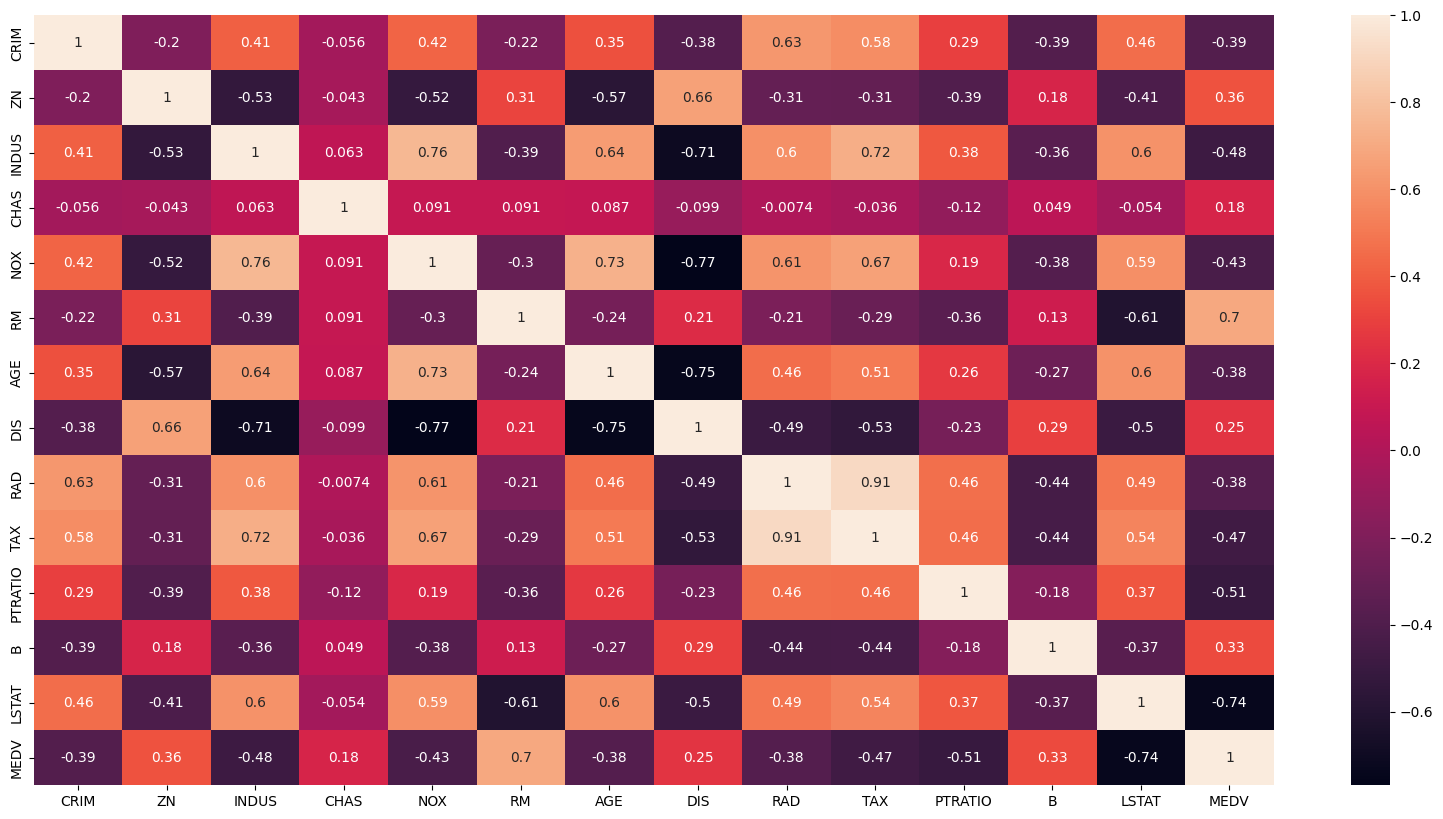

In [67]:
# initial correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)

#### Draw a regression plot for each feature in the dataset against the target variable.
It will help us to understand the dispersion of the data and the relationship between the features and the target variable. 

In other words,
- Is the feature helpful in predicting the target variable?
- Or what kind of precautions should be taken while using the feature in the model? (is the data useful or not?)
- And, is there any specific information that can be gained from the distribution of the data?

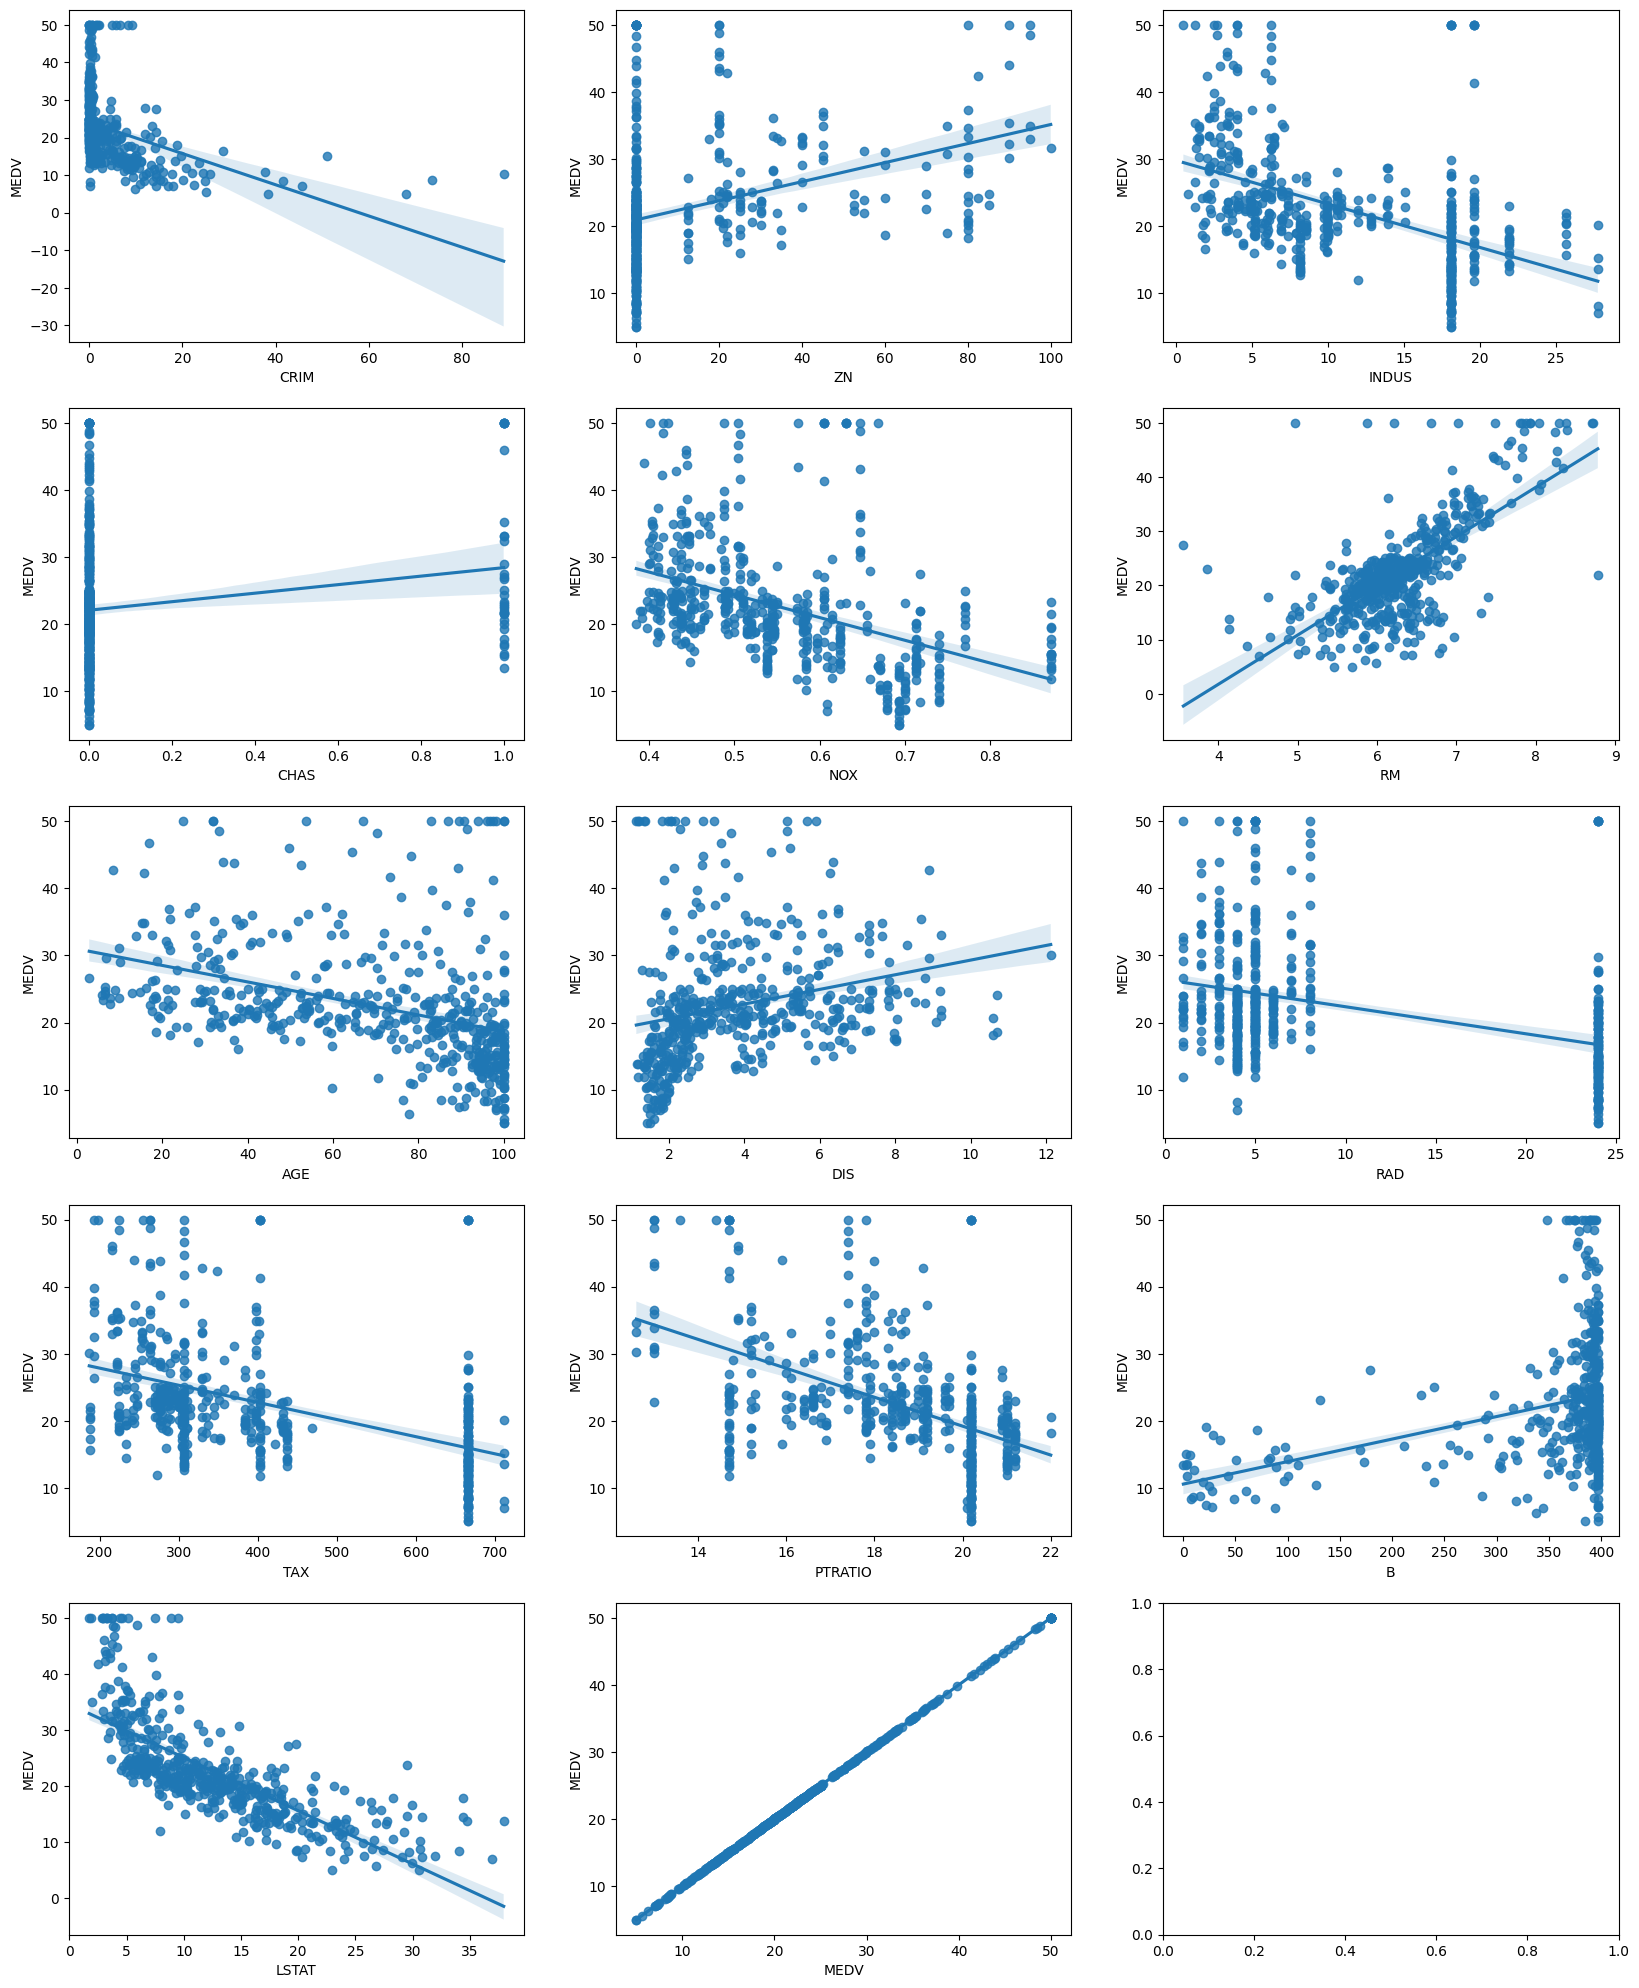

In [68]:
# draw a regression plot for each feature against the target
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(20, 25))
axs = axs.flatten()

for i, col in enumerate(data.columns):
    sns.regplot(x=col, y='MEDV', data=data, ax=axs[i])

#### Check to see if the non-zero values of ZN can be used to gain any insight into the target variable

In [69]:
# Check for the records that do not have the value 0 for ZN feature
print("land zones below 25000 sq.ft.: ", data[data['ZN'] == 0].shape[0])
# non-zero values for ZN
print("land zones above 25000 sq.ft.: ", data[data['ZN'] != 0].shape[0])

land zones below 25000 sq.ft.:  372
land zones above 25000 sq.ft.:  134


Correlation between ZN and MEDV for non-zero values of ZN:
            ZN      MEDV
ZN    1.000000  0.208413
MEDV  0.208413  1.000000


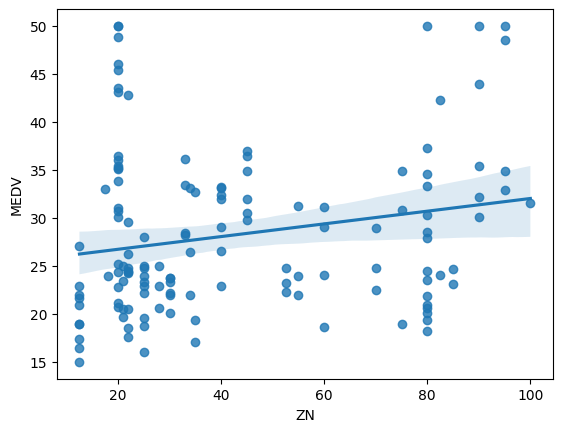

In [70]:
# plot a regression plot for the ZN feature with more than zero for values
sns.regplot(x='ZN', y='MEDV', data=data[data['ZN'] != 0])
# check the correlation between ZN and MEDV for nonzero values of ZN
print("Correlation between ZN and MEDV for non-zero values of ZN:")
print(data[data['ZN'] != 0][['ZN', 'MEDV']].corr())

### Result:
 Zones over 25000 sq ft do not show any clear trend with the target variable.
___

#### Check to see if the Crime Rate below 5 or below 10 can be used to gain any insight into the target variable

CRIM values below 5:  400
Correlation between CRIM and MEDV for values below 5:
          CRIM      MEDV
CRIM  1.000000 -0.163493
MEDV -0.163493  1.000000
Percentage of values below 5:  0.7905138339920948


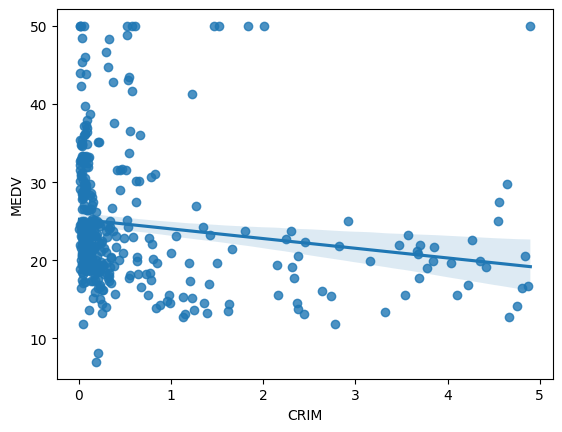

In [71]:
# correlation between CRIM and MEDV for values below 5
print("CRIM values below 5: ", data[data['CRIM'] < 5].shape[0])

# check the correlation between CRIM and MEDV for values below 5
print("Correlation between CRIM and MEDV for values below 5:")
print(data[data['CRIM'] < 5][['CRIM', 'MEDV']].corr())

# percentage of values below 5
print("Percentage of values below 5: ", data[data['CRIM'] < 5].shape[0] / data.shape[0])

# plot a regression plot for the CRIM feature with values below 5
sns.regplot(x='CRIM', y='MEDV', data=data[data['CRIM'] < 5])
# check the correlation between CRIM and MEDV for values below 5
plt.show()



CRIM values below 10:  452
Correlation between CRIM and MEDV for values below 10:
          CRIM      MEDV
CRIM  1.000000 -0.286245
MEDV -0.286245  1.000000
Percentage of values below 10:  0.8932806324110671


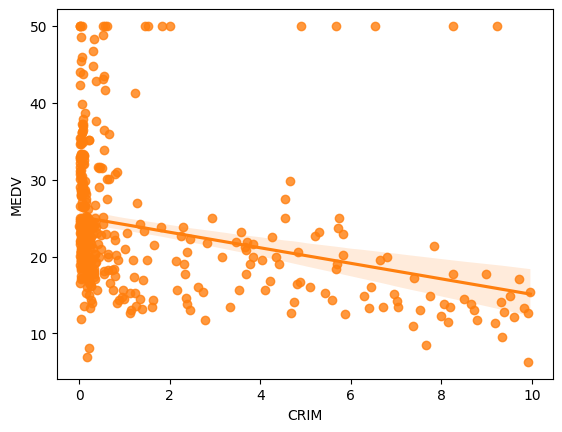

In [72]:
# correlation between CRIM and MEDV for values below 10
print("CRIM values below 10: ", data[data['CRIM'] < 10].shape[0])

# check the correlation between CRIM and MEDV for values below 10
print("Correlation between CRIM and MEDV for values below 10:")
print(data[data['CRIM'] < 10][['CRIM', 'MEDV']].corr())

#percentage of values below 10
print("Percentage of values below 10: ", data[data['CRIM'] < 10].shape[0] / data.shape[0])

# plot a regression plot for the CRIM feature with values below 10
plt.figure()
sns.regplot(x='CRIM', y='MEDV', data=data[data['CRIM'] < 10], color='tab:orange')
plt.show()

### Result for CRIM effectiveness analysis:
Crime Rate below 10, includes 89% of the data. The correlation of the CRIM feature and the target is '**-0.29**' which is not very strong. It does not show a significant trend with the target variable.
___

#### Censored Data
There seems to be a ceiling effect for the housing prices at 50.0 which means that all data above
that point have been accumulated within the 50 threshold.

We can remove these data points from the dataset to avoid bias in our analysis.

<Axes: xlabel='MEDV', ylabel='Count'>

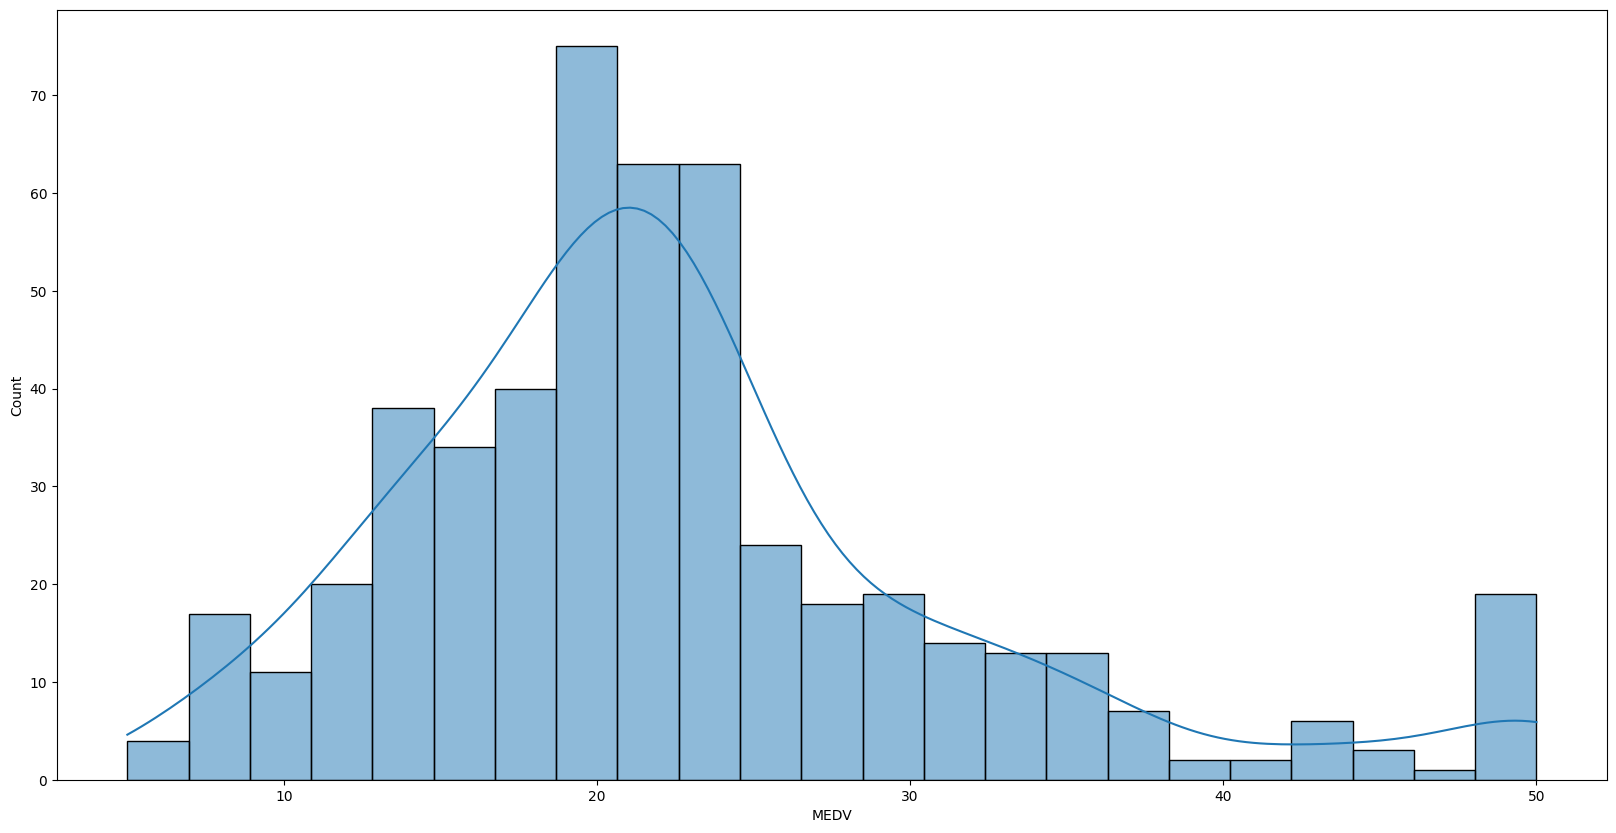

In [73]:
# draw a distribution plot for MEDV
plt.figure(figsize=(20, 10))
sns.histplot(data['MEDV'], kde=True)

(490, 14)


<Axes: xlabel='MEDV', ylabel='Count'>

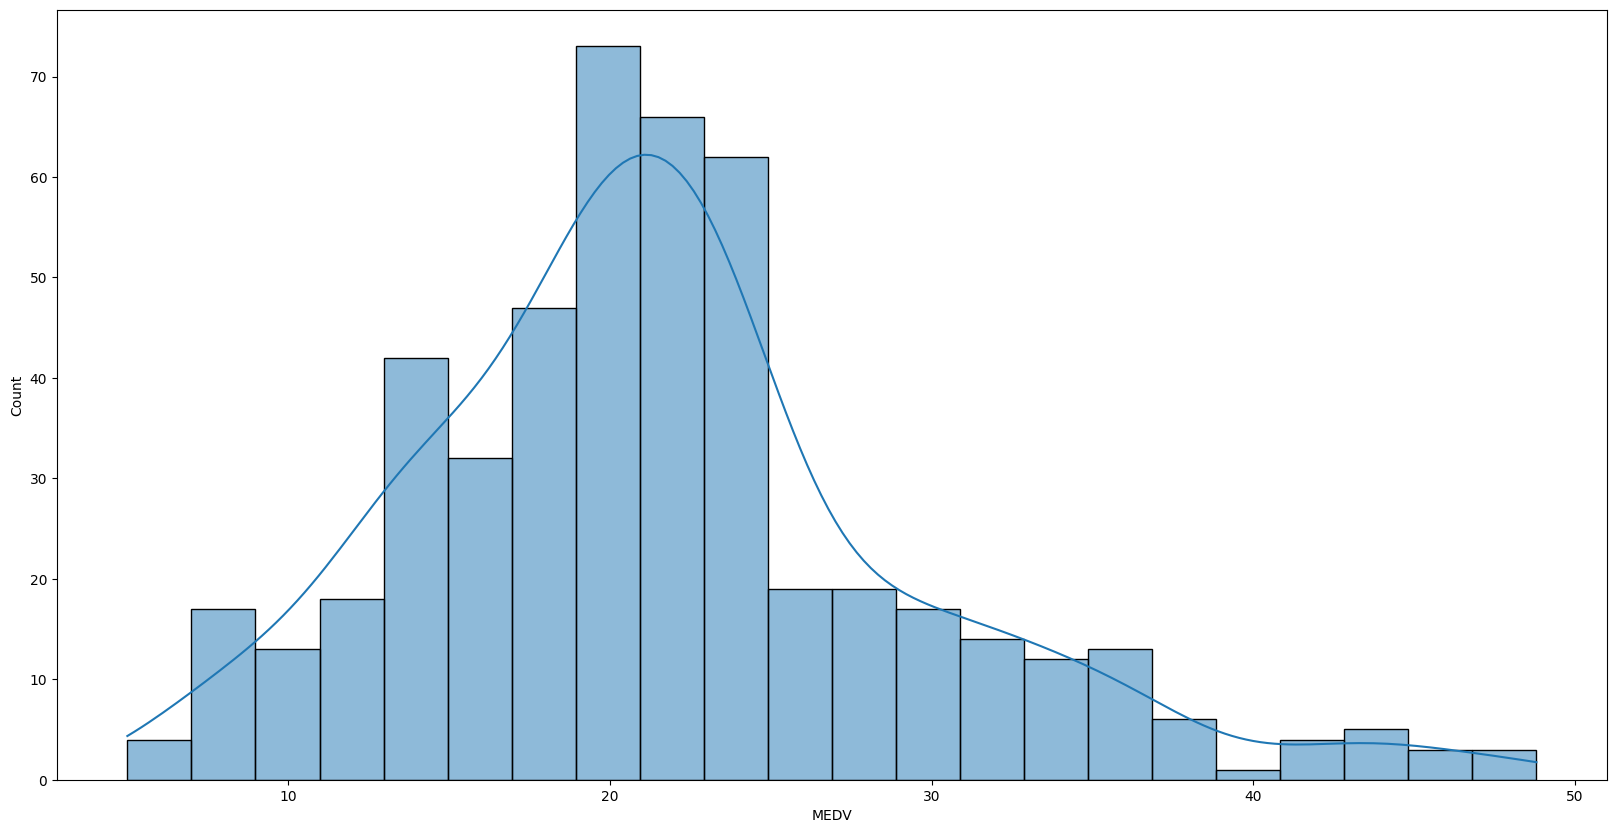

In [74]:
# There seems to be a ceiling effect for the housing prices at 50.0 which means that all data above
# that point have been censored. We can remove these data points from the dataset.

# remove the cesored data from the dataset for MEDV
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))
plt.figure(figsize=(20, 10))
sns.histplot(data['MEDV'], kde=True)

### Check for outliers in the data

In [75]:
# check for outlier percentage in each feature
for col in data.columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier_percentage = len(data[(data[col] < lower_bound) | (data[col] > upper_bound)]) / len(data) * 100
    print('Outlier percentage in %s is %.2f%%' % (col, outlier_percentage))

Outlier percentage in CRIM is 13.27%
Outlier percentage in ZN is 13.27%
Outlier percentage in INDUS is 0.00%
Outlier percentage in CHAS is 5.92%
Outlier percentage in NOX is 0.00%
Outlier percentage in RM is 4.69%
Outlier percentage in AGE is 0.00%
Outlier percentage in DIS is 1.02%
Outlier percentage in RAD is 0.00%
Outlier percentage in TAX is 0.00%
Outlier percentage in PTRATIO is 2.65%
Outlier percentage in B is 15.92%
Outlier percentage in LSTAT is 1.43%
Outlier percentage in MEDV is 4.49%


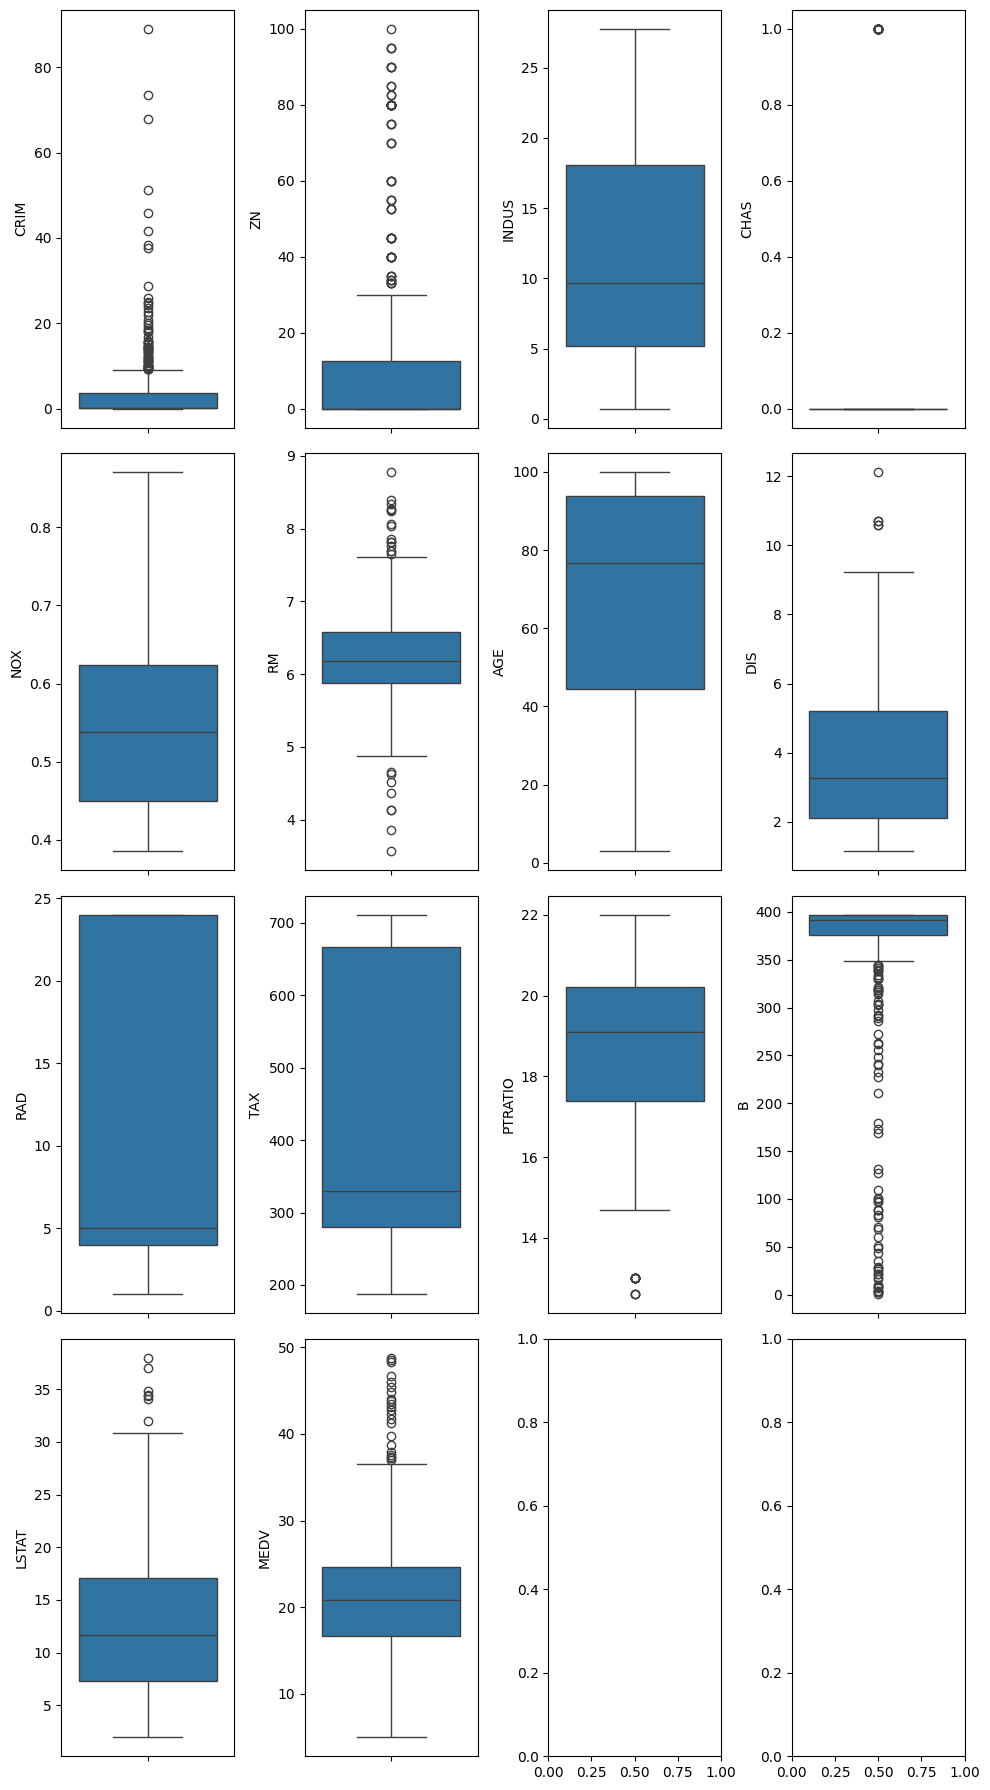

In [76]:
# draw the boxplot for each feature to recognize outliers and check for exponential distributions
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(10, 18))

axs = axs.flatten()
for i, col in enumerate(data.columns):
    sns.boxplot(y=col, data=data, ax=axs[i])

plt.tight_layout()
plt.show()

In [77]:
# find how many data points have a value of 0 for CHAS feature
print("Number of entries with 0 value for CHAS: ", len(data[data['CHAS'] == 0]))
# and one
print("Number of entries with 1 value for CHAS: ", len(data[data['CHAS'] == 1]))

Number of entries with 0 value for CHAS:  461
Number of entries with 1 value for CHAS:  29


In [78]:
# check for outlier percentages in each feature
for col in ['LSTAT', 'RM', 'INDUS', 'TAX', 'PTRATIO', 'NOX', 'AGE', 'DIS', 'MEDV']:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier_percentage = len(data[(data[col] < lower_bound) | (
        data[col] > upper_bound)]) / len(data) * 100
    print('Outlier percentage in %s is %.2f%%' % (col, outlier_percentage))

Outlier percentage in LSTAT is 1.43%
Outlier percentage in RM is 4.69%
Outlier percentage in INDUS is 0.00%
Outlier percentage in TAX is 0.00%
Outlier percentage in PTRATIO is 2.65%
Outlier percentage in NOX is 0.00%
Outlier percentage in AGE is 0.00%
Outlier percentage in DIS is 1.02%
Outlier percentage in MEDV is 4.49%


In [79]:
# removing outliers for the 8 features with the highest correlation with MEDV
data_clean = data
print(f"Original data shape {'':<14}", data_clean.shape[0])
for column in ['LSTAT', 'RM', 'PTRATIO', 'DIS', 'MEDV']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_clean = data_clean[~((data_clean[column] > upper_bound) |
                              (data_clean[column] < lower_bound))]

    print(f"after outlier removal for {column:<8}", data_clean.shape[0])

print(f"{'':<15}{'—' * 5}")
print(f"Final data shape after cleaning{'':<3}", data_clean.shape[0])


Original data shape                490
after outlier removal for LSTAT    483
after outlier removal for RM       463
after outlier removal for PTRATIO  451
after outlier removal for DIS      446
after outlier removal for MEDV     439
               —————
Final data shape after cleaning    439


In [80]:
# check for outlier percentage in each feature after removing the outliers
for col in ['LSTAT', 'RM', 'INDUS', 'TAX', 'PTRATIO', 'NOX', 'AGE', 'DIS', 'MEDV']:
    q1 = data_clean[col].quantile(0.25)
    q3 = data_clean[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier_percentage = len(data_clean[(data_clean[col] < lower_bound) |
                                        (data_clean[col] > upper_bound)]) / len(data_clean) * 100

    print(f"Outlier percentage in {col + ' is':<11} {outlier_percentage:.2f}%")

Outlier percentage in LSTAT is    0.00%
Outlier percentage in RM is       2.05%
Outlier percentage in INDUS is    0.00%
Outlier percentage in TAX is      0.00%
Outlier percentage in PTRATIO is  0.00%
Outlier percentage in NOX is      0.00%
Outlier percentage in AGE is      0.00%
Outlier percentage in DIS is      0.00%
Outlier percentage in MEDV is     2.05%


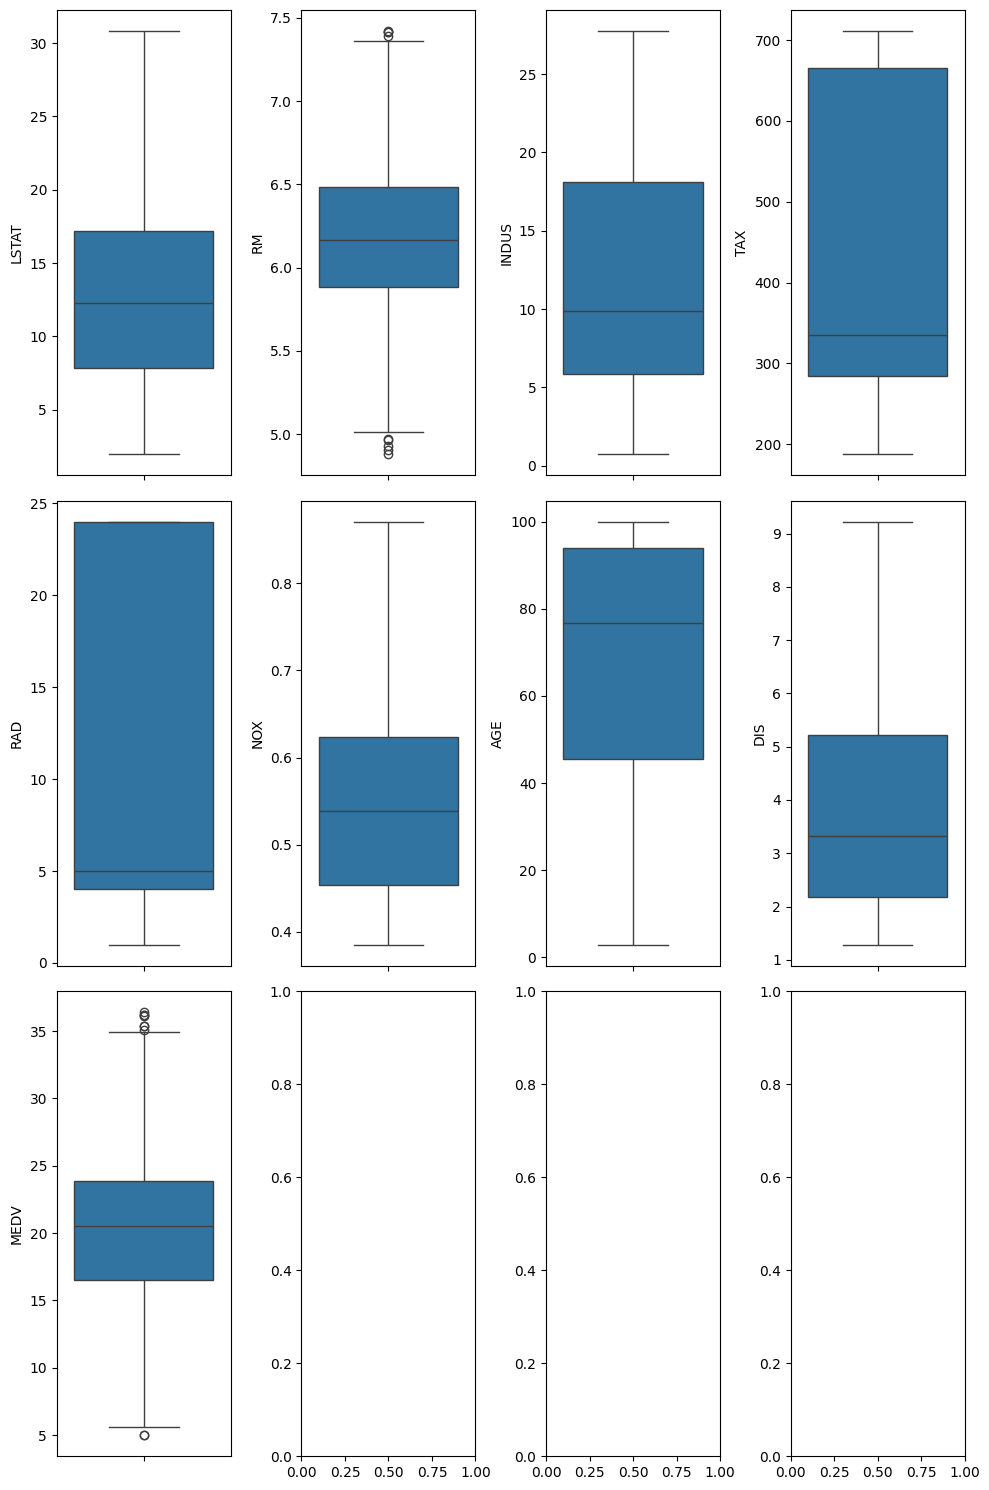

In [81]:
# draw the boxplot for 6 after removing outliers
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(10, 15))

axs = axs.flatten()
for i, col in enumerate(data_clean[['LSTAT', 'RM', 'INDUS', 'TAX', 'RAD', 'NOX', 'AGE', 'DIS', 'MEDV']]):
    sns.boxplot(y=col, data=data_clean, ax=axs[i])

plt.tight_layout()
plt.show()

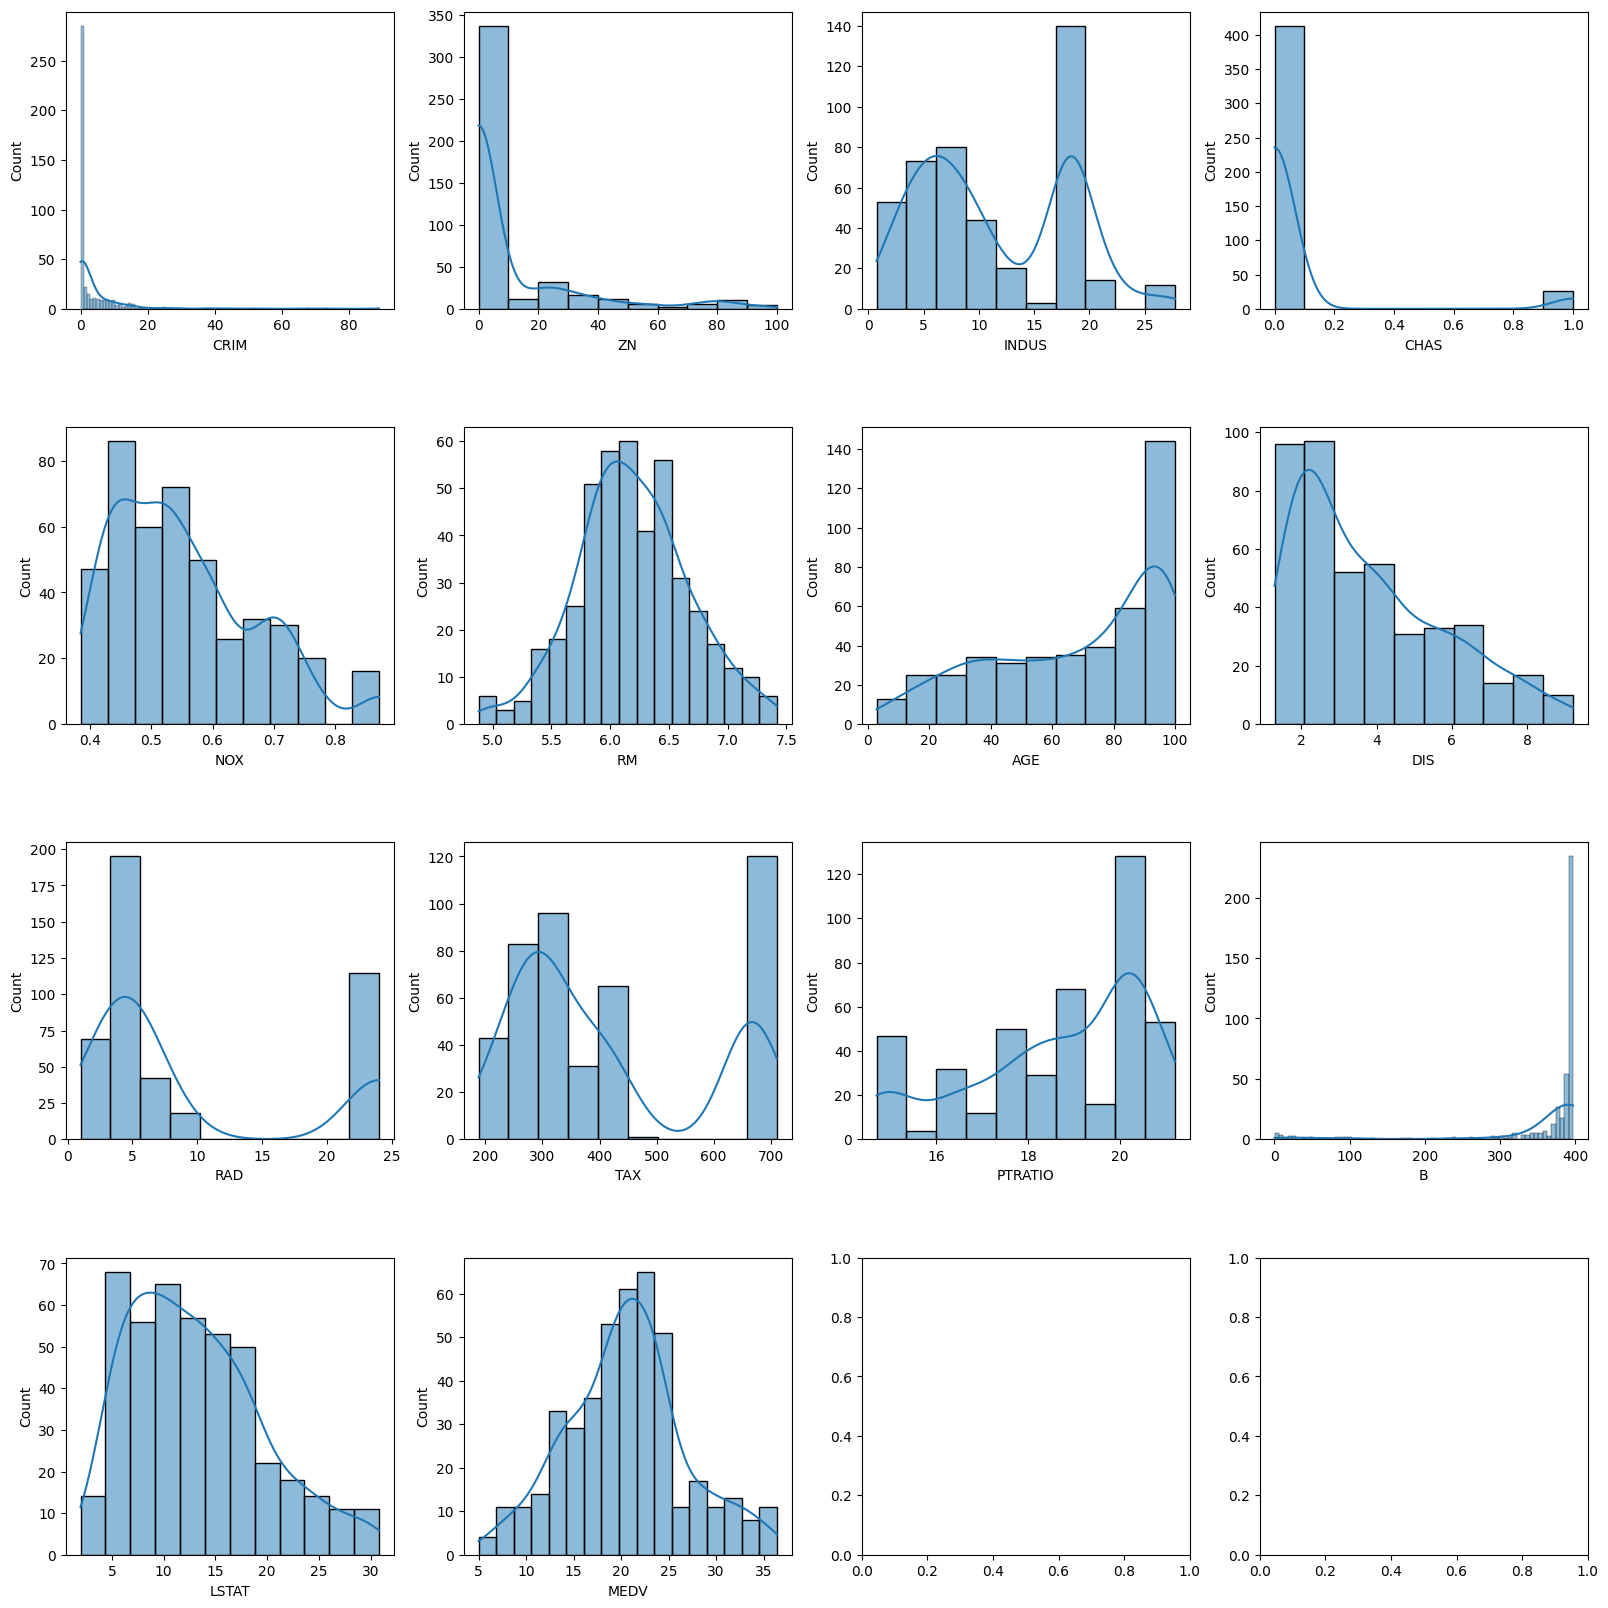

In [82]:
# draw a histogram for each feature to check for normality
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(16, 16))
axs = axs.flatten()
for i, col in enumerate(data_clean.columns):
    sns.histplot(data_clean[col], kde=True, ax=axs[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

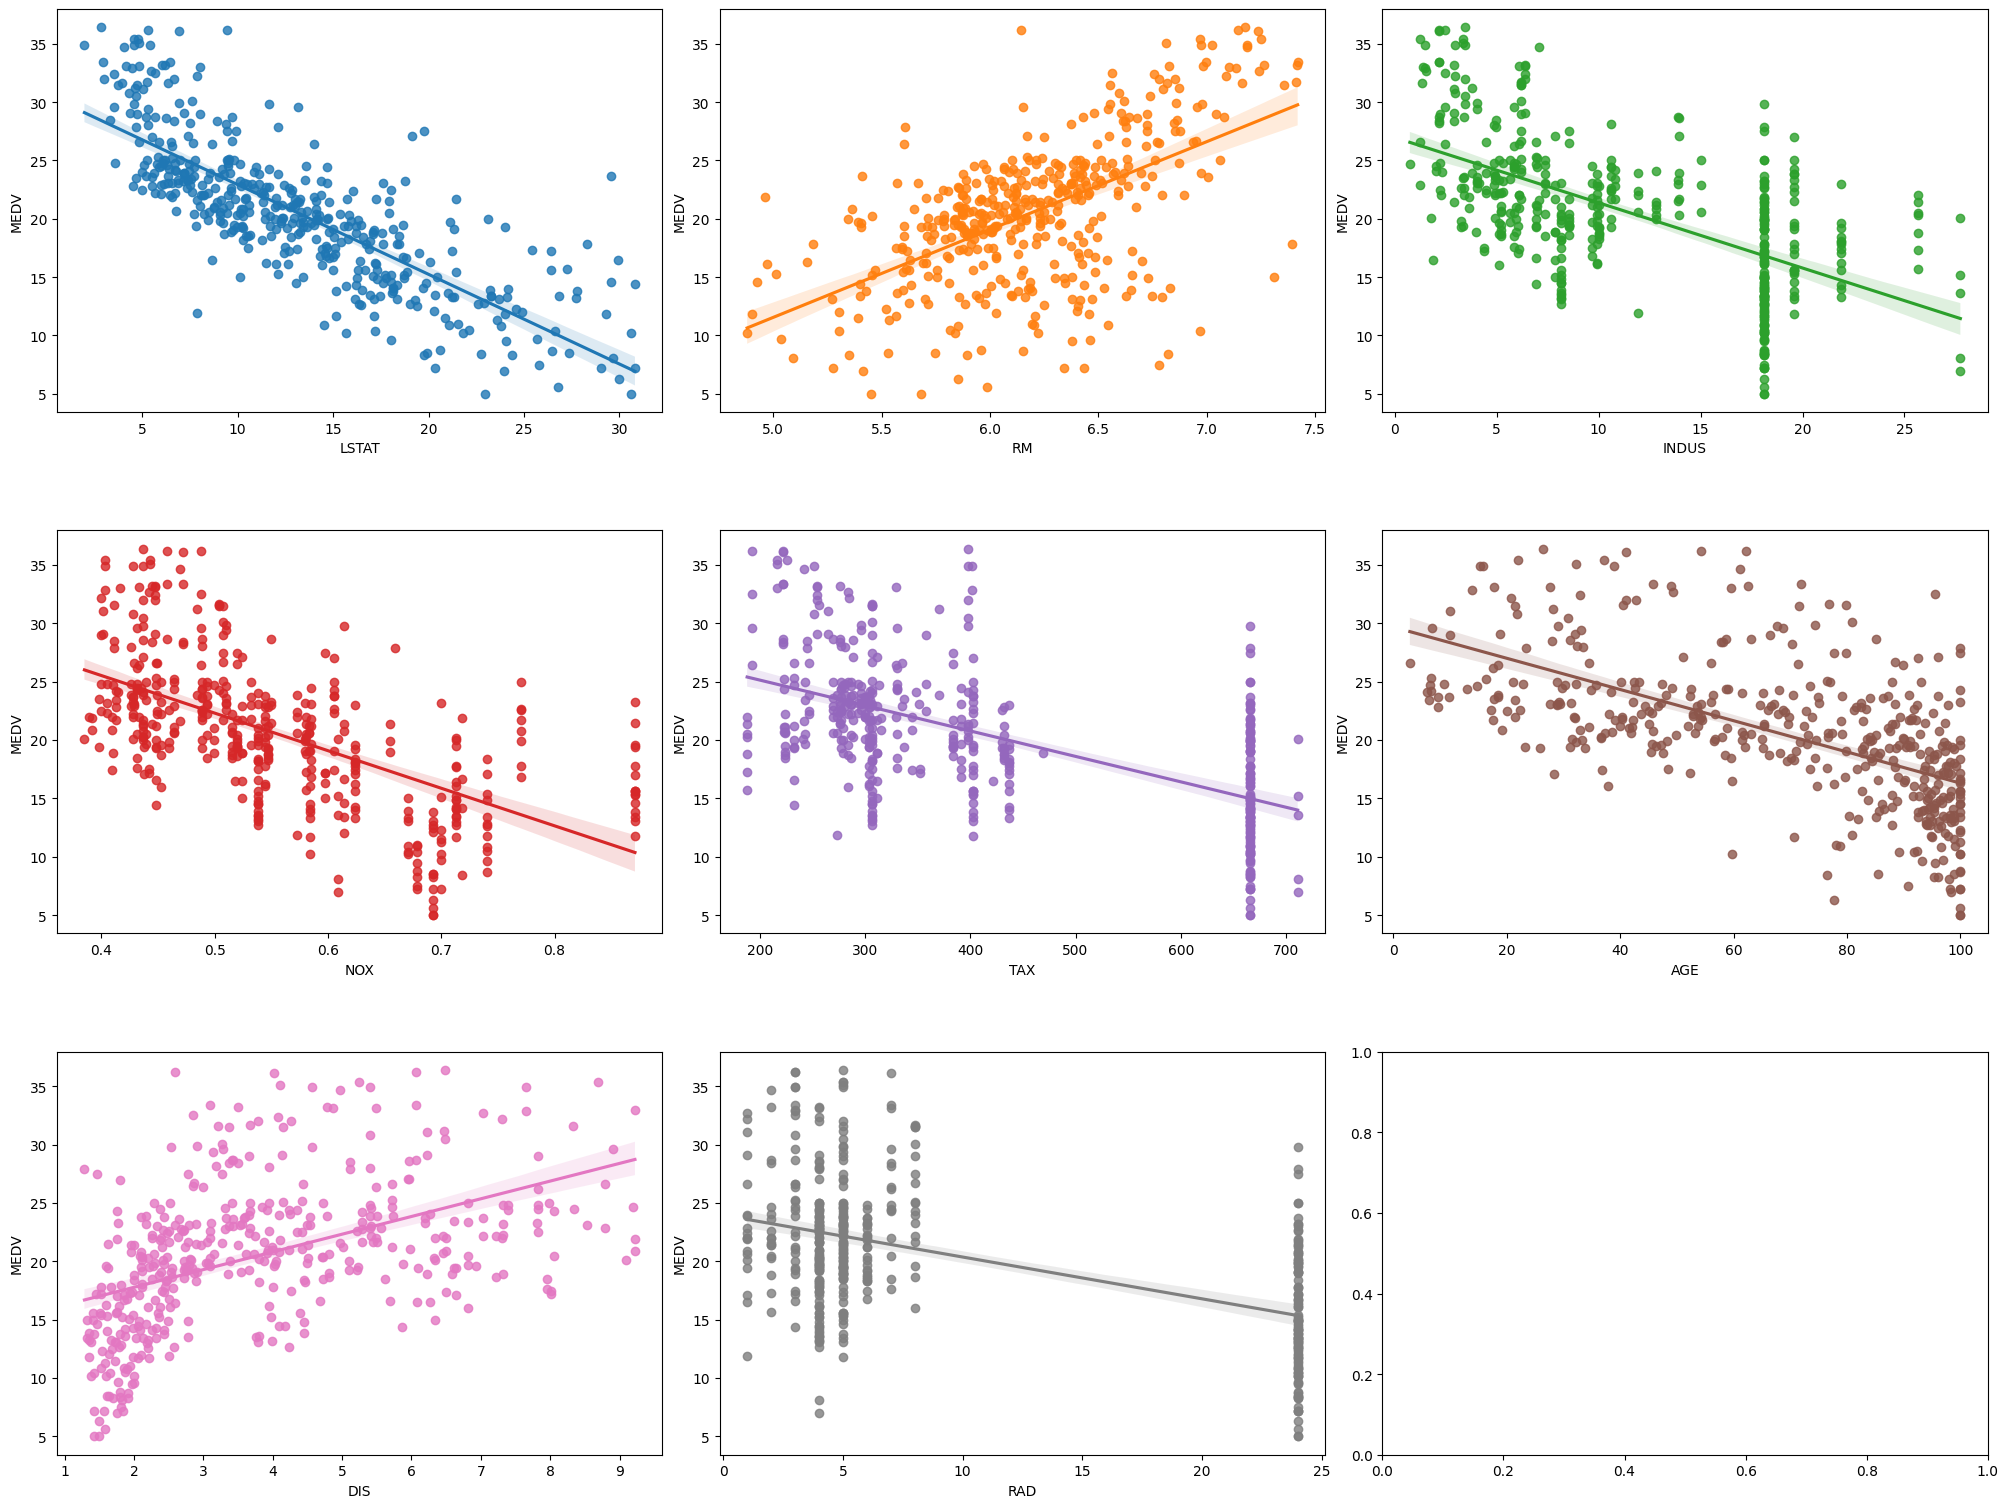

In [83]:
# draw a regression plot for the 8 features with the highest correlation with MEDV after removing outliers
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 15), )
axs = axs.flatten()
colors= ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink',
         'tab:gray', 'tab:olive', 'tab:cyan', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for i, col in enumerate(data_clean[['LSTAT', 'RM', 'INDUS', 'NOX', 'TAX', 'AGE', 'DIS', 'RAD']]):
    sns.regplot(x=col, y=data_clean['MEDV'], data=data_clean, ax=axs[i], color=colors[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

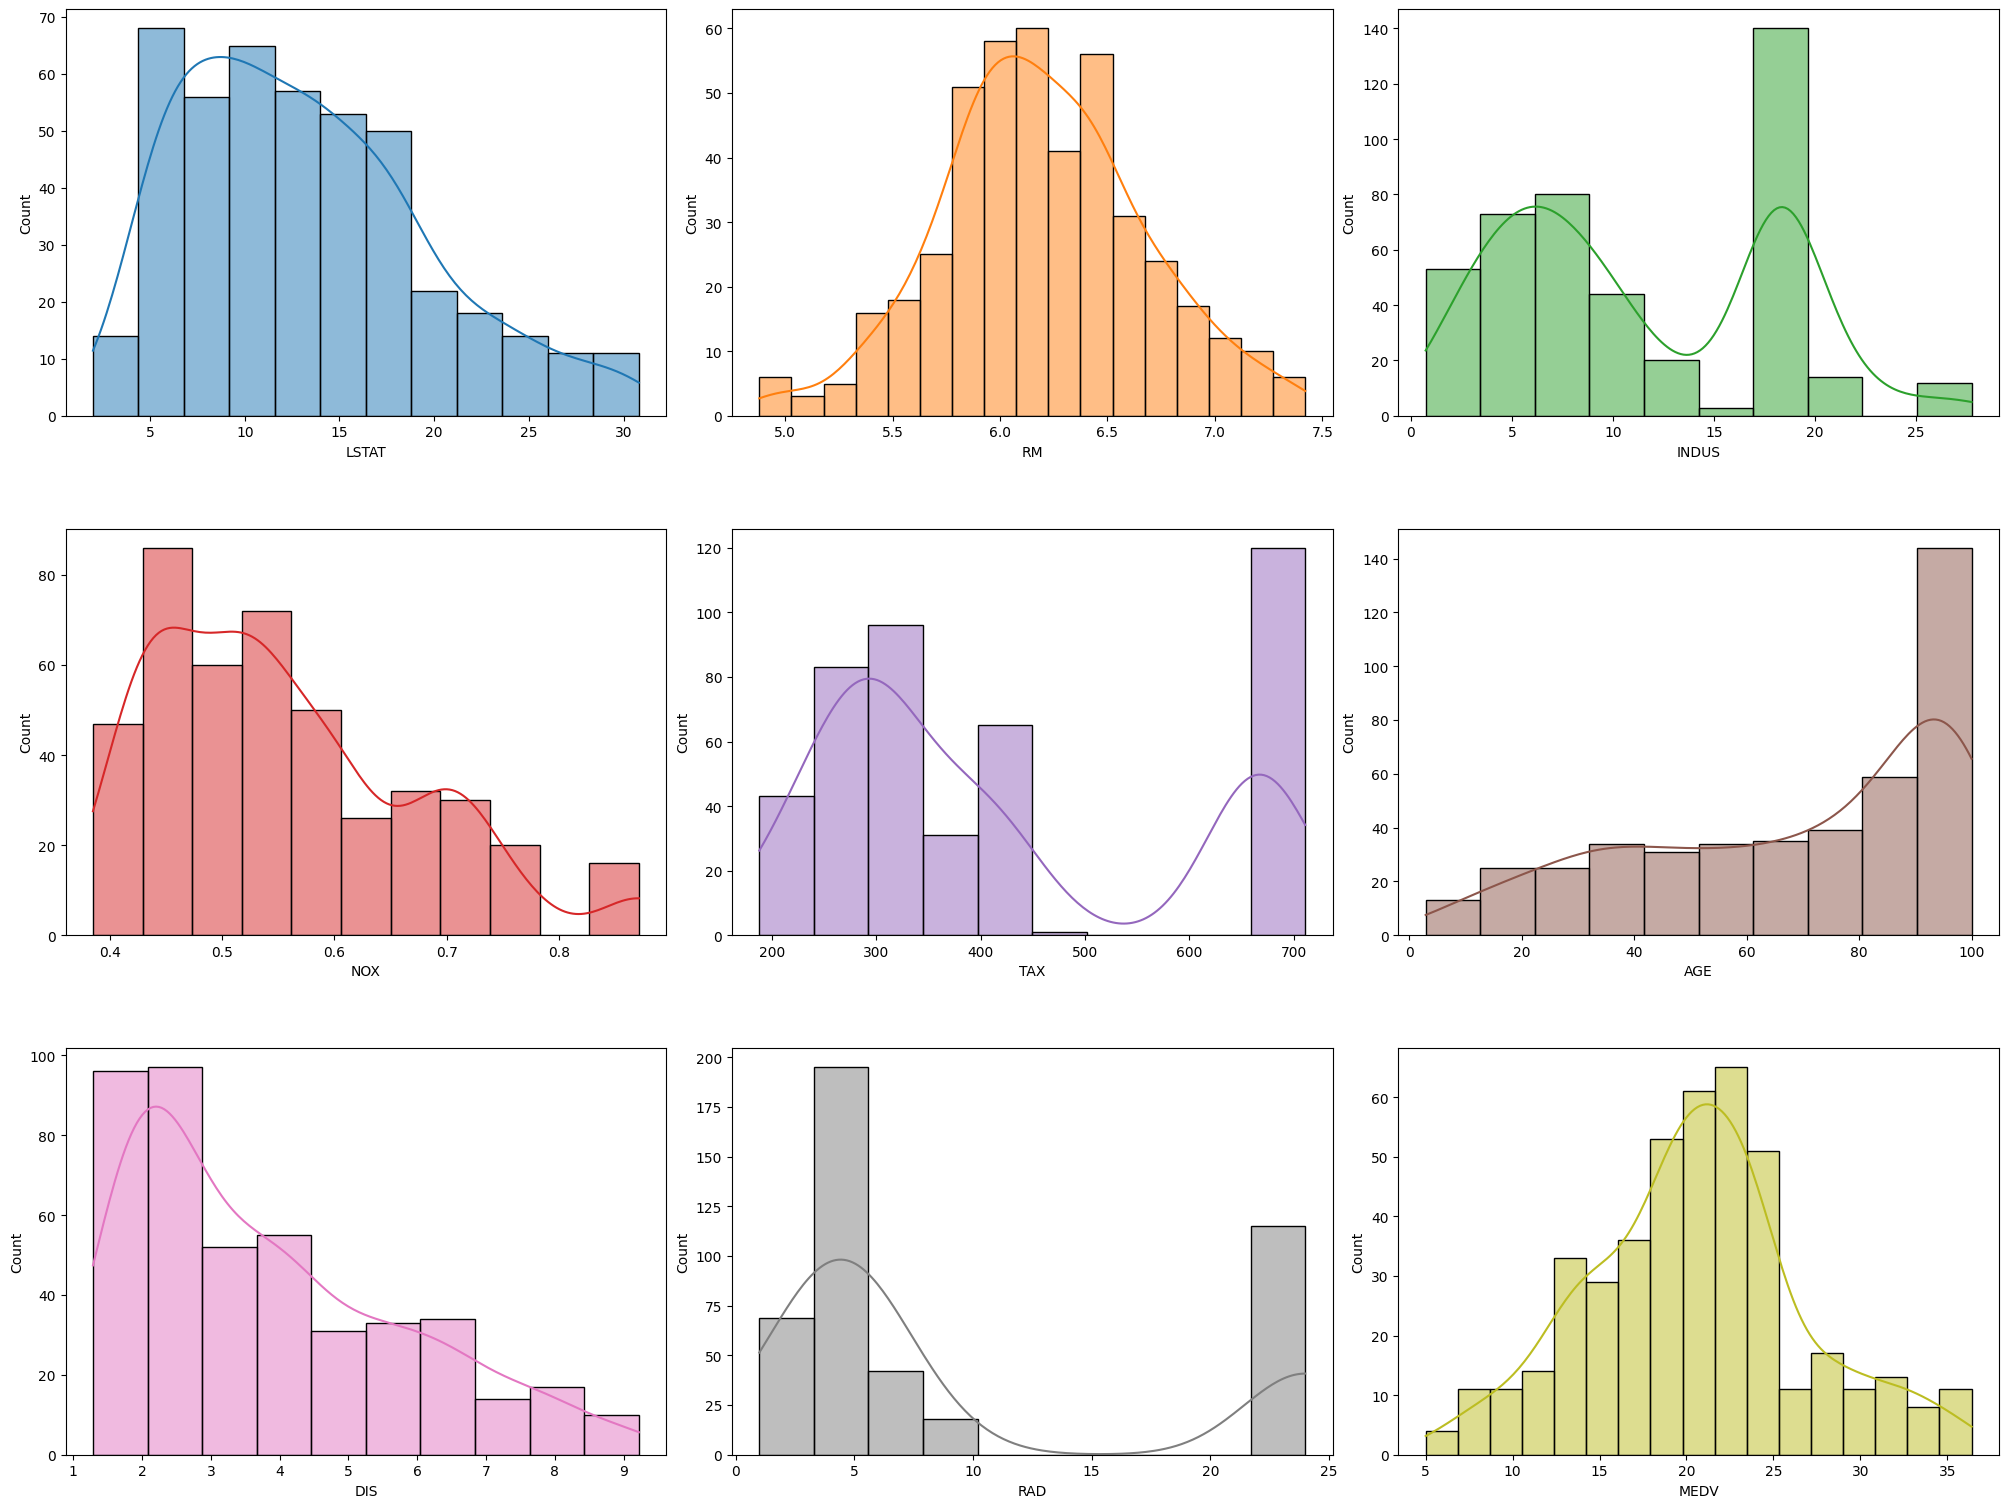

In [84]:
# histoplot for the 8 features with the highest correlation with MEDV after removing outliers
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 15))
axs = axs.flatten()

for i, col in enumerate(data_clean[['LSTAT', 'RM', 'INDUS', 'NOX', 'TAX', 'AGE', 'DIS', 'RAD', 'MEDV']]):
    sns.histplot(data_clean[col], kde=True, ax=axs[i], color=colors[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

The mean of MEDV is 20.53


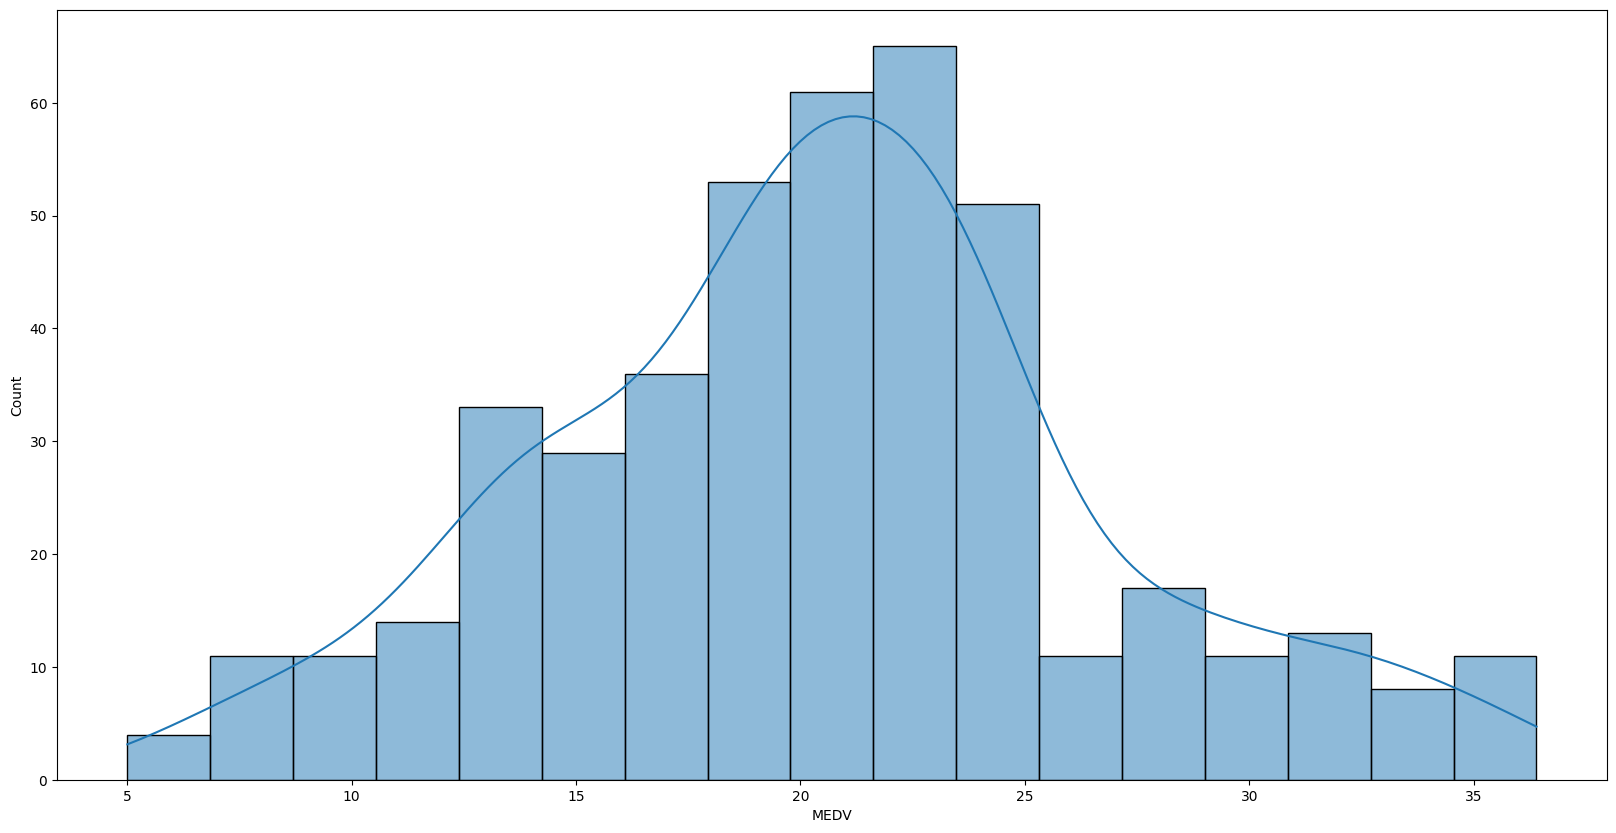

In [85]:
plt.figure(figsize=(20, 10))
sns.histplot(data_clean['MEDV'], kde=True)
mean_medv = data_clean['MEDV'].mean()
print(f"The mean of MEDV is {mean_medv:.2f}")

<Axes: >

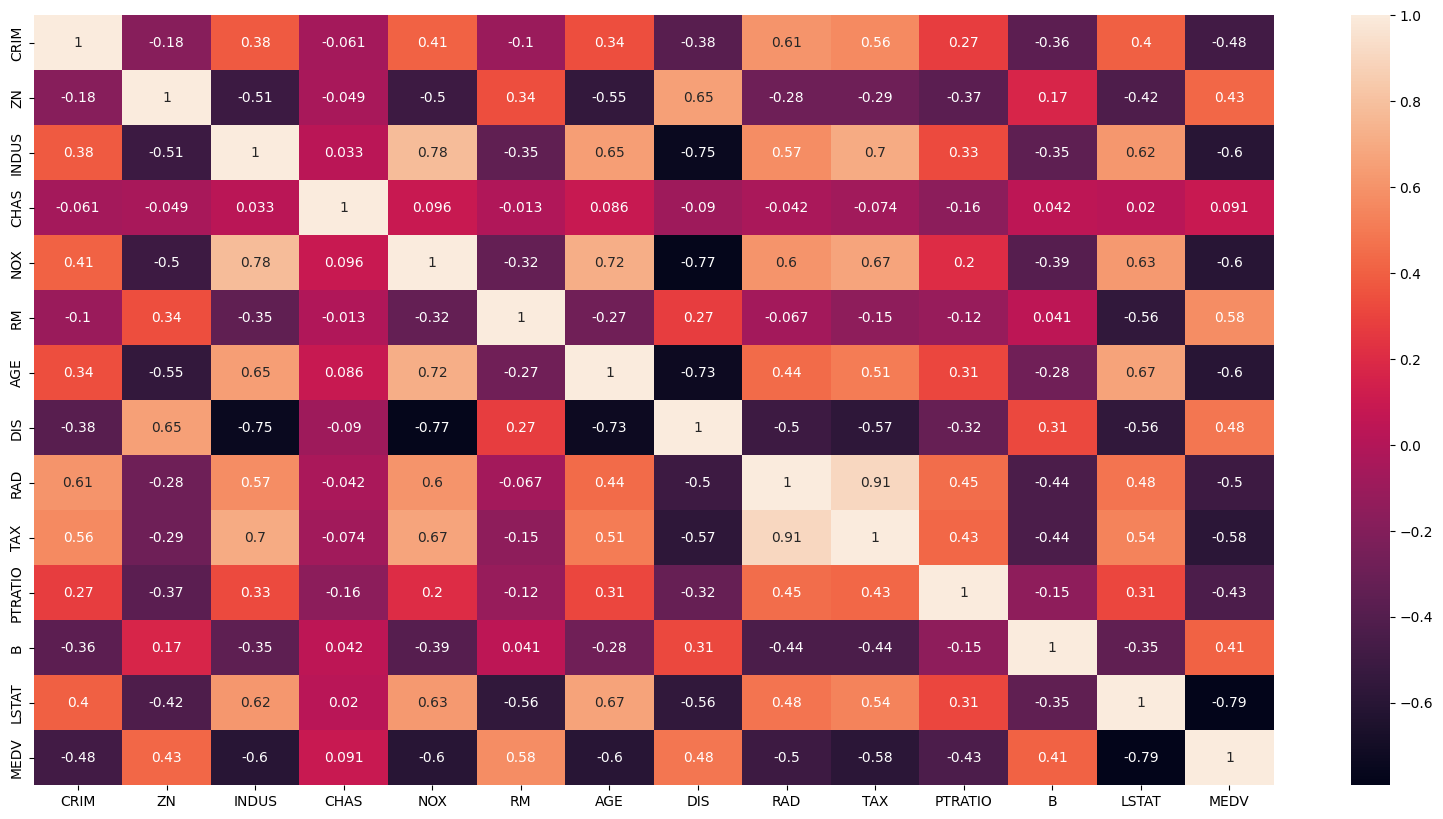

In [86]:
# final correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(data_clean.corr(), annot=True)

Text(0.5, 1.0, 'Correlation matrix (with clustering)')

<Figure size 2000x1000 with 0 Axes>

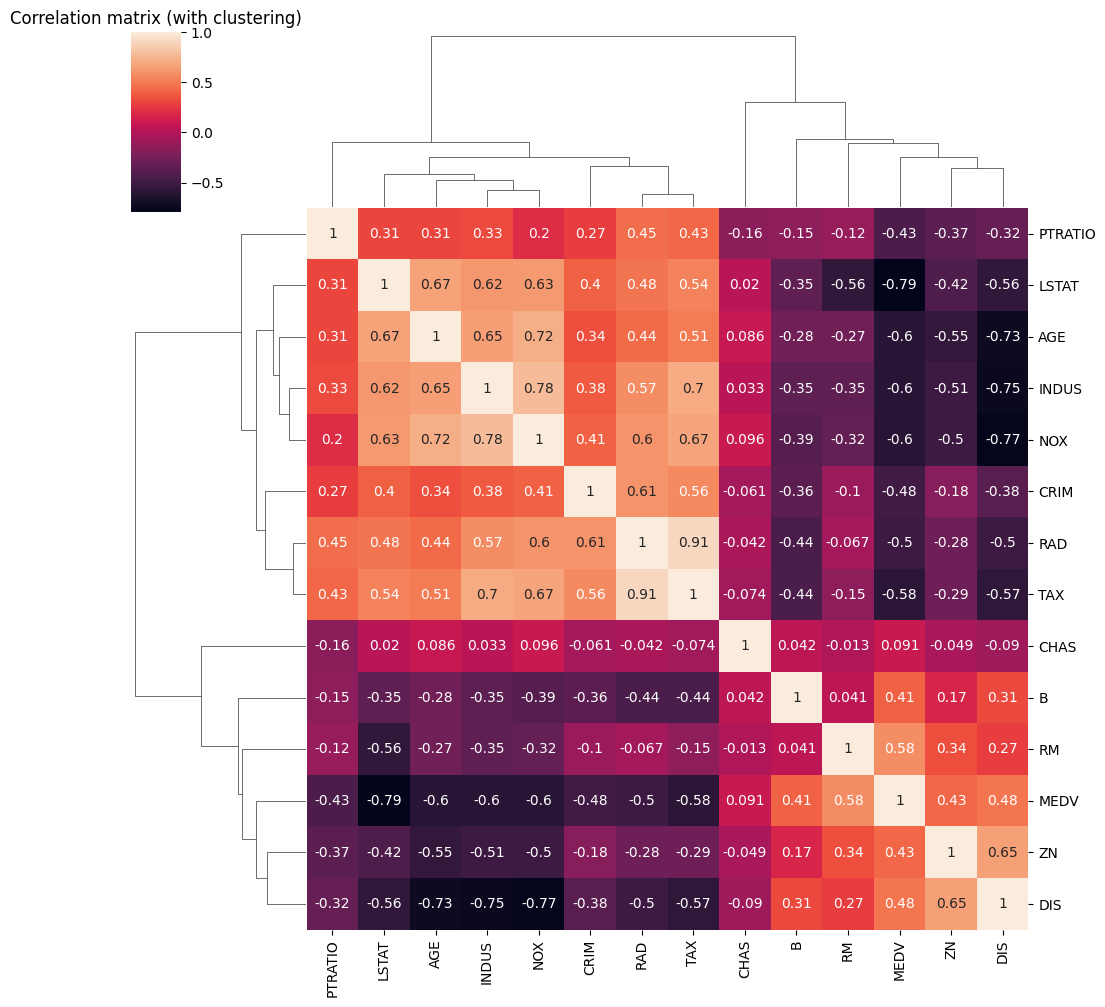

In [87]:
# Correlation matrix with clustering
plt.figure(figsize=(20, 10))
clustermap = sns.clustermap(data_clean.corr(), annot=True)
plt.title('Correlation matrix (with clustering)')

### Data Insight 1 (features correlation analysis)
- The correlation between **RAD** and **Tax** is *0.91*, which is very high. This means that closeness to radial highway has a direct impact on the amount of TAX on the property. This is because properties close to radial highways are more valuable and hence have higher taxes.

- The correlation between **INDUS** and **NOX** is *0.78*, which is high. This means that the amount of NOX in the air is highly dependent on the proportion of non-retail business acres per town. This is because non-retail business areas are more likely to have industries and factories which are the major sources of NOX emissions.

- The correlation between **INDUS** and **TAX** is *0.7*, which is high. This means that the amount of TAX on the property is highly dependent on the proportion of non-retail business acres per town. This is because non-retail business areas are more likely to have industries and factories which are the major sources of employment and hence higher property values.

- The correlation between **INDUS** and **AGE** is *0.65*, which is high. This means that the age of the property is highly dependent on the proportion of non-retail business acres per town. This is because non-retail business areas are more likely to have industries and factories which are the major sources of employment and hence older properties.

- The correlation between **INDUS** and **LSTAT** is *0.62*, which is high. This means that the percentage of lower status of the population is highly dependent on the proportion of non-retail business acres per town. This is because non-retail business areas are more likely to have industries and factories which are the major sources of employment and hence lower status population.

- The correlation between **ZN** and **DIS** is *0.65*, which is high. This means that the distance to employment centres is highly dependent on the proportion of residential land zoned for lots over 25,000 sq.ft. This is because the land closer to employment centres is more valuable and is used for commercial purposes which makes sense as the land closer to employment centres is more valuable and is used for commercial purposes.

- The correlation between **INDUS** and **DIS** is *-0.75*, which is high. This means that the distance to employment centres is highly dependent on the proportion of non-retail business acres per town. This is because non-retail business areas are more likely to have industries and factories which are the major sources of employment.

- The correlation between **DIS** and **AGE** is *-0.75*, which is high. This means that the distance to employment centers is highly dependent on the age of the property. This is because older properties are more likely to be closer to employment centers.

- The correlation between **RAD** and **INDUS** is *0.57*, which is high. This means that the proportion of non-retail business acres per town is highly dependent on the index of accessibility to radial highways. This is because non-retail business areas are more likely to have industries and factories which demand better accessibility to radial highways for product transportation.

- The correlation between **RAD** and **NOX** is *0.6*, which is high. This means that the amount of NOX in the air is highly dependent on the index of accessibility to radial highways. This is because radial highways are major sources of NOX emissions.

Correlation between TAX and RAD:
          TAX       RAD
TAX  1.000000  0.907505
RAD  0.907505  1.000000


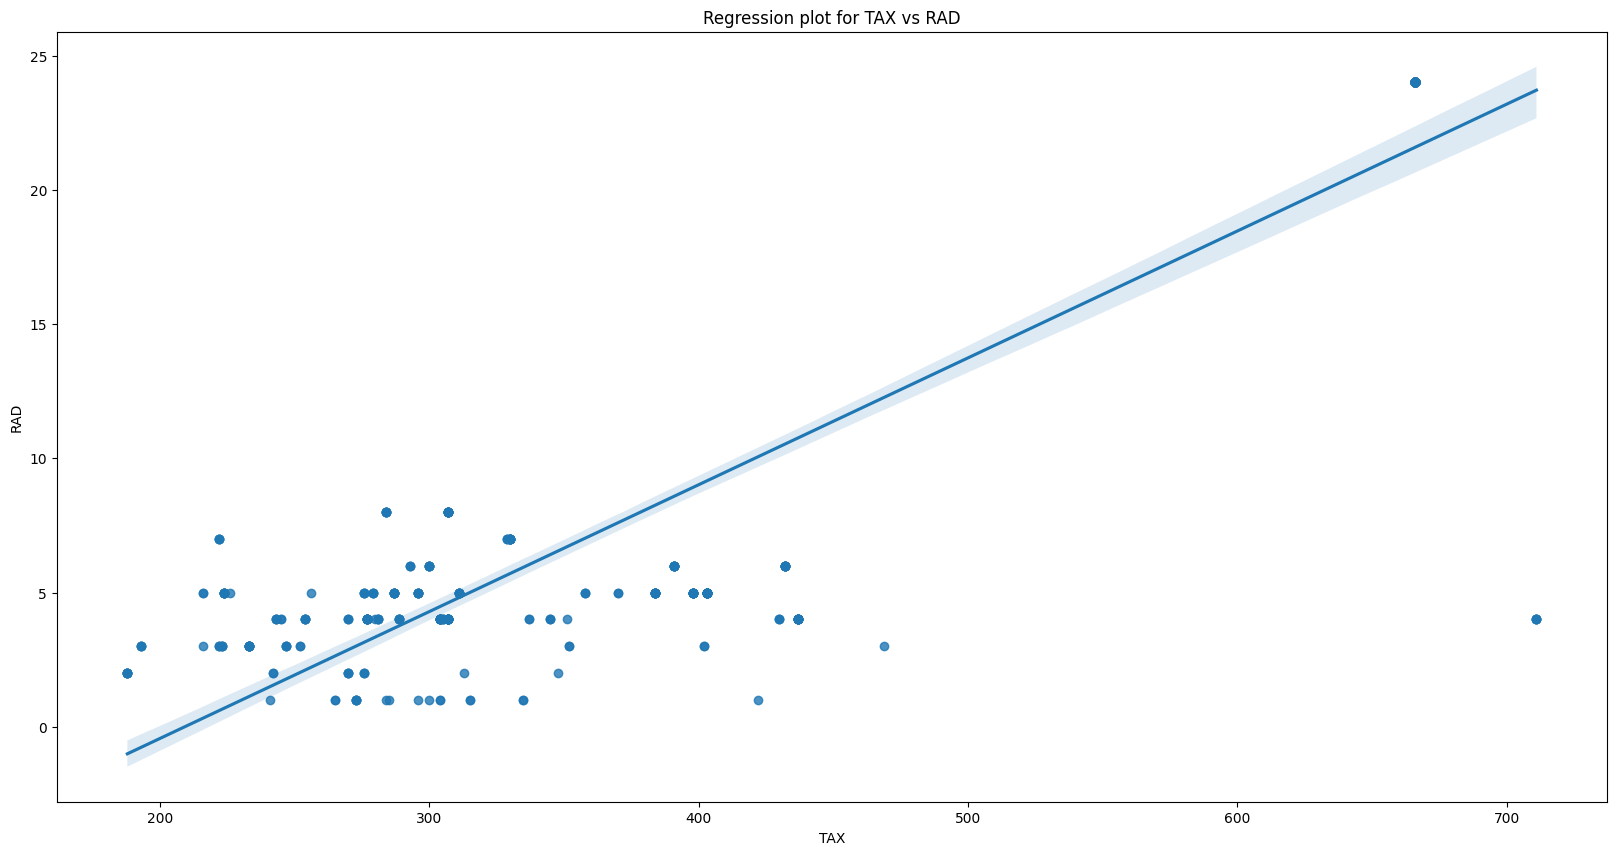

In [88]:
# let's check for correlations between the TAX and RAD
plt.figure(figsize=(20, 10))
sns.regplot(x='TAX', y='RAD', data=data_clean)
plt.title('Regression plot for TAX vs RAD')
# calculate the correlation between TAX and RAD
print("Correlation between TAX and RAD:")
print(data_clean[['TAX', 'RAD']].corr())

plt.show()

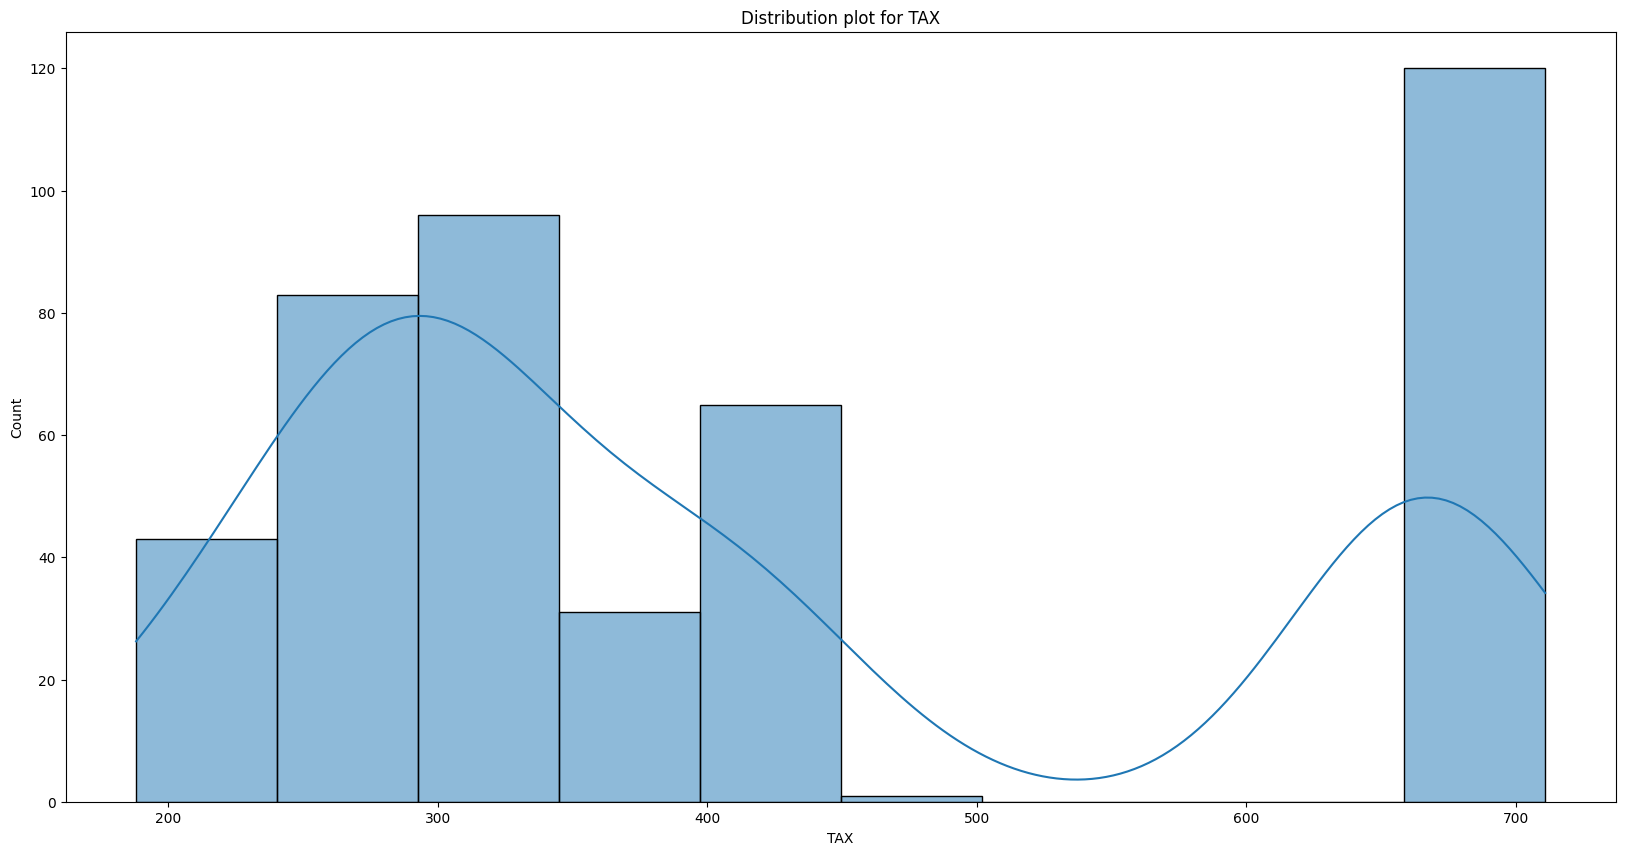

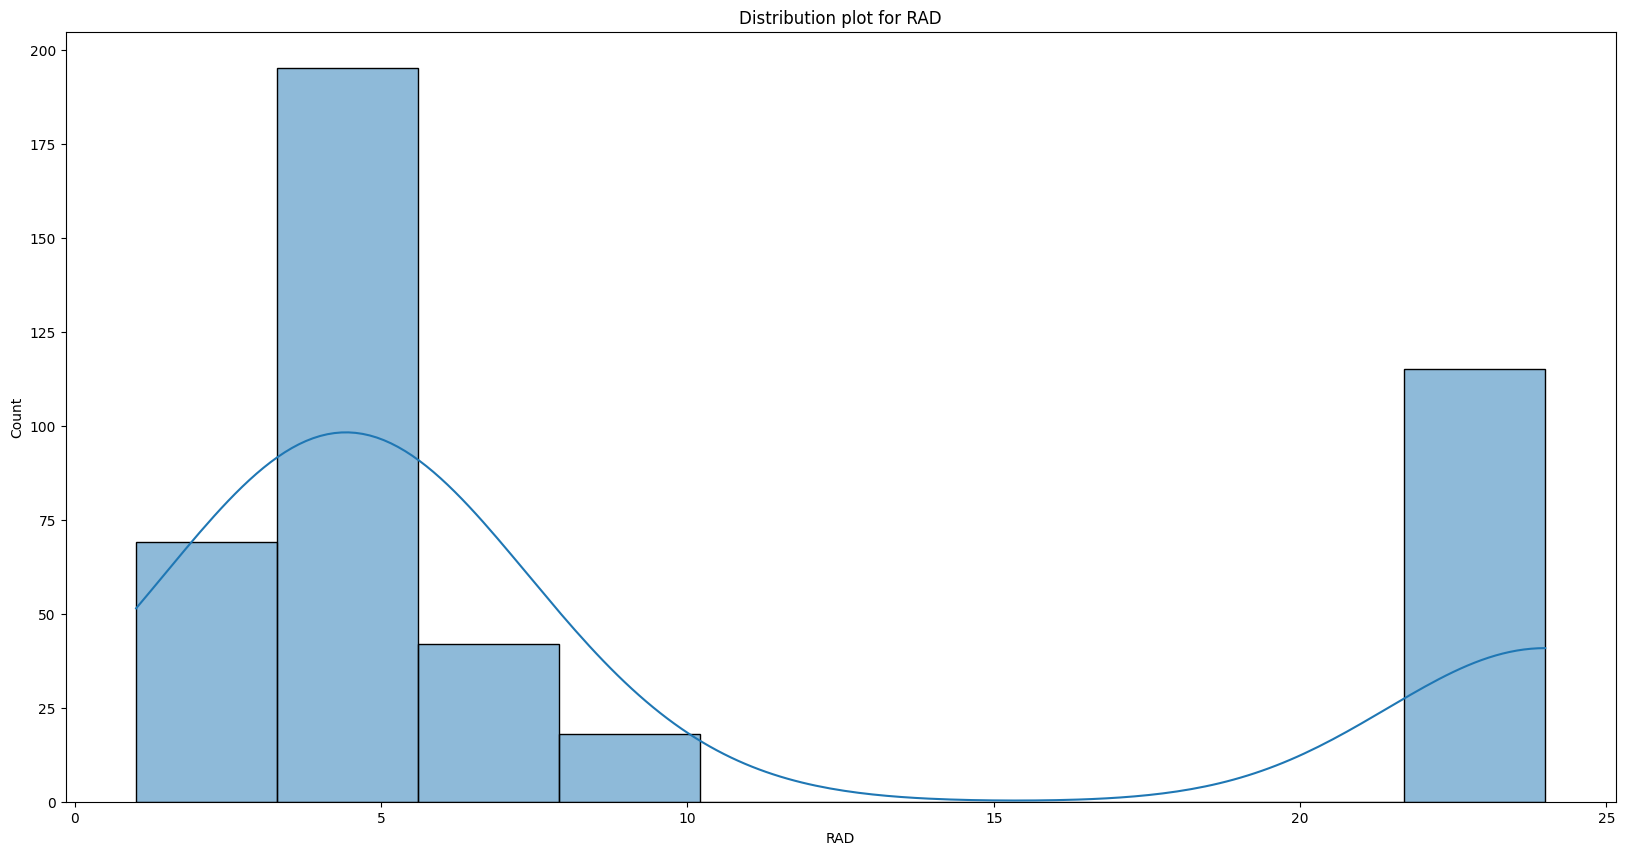

In [89]:
# Let's check for the normal distribution for RAD vs TAX to know how much data we have at the highest values
plt.figure(figsize=(20, 10))
plt.title('Distribution plot for TAX')
sns.histplot(data_clean['TAX'], kde=True)
plt.title('Distribution plot for TAX')

plt.figure(figsize=(20, 10))
plt.title('Distribution plot for RAD')
sns.histplot(data_clean['RAD'], kde=True)
plt.title('Distribution plot for RAD')
plt.show()

### Data insight on RAD vs TAX
Because there is a significant number of residential properties with higher tax and higher accessibility to radial highways, we can accept the correlation between RAD and TAX as a valid insight.

___

Correlation between INDUS and NOX:
          INDUS       NOX
INDUS  1.000000  0.779173
NOX    0.779173  1.000000


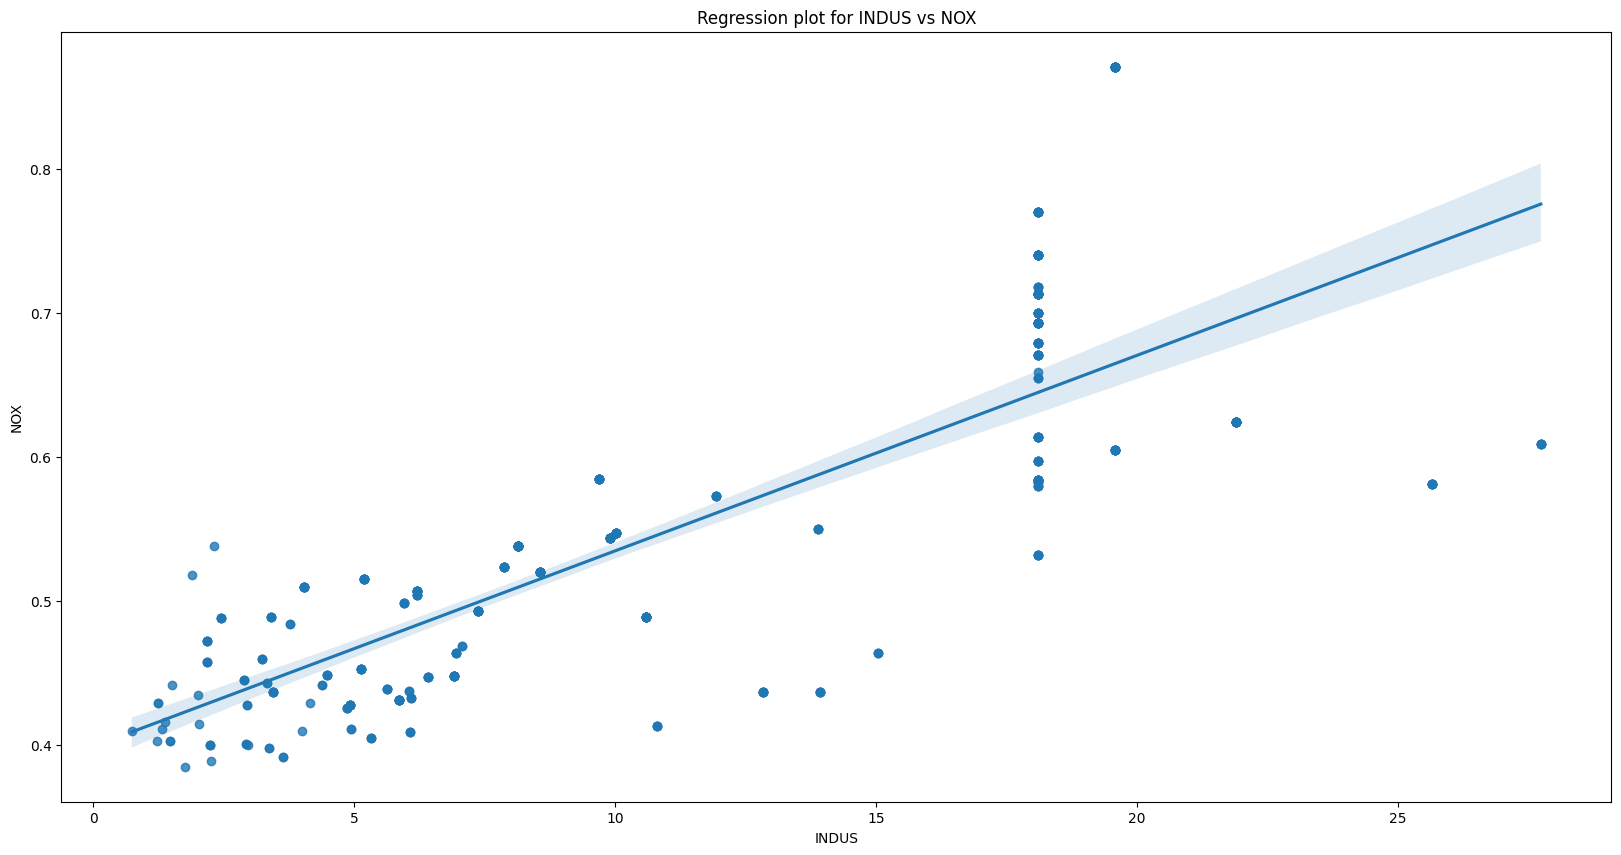

In [90]:
# examine the correlation between INDUS and NOX
plt.figure(figsize=(20, 10))
sns.regplot(x='INDUS', y='NOX', data=data_clean)
plt.title('Regression plot for INDUS vs NOX')
# calculate the correlation between INDUS and NOX
print("Correlation between INDUS and NOX:")
print(data_clean[['INDUS', 'NOX']].corr())
plt.show()

Correlation between INDUS and TAX:
          INDUS       TAX
INDUS  1.000000  0.700637
TAX    0.700637  1.000000


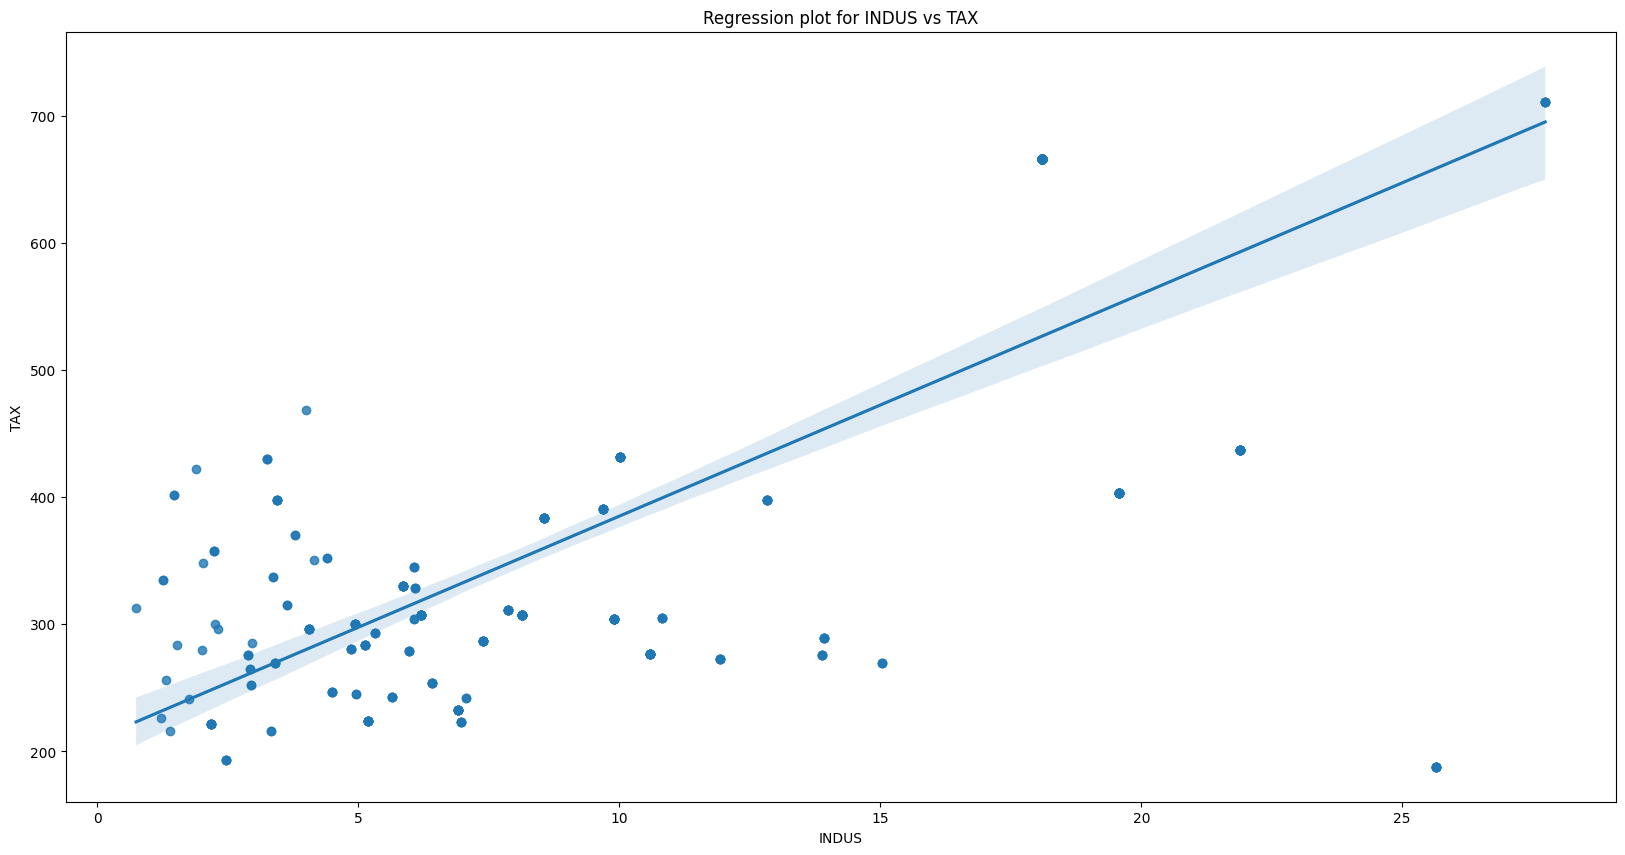

In [91]:
# examine the correlation between INDUS and TAX
plt.figure(figsize=(20, 10))
sns.regplot(x='INDUS', y='TAX', data=data_clean)
plt.title('Regression plot for INDUS vs TAX')
# calculate the correlation between INDUS and TAX
print("Correlation between INDUS and TAX:")
print(data_clean[['INDUS', 'TAX']].corr())

plt.show()


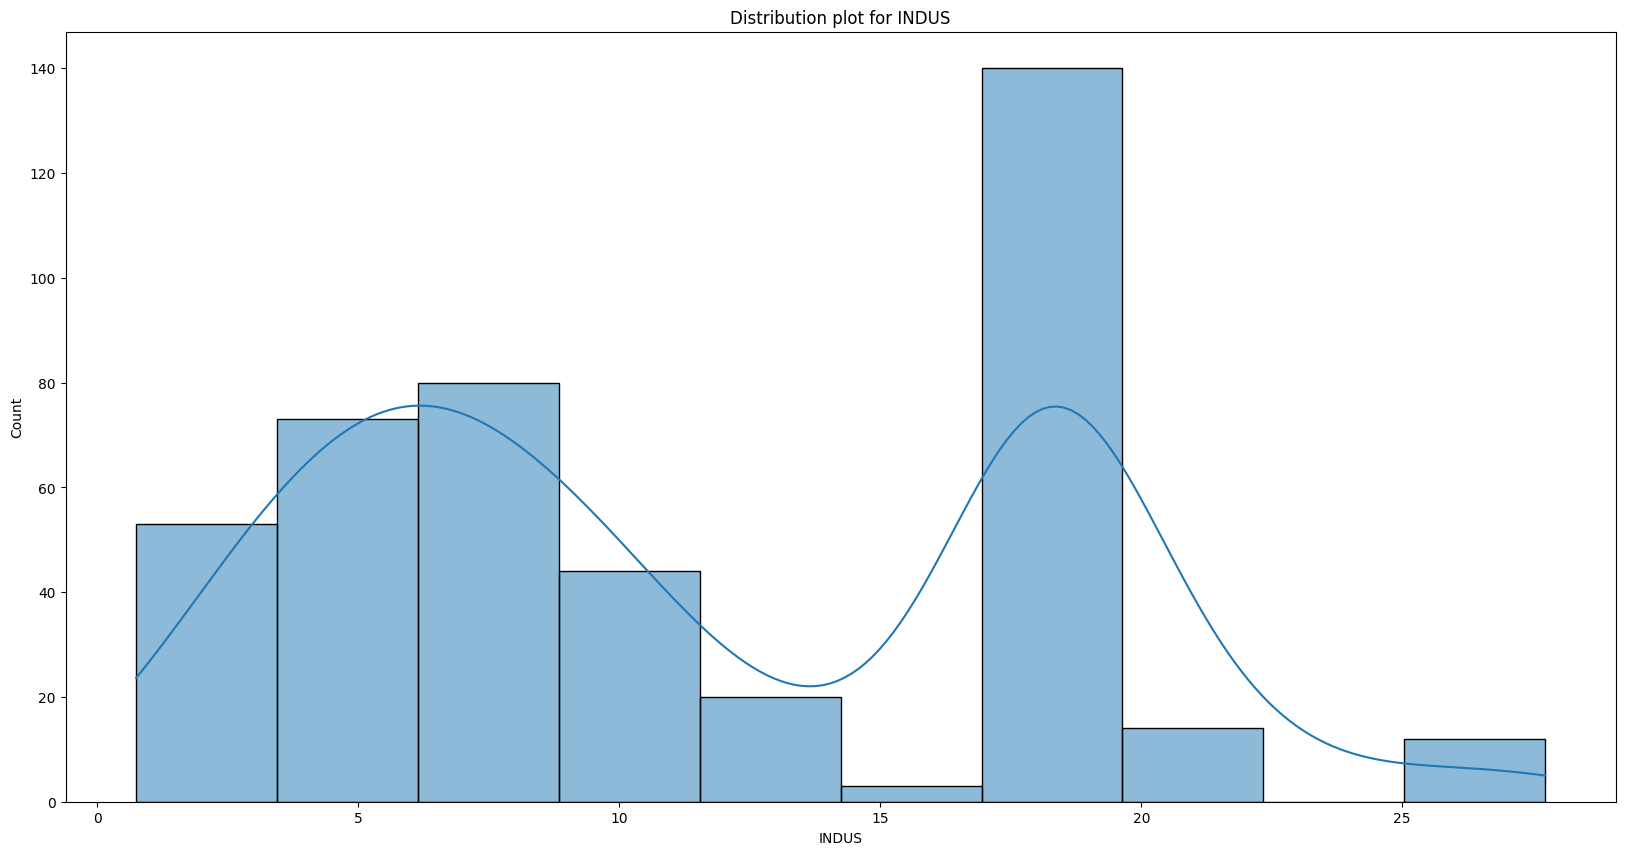

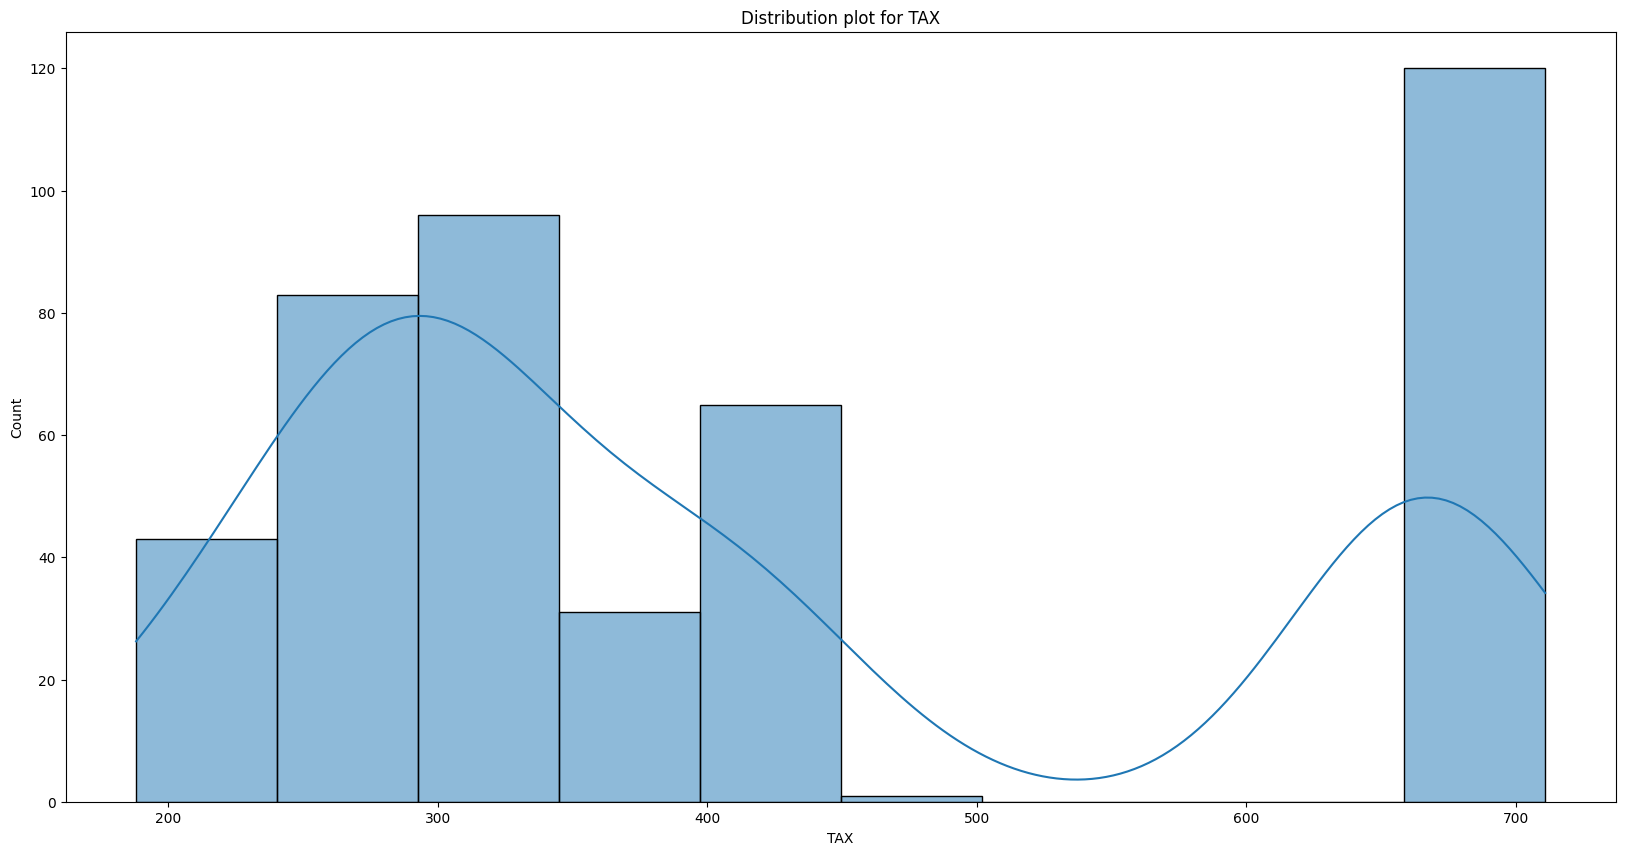

In [92]:
# examine the INDUS and TAX for normal distribution
plt.figure(figsize=(20, 10))
sns.histplot(data_clean['INDUS'], kde=True)
plt.title('Distribution plot for INDUS')

plt.figure(figsize=(20, 10))
sns.histplot(data_clean['TAX'], kde=True)
plt.title('Distribution plot for TAX')
plt.show()

### Data insight on INDUS vs TAX
We can observe two classes of industrial properties based on the TAX and INDUS correlation:
1. **High TAX and High INDUS**: These properties are likely to be located in industrial zones with higher property values due to the presence of industries and factories. The high TAX is justified by the higher property values and the economic activity generated by these industries.
2. **Low TAX and Low INDUS**: These properties are likely to be located in non-industrial zones with lower property values. The low TAX is justified by the lower property values and the lack of economic activity generated by industries.
Also, there is no meaningful pattern for properties of Low TAX and Low INDUS.
This correlation is questionalble and needs further investigation to understand the underlying factors.

Correlation between INDUS and AGE:
          INDUS       AGE
INDUS  1.000000  0.647643
AGE    0.647643  1.000000


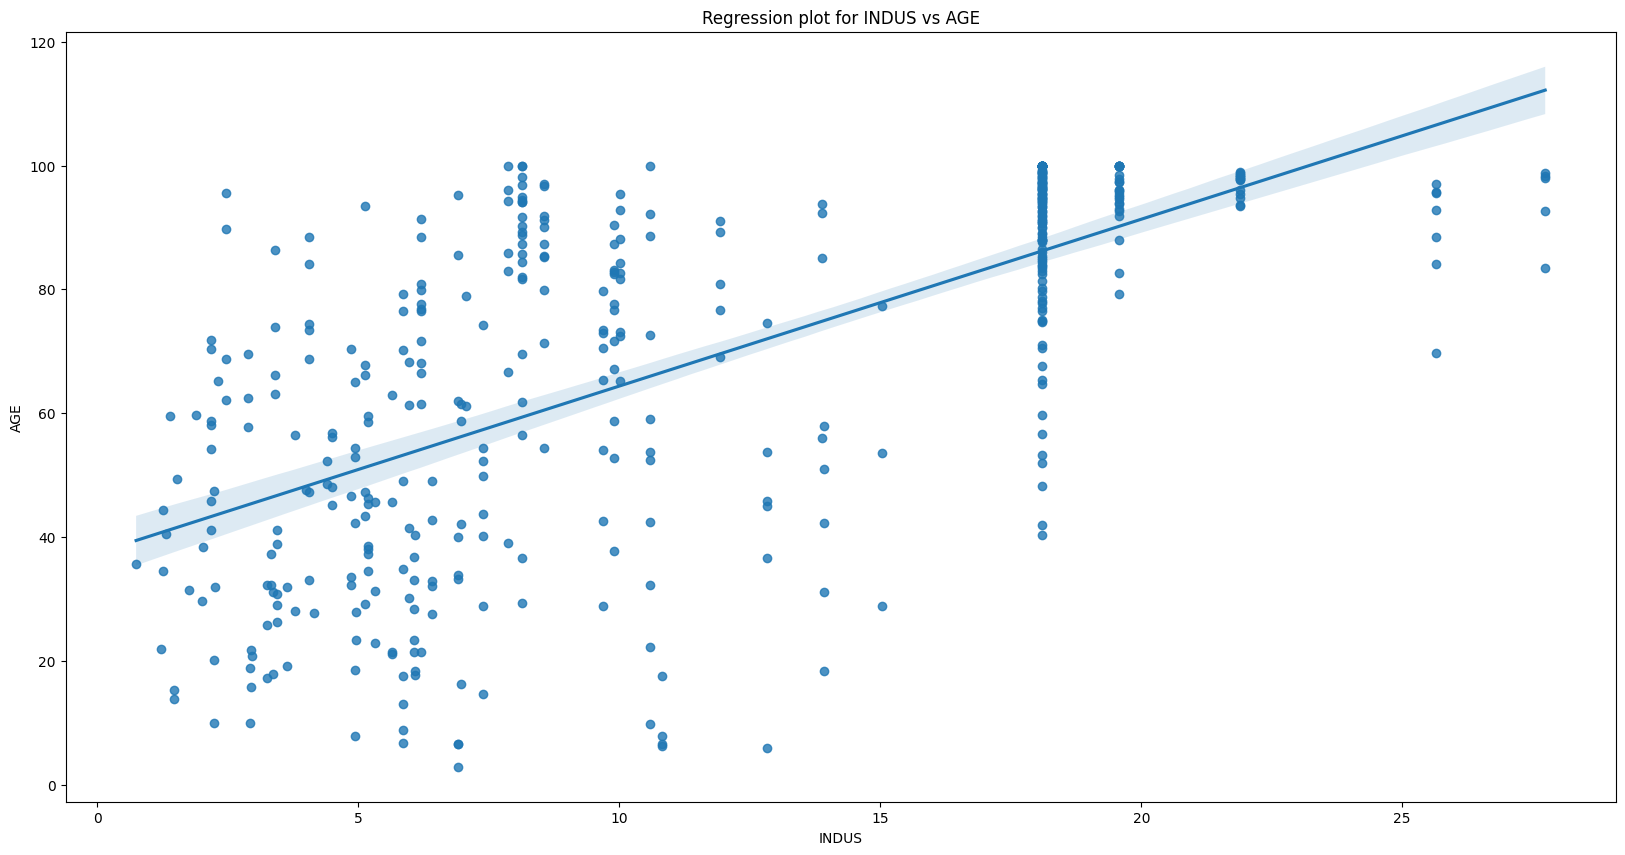

In [93]:
# examine the correlation between INDUS and AGE
plt.figure(figsize=(20, 10))
sns.regplot(x='INDUS', y='AGE', data=data_clean)
plt.title('Regression plot for INDUS vs AGE')

# calculate the correlation between INDUS and AGE
print("Correlation between INDUS and AGE:")
print(data_clean[['INDUS', 'AGE']].corr())

plt.show()

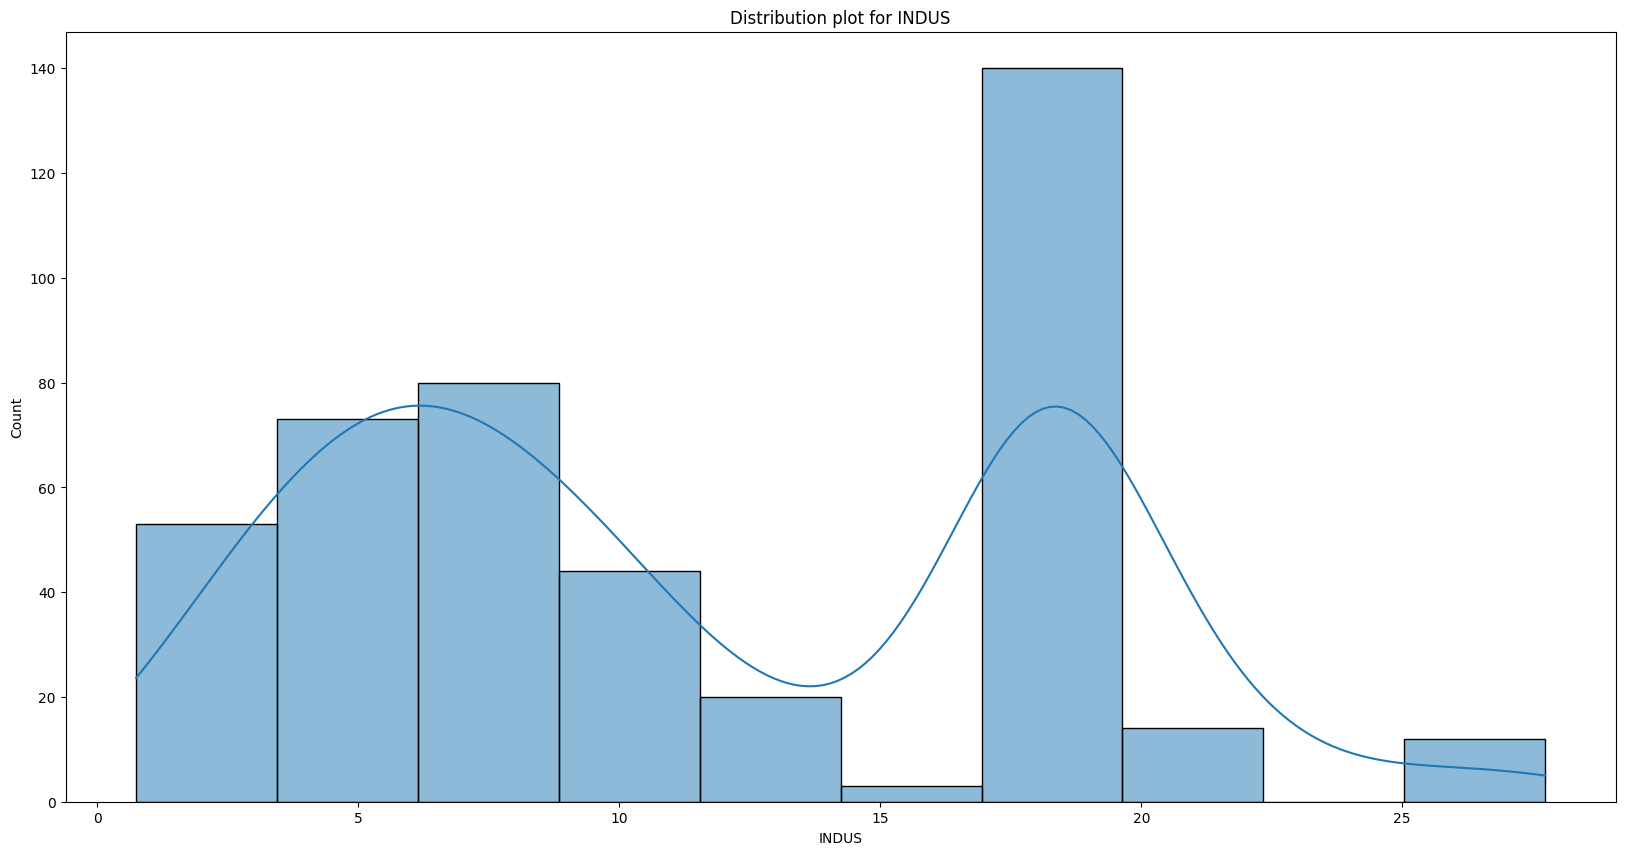

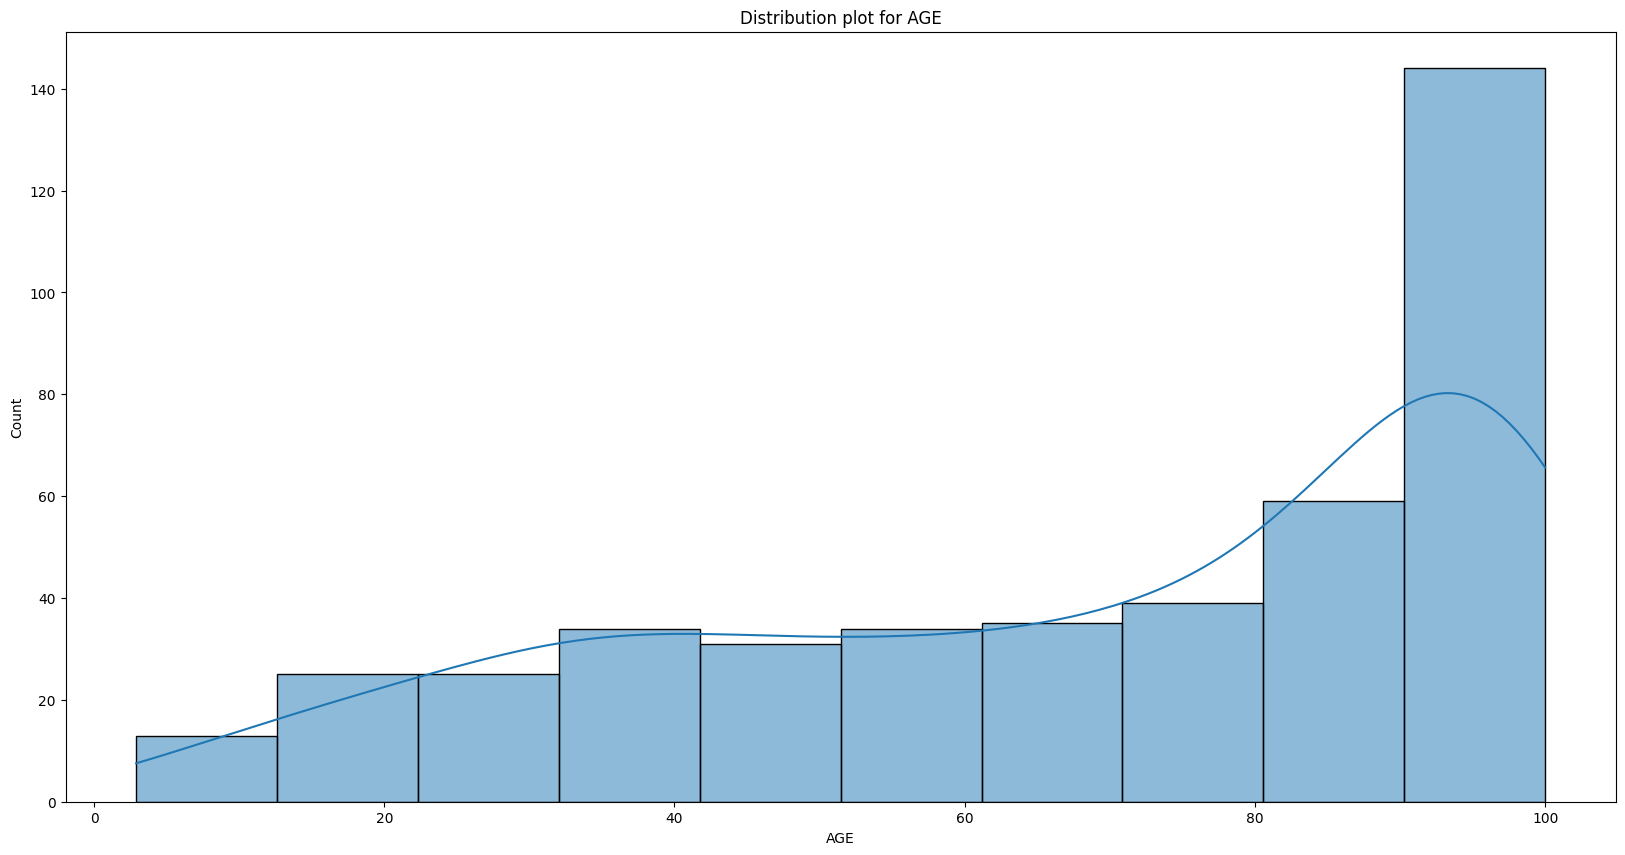

In [94]:
# compare normal distribution of INDUS and AGE
plt.figure(figsize=(20, 10))
sns.histplot(data_clean['INDUS'], kde=True)
plt.title('Distribution plot for INDUS')

plt.figure(figsize=(20, 10))
sns.histplot(data_clean['AGE'], kde=True)
plt.title('Distribution plot for AGE')
plt.show()

### Data insight on INDUS vs AGE
The correlation between INDUS and AGE suggests that properties in industrial zones tend to be older. This could be due to the fact that industrial areas were developed earlier and have not seen significant redevelopment or gentrification.
This also proves that retail businesses are more inclined to renew their properties since it is more profitable for them to do so.
Other than the highly industrial zones, the older properties seem to be distributed evenly across the spectrum of industrial zones.

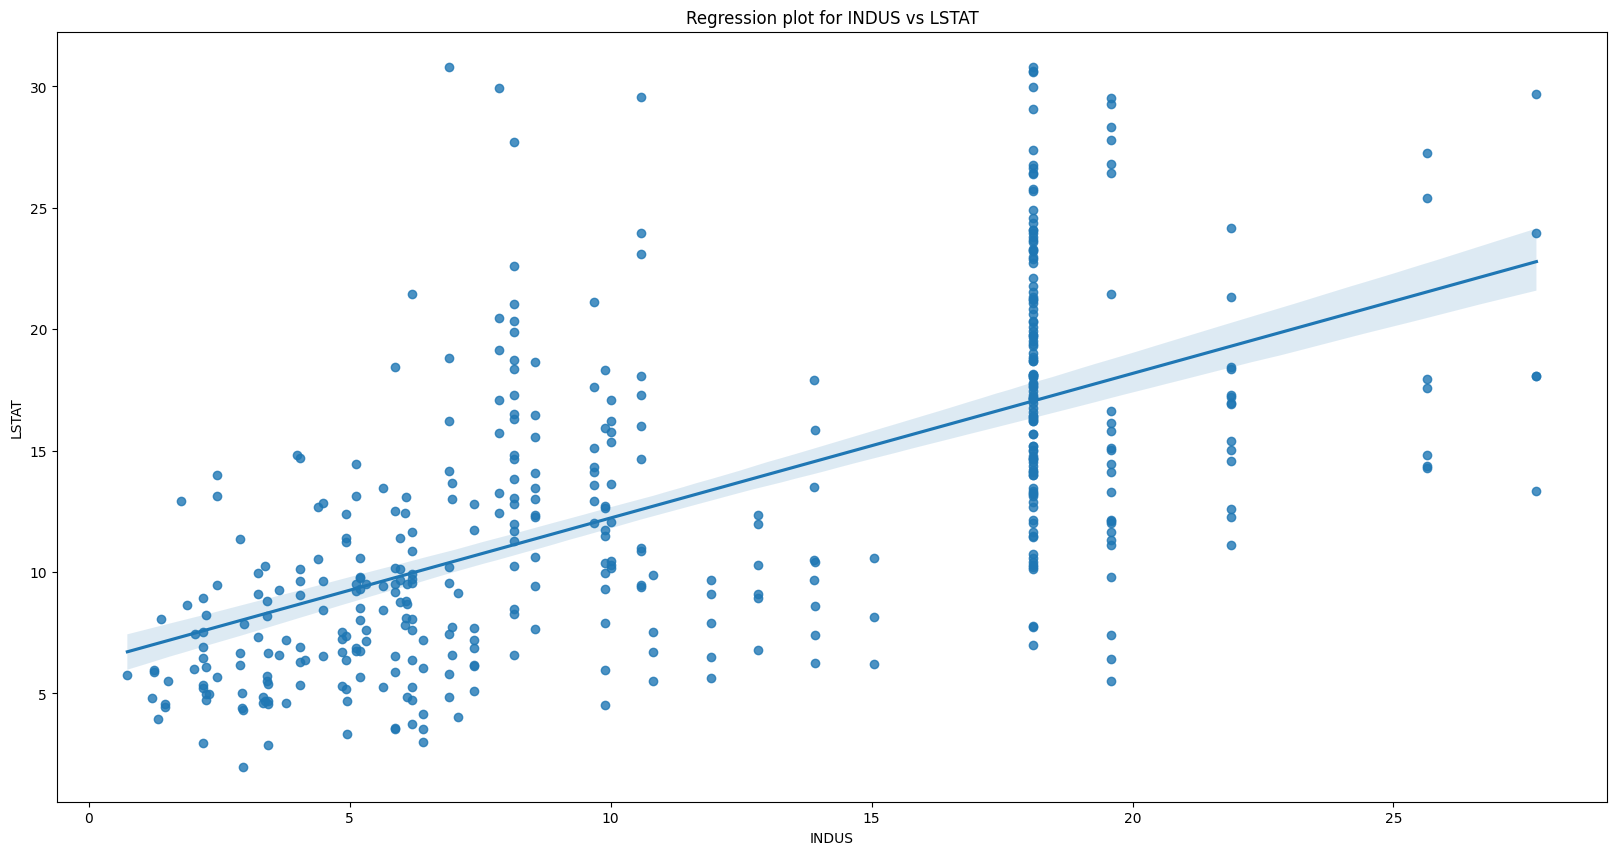

In [95]:
# examine the correlation between INDUS and LSTAT
plt.figure(figsize=(20, 10))
sns.regplot(x='INDUS', y='LSTAT', data=data_clean)
plt.title('Regression plot for INDUS vs LSTAT')
plt.show()

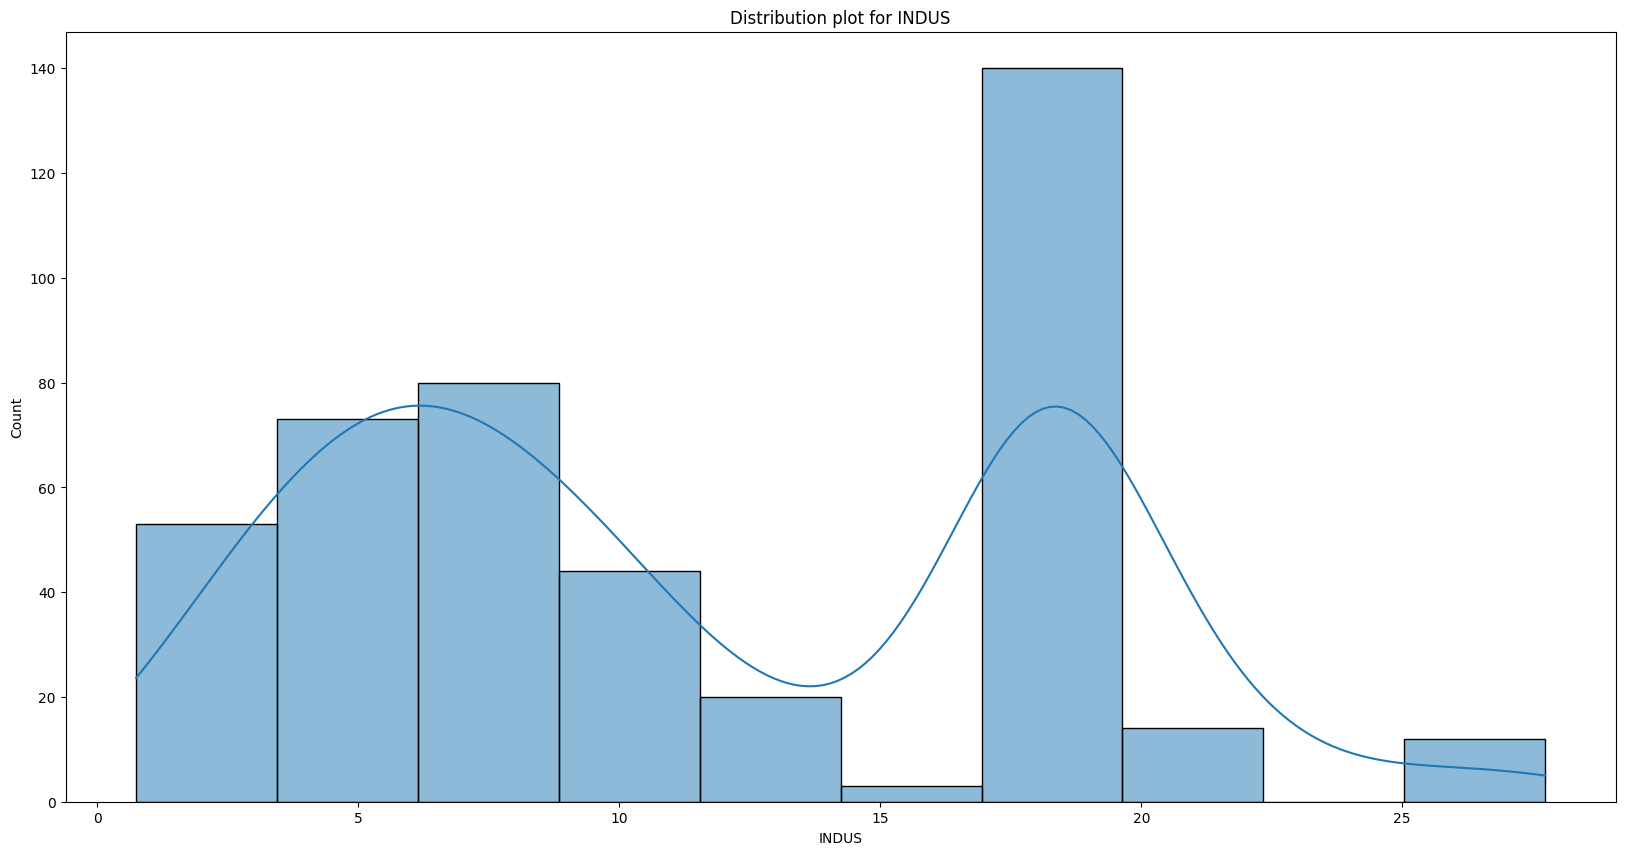

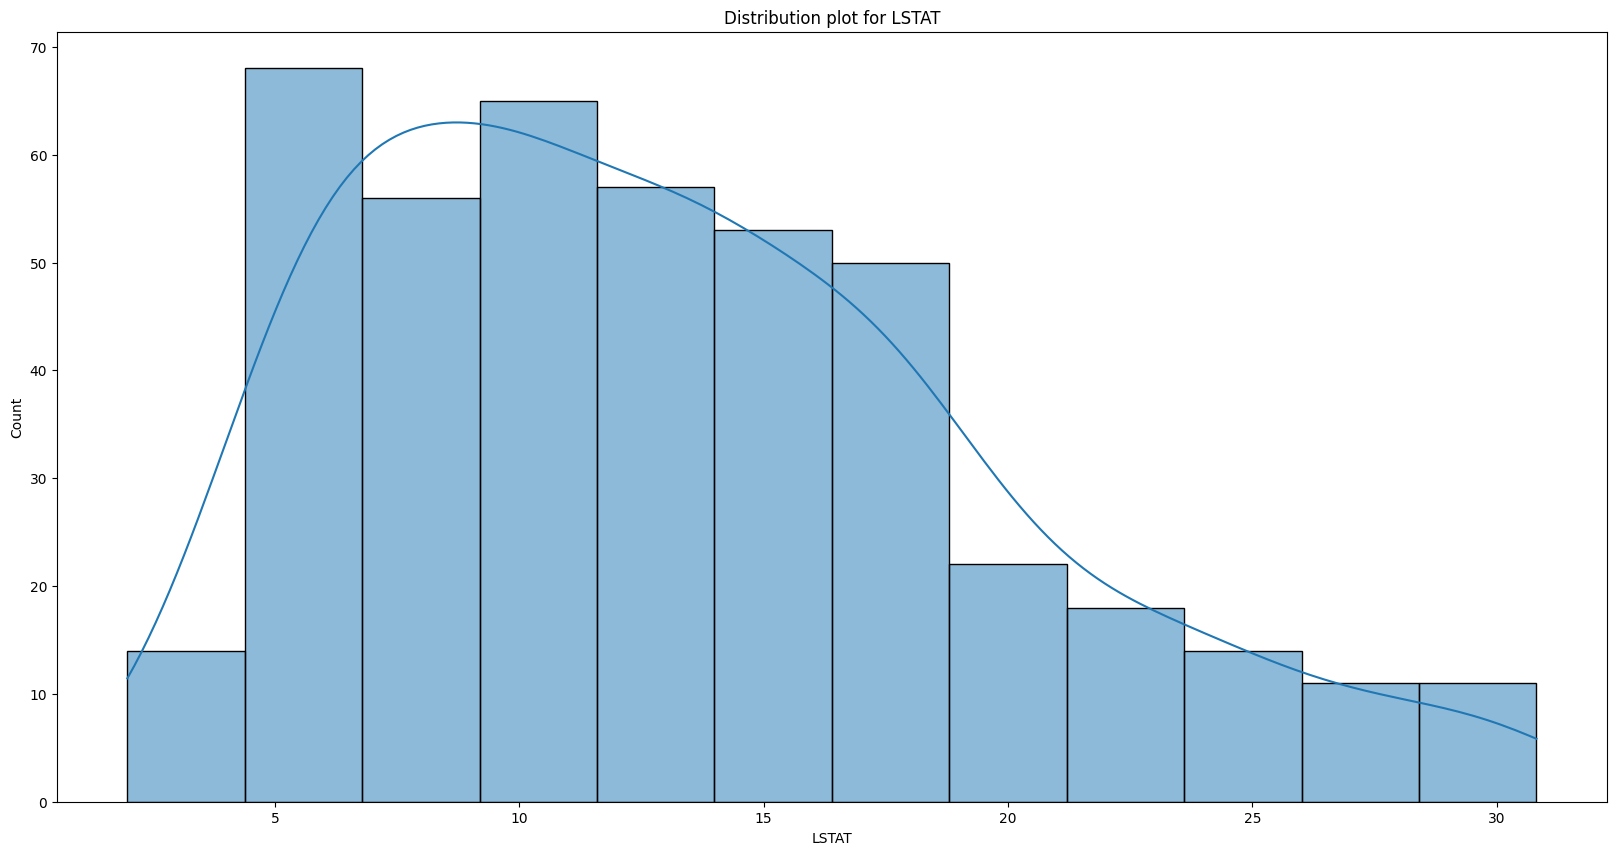

In [96]:
# compare normal distribution of INDUS and LSTAT
plt.figure(figsize=(20, 10))
sns.histplot(data_clean['INDUS'], kde=True)
plt.title('Distribution plot for INDUS')

plt.figure(figsize=(20, 10))
sns.histplot(data_clean['LSTAT'], kde=True)
plt.title('Distribution plot for LSTAT')
plt.show()

### Data insight on INDUS vs LSTAT
Because most of the data is at the lower bounds of the LSTAT and evenly distributed across the spectrum of industrial zones, we can conclude lower bound of LSTAT shows no significant correlation with INDUS.
However the concentration of Lower bound LSTAT at the Lower bound INDUS suggests that there is a significant population of lower status individuals in industrial zones.
Also, there is a significant number of properties at around higher 20 bounds of INDUS which have a distributed LSTAT. This again shows no meaningful correlation between INDUS and LSTAT.

<Axes: title={'center': 'Jointplot between INDUS and DIS'}, xlabel='INDUS', ylabel='DIS'>

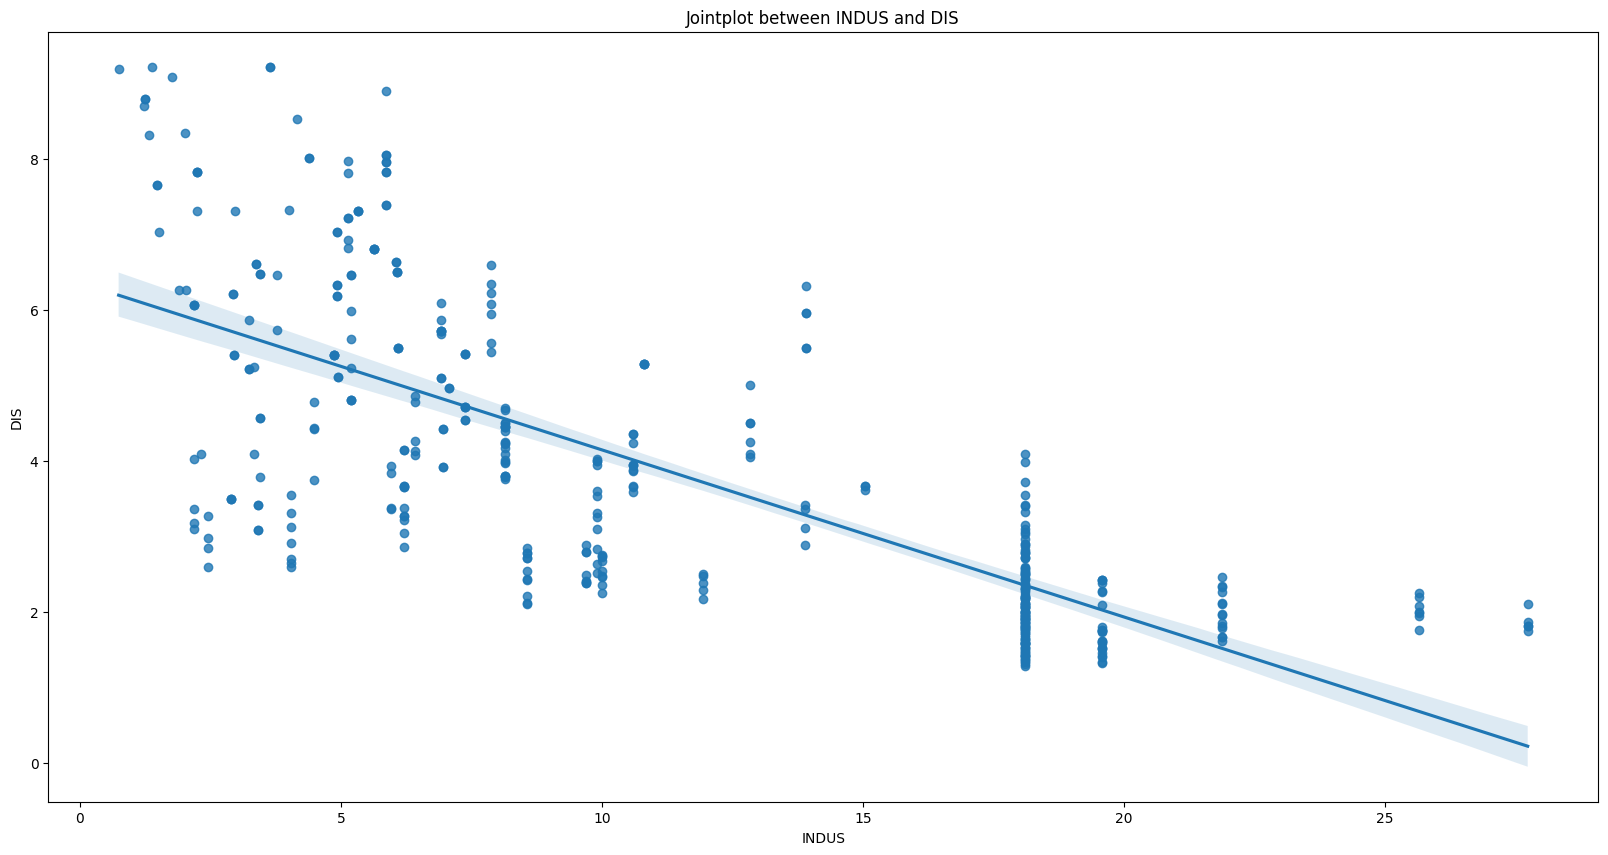

In [97]:
# examine the features INDUS and DIS in a jointplot
plt.figure(figsize=(20, 10))
plt.title('Jointplot between INDUS and DIS')
sns.regplot(x='INDUS', y='DIS', data=data_clean)

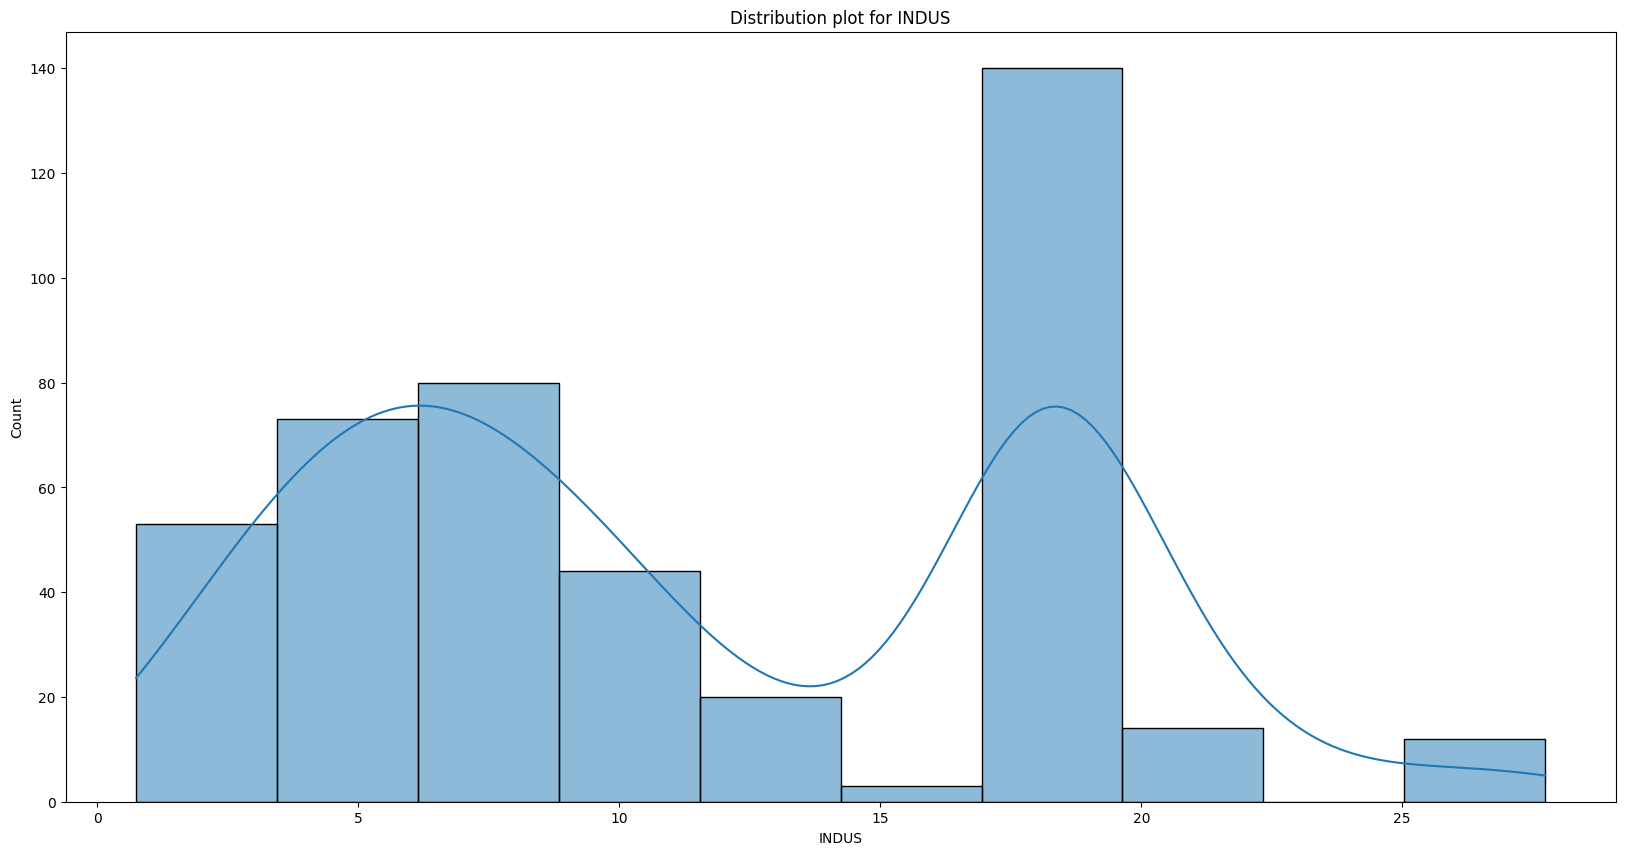

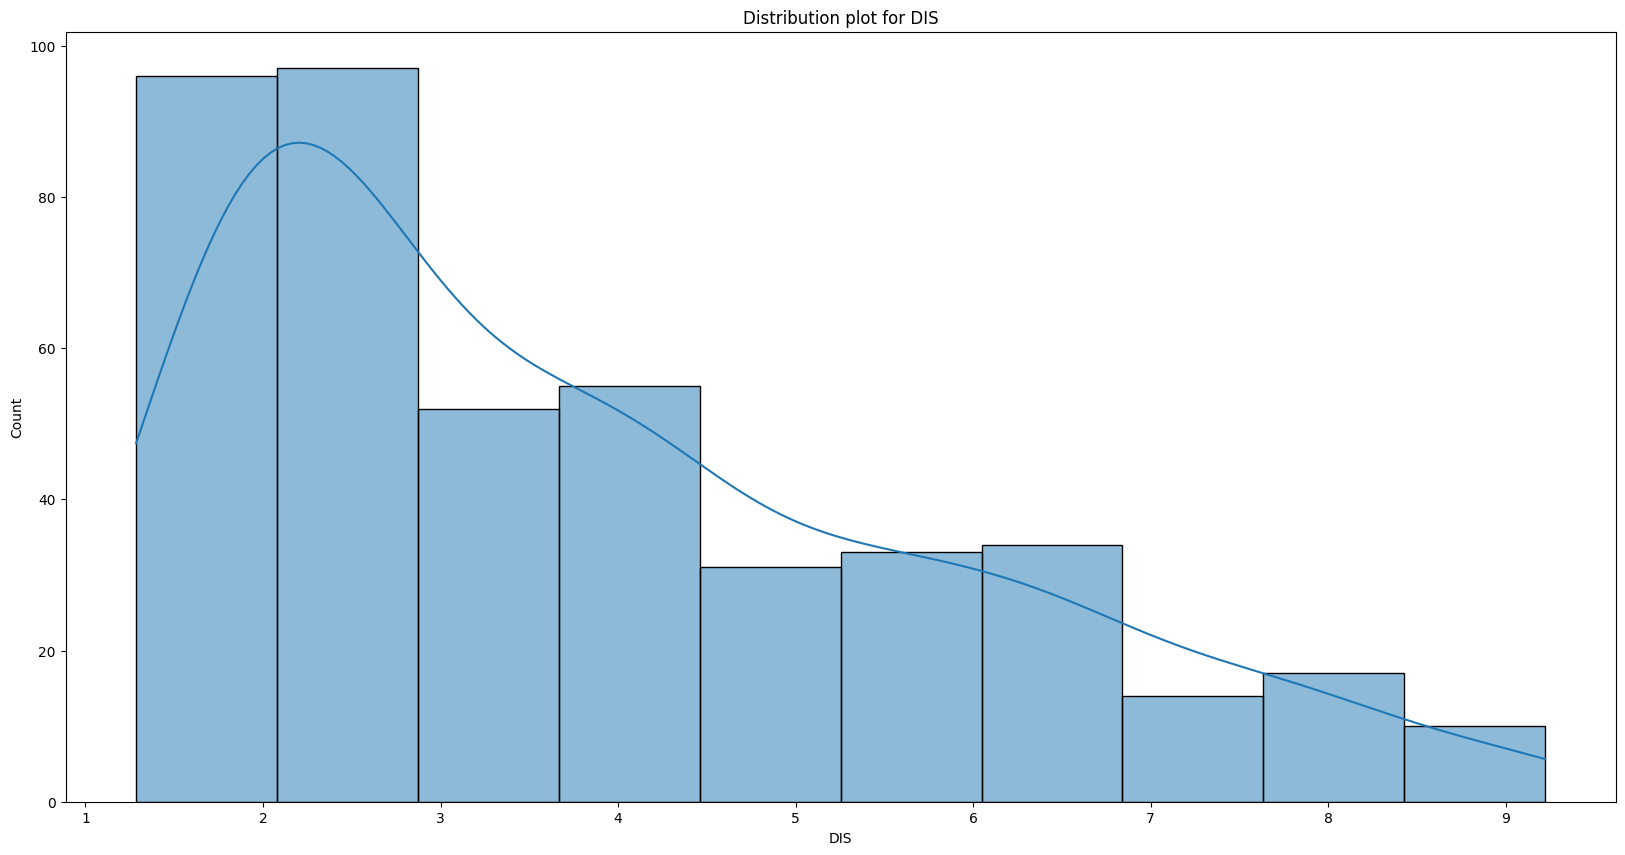

In [98]:
# examine the normal distribution of INDUS vs DIS
plt.figure(figsize=(20, 10))
sns.histplot(data_clean['INDUS'], kde=True)
plt.title('Distribution plot for INDUS')

plt.figure(figsize=(20, 10))
sns.histplot(data_clean['DIS'], kde=True)
plt.title('Distribution plot for DIS')
plt.show()


### Data insight on INDUS and DIS
The trend between the INDUS and DIS shows a clear negative correlation. This means that the properties closer to employment centers are also close to industrial zones, which makes sense as industrial zones are often located near employment centers to facilitate transportation and access to labor.

<Axes: xlabel='AGE', ylabel='NOX'>

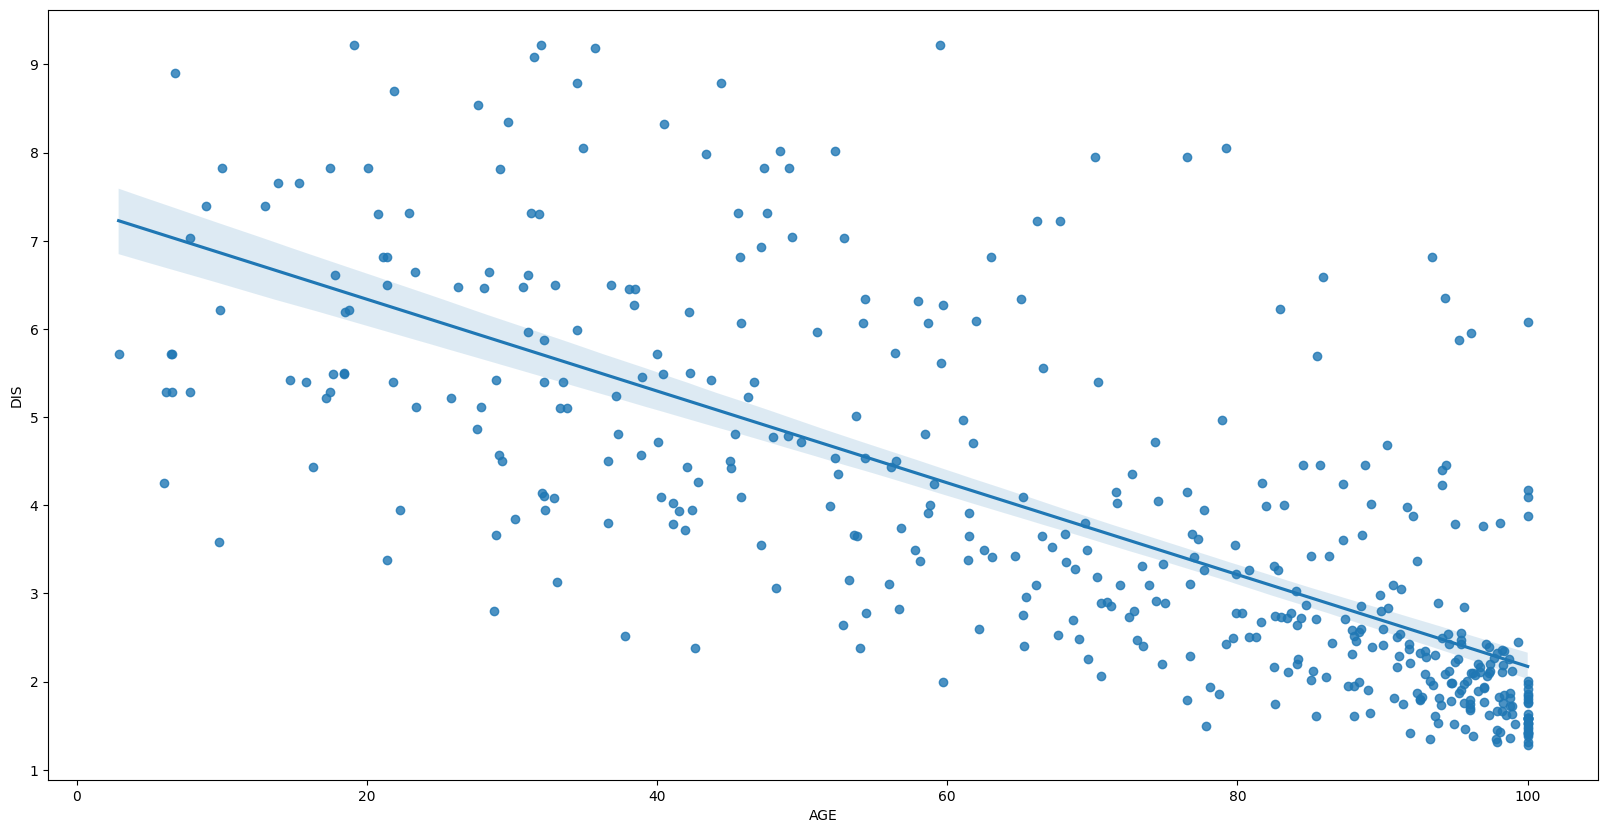

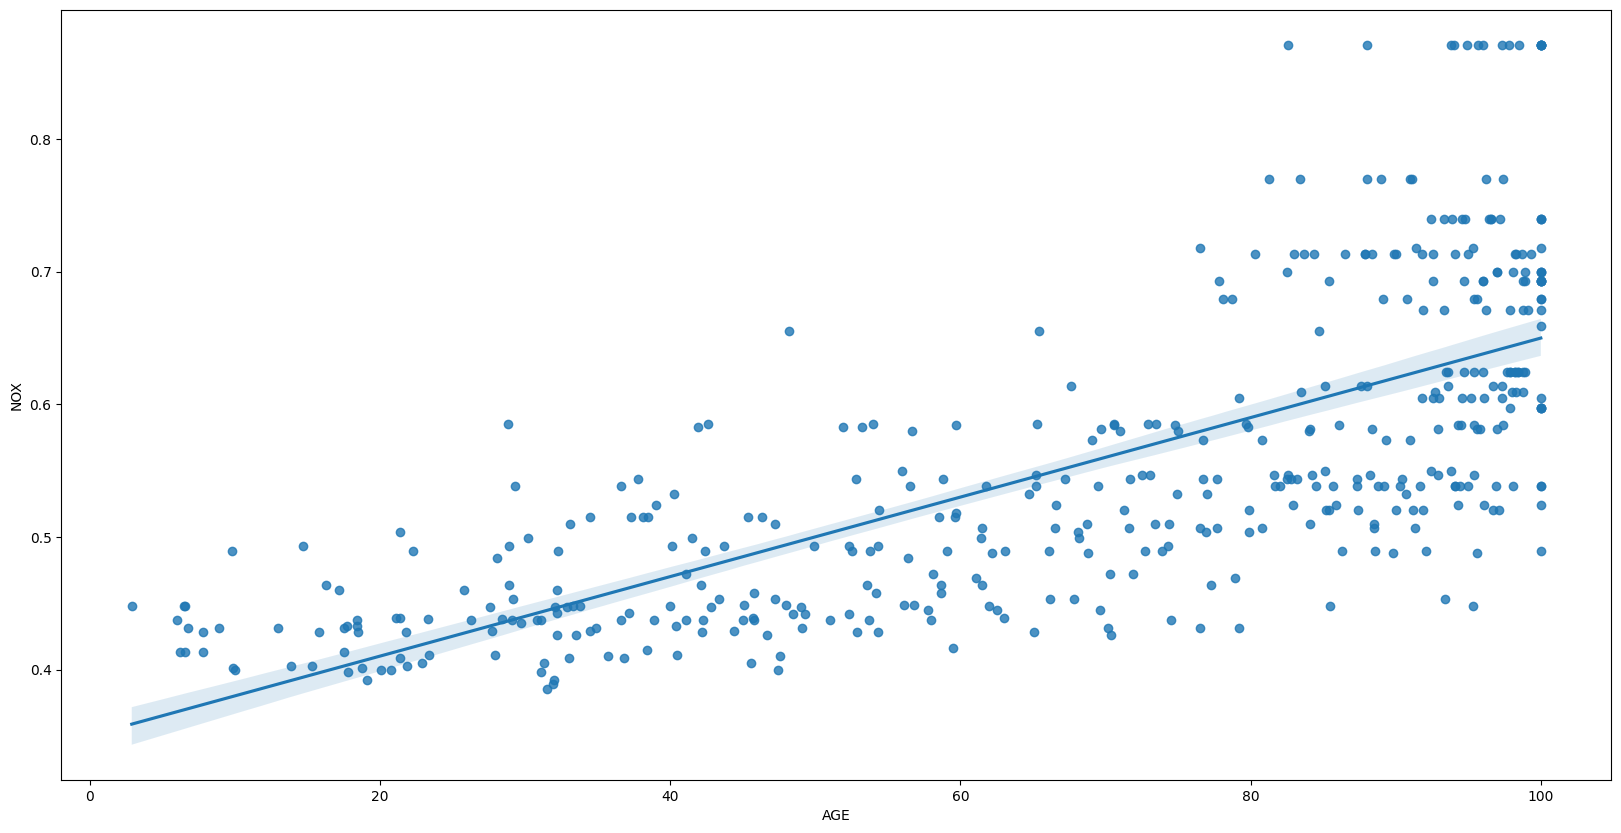

In [99]:
# AGE vs DIS in a regression plot
plt.figure(figsize=(20, 10))
sns.regplot(x='AGE', y='DIS', data=data_clean)

# AGE vs NOX in a regression plot
plt.figure(figsize=(20, 10))
sns.regplot(x='AGE', y='NOX', data=data_clean)

### Data Insight on DIS vs AGE and NOX
- The older the properties, the closer they are to the 5 employment centers. 
- The closer the protperties are to the employment centers, the higher the amount of NOX gas in the air is.

<Axes: xlabel='LSTAT', ylabel='AGE'>

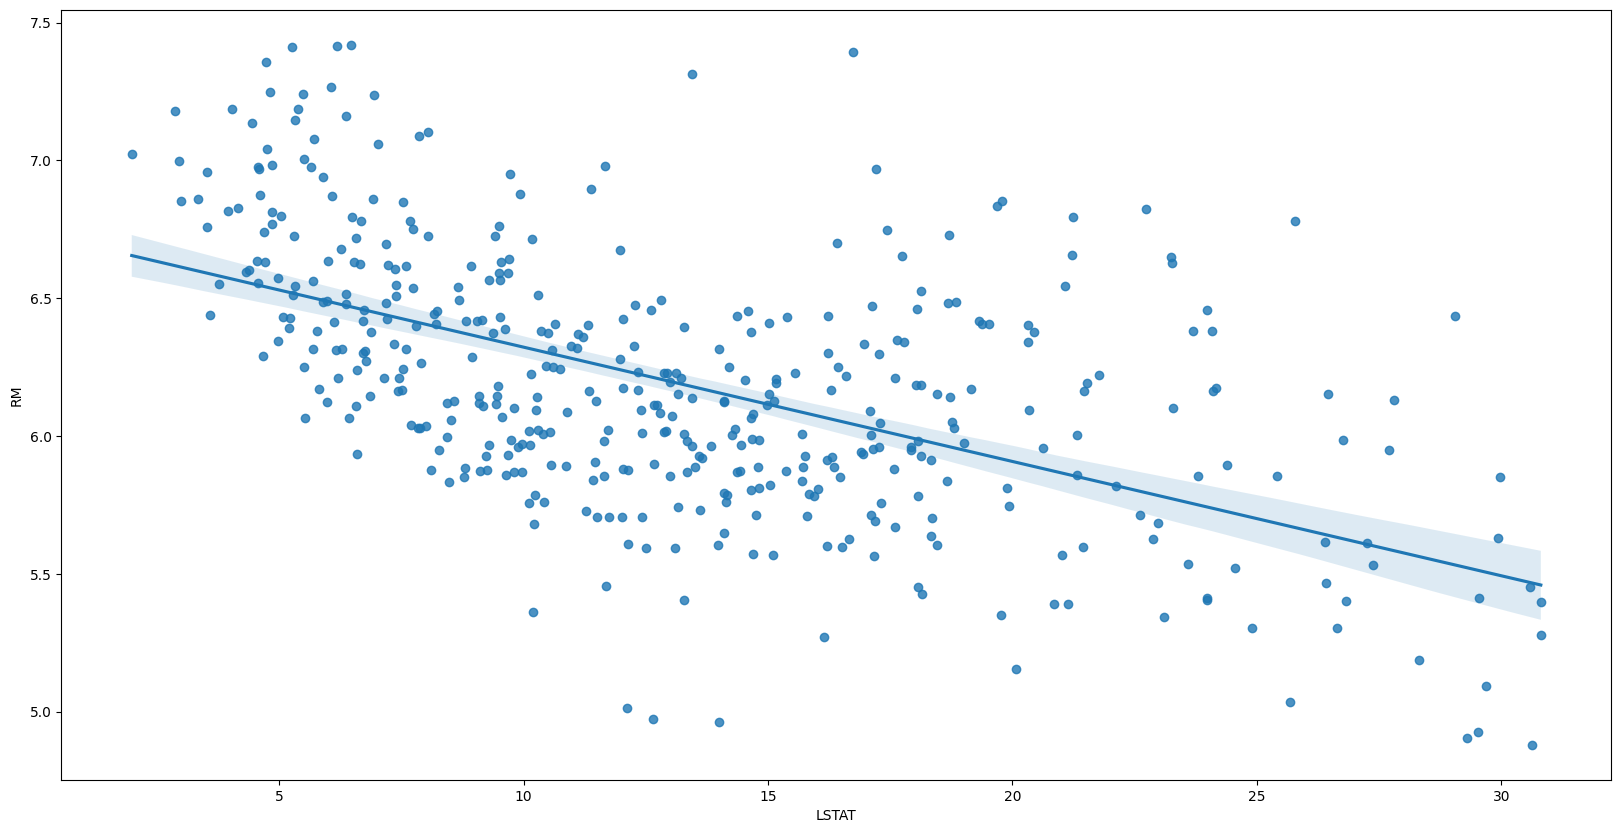

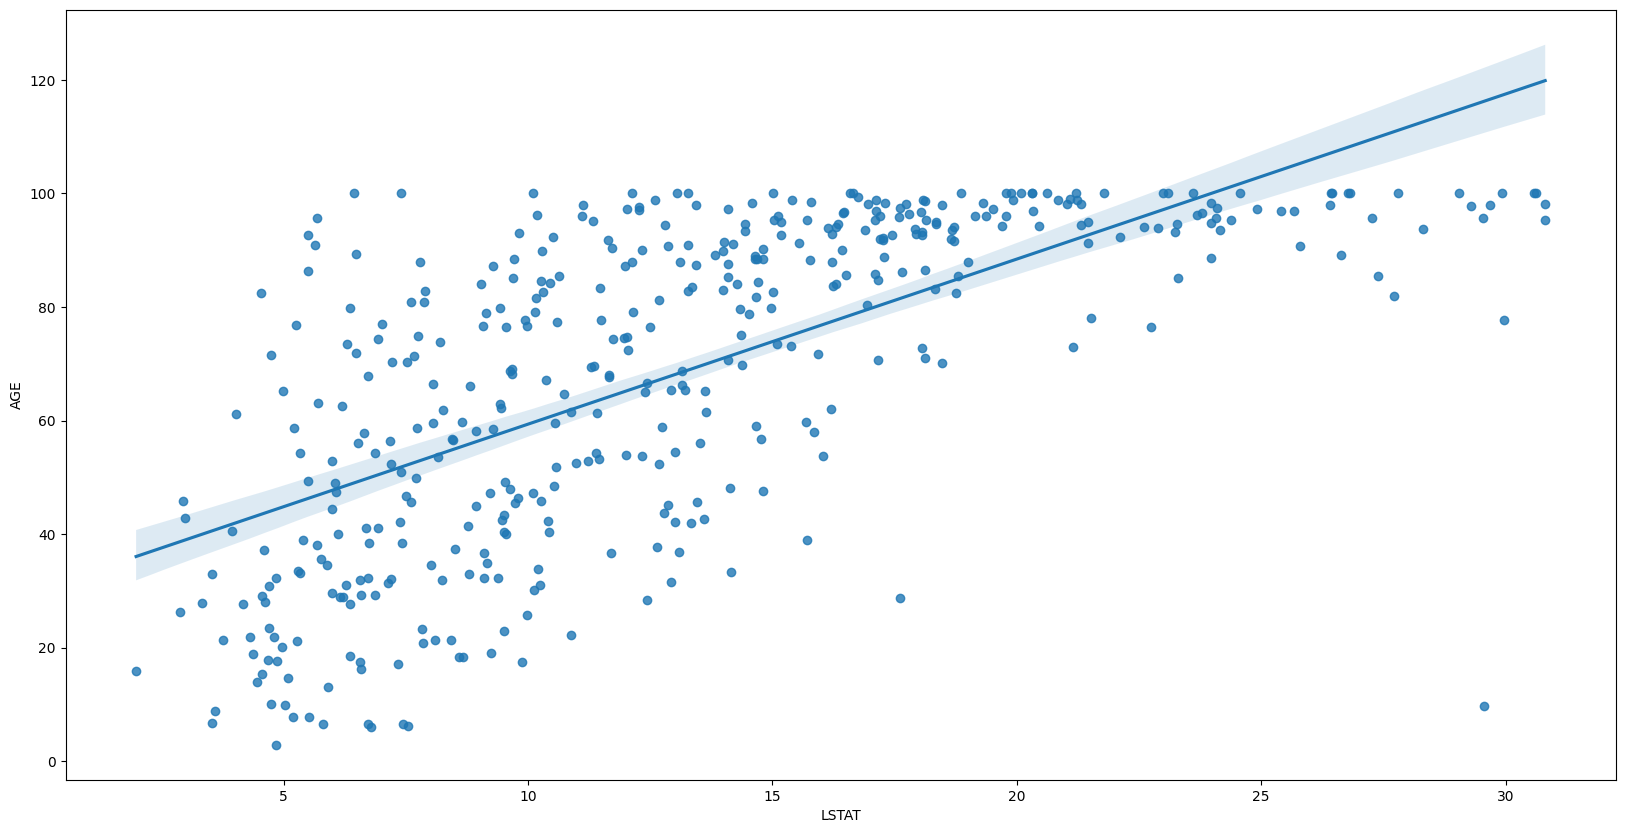

In [100]:
# examine the features LSTAT and RM in a rigression plot
plt.figure(figsize=(20, 10))
sns.regplot(x='LSTAT', y='RM', data=data_clean)

# examine the features LSTAT and AGE in a rigression plot
plt.figure(figsize=(20, 10))
sns.regplot(x='LSTAT', y='AGE', data=data_clean)

### Data Insight on LSTAT vs RM and AGE
- The lower the socio-economic status of the population, the lower the number of Rooms in a dwelling.
- The lower the socio-economic status of the population, the higher the AGE of the residential estates.

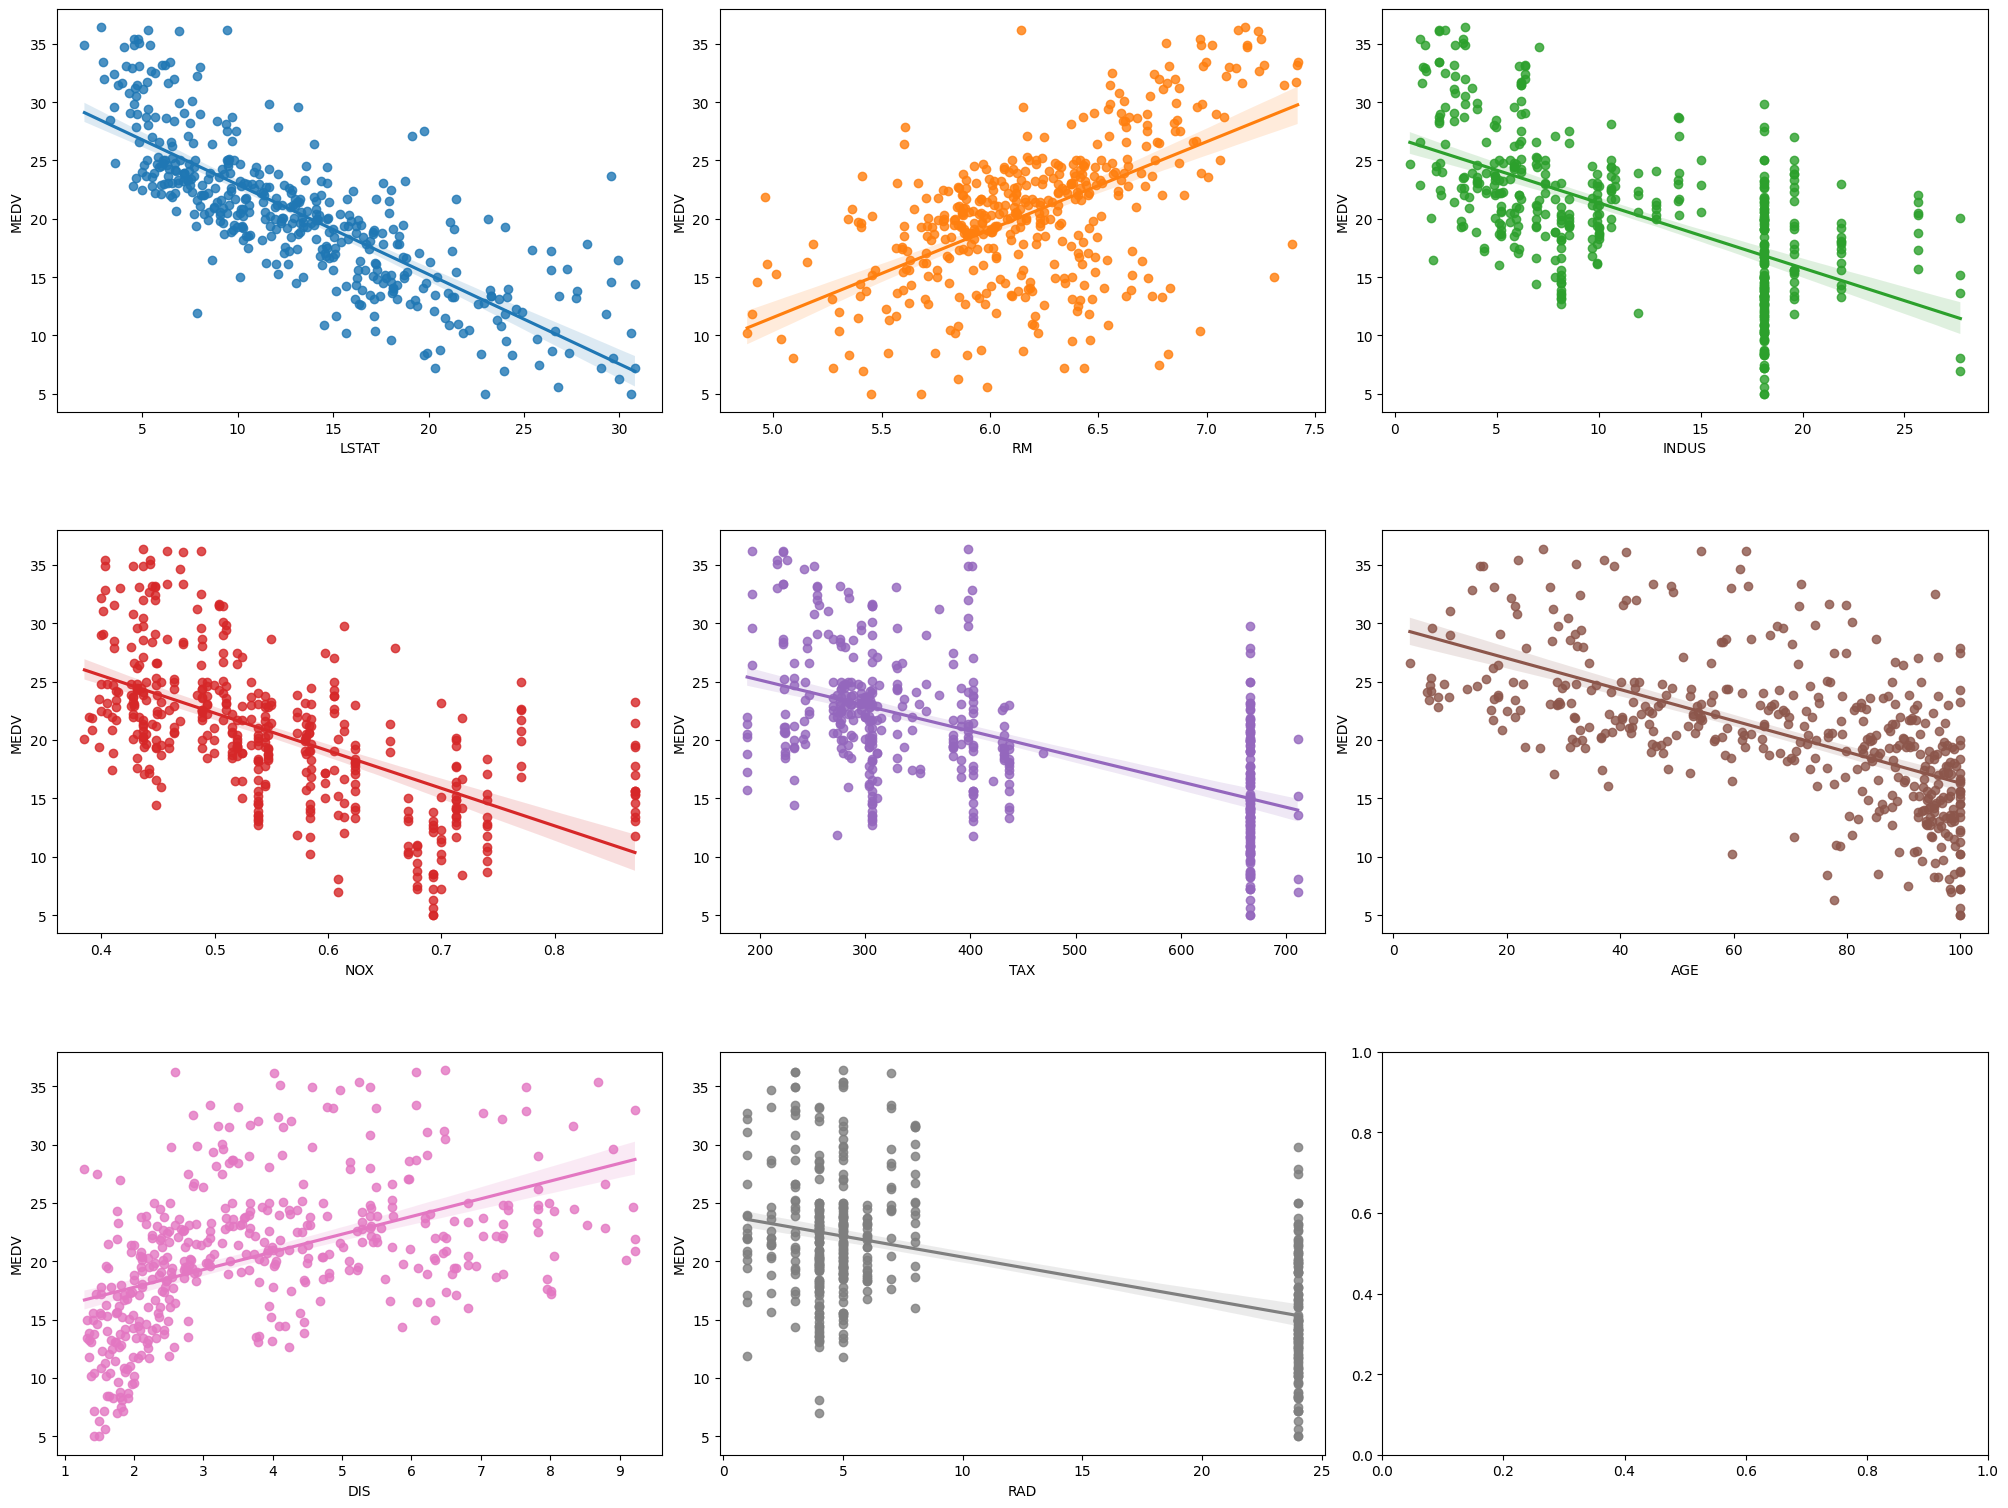

In [101]:
# draw a regression plot for the 8 features with the highest correlation with MEDV after removing outliers
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 15))
axs = axs.flatten()
for i, col in enumerate(data_clean[['LSTAT', 'RM', 'INDUS', 'NOX', 'TAX', 'AGE', 'DIS', 'RAD']]):
    sns.regplot(x=col, y=data_clean['MEDV'], data=data_clean, ax=axs[i], color=colors[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [102]:
## other combinations

# X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1), data['MEDV'], test_size=0.2, random_state=0)

# X_train, X_test, y_train, y_test = train_test_split(data[['LSTAT', 'RM', 'INDUS', 'NOX', 'TAX', 'AGE', 'DIS', 'RAD']],
#                                                     data['MEDV'], test_size=0.2, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(data_clean[['LSTAT', 'RM', 'INDUS', 'NOX', 'TAX', 'AGE', 'DIS', 'RAD']],
#                                                     data_clean['MEDV'], test_size=0.2, random_state=0)


In [103]:
# Model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_clean.drop('MEDV', axis=1),
                                                    data_clean['MEDV'], test_size=0.2,
                                                    random_state=0)


# standardize the data as pandas dataframe
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [104]:
# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)


# making a prediction
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Linear Regression Actual vs Predicted MEDV')

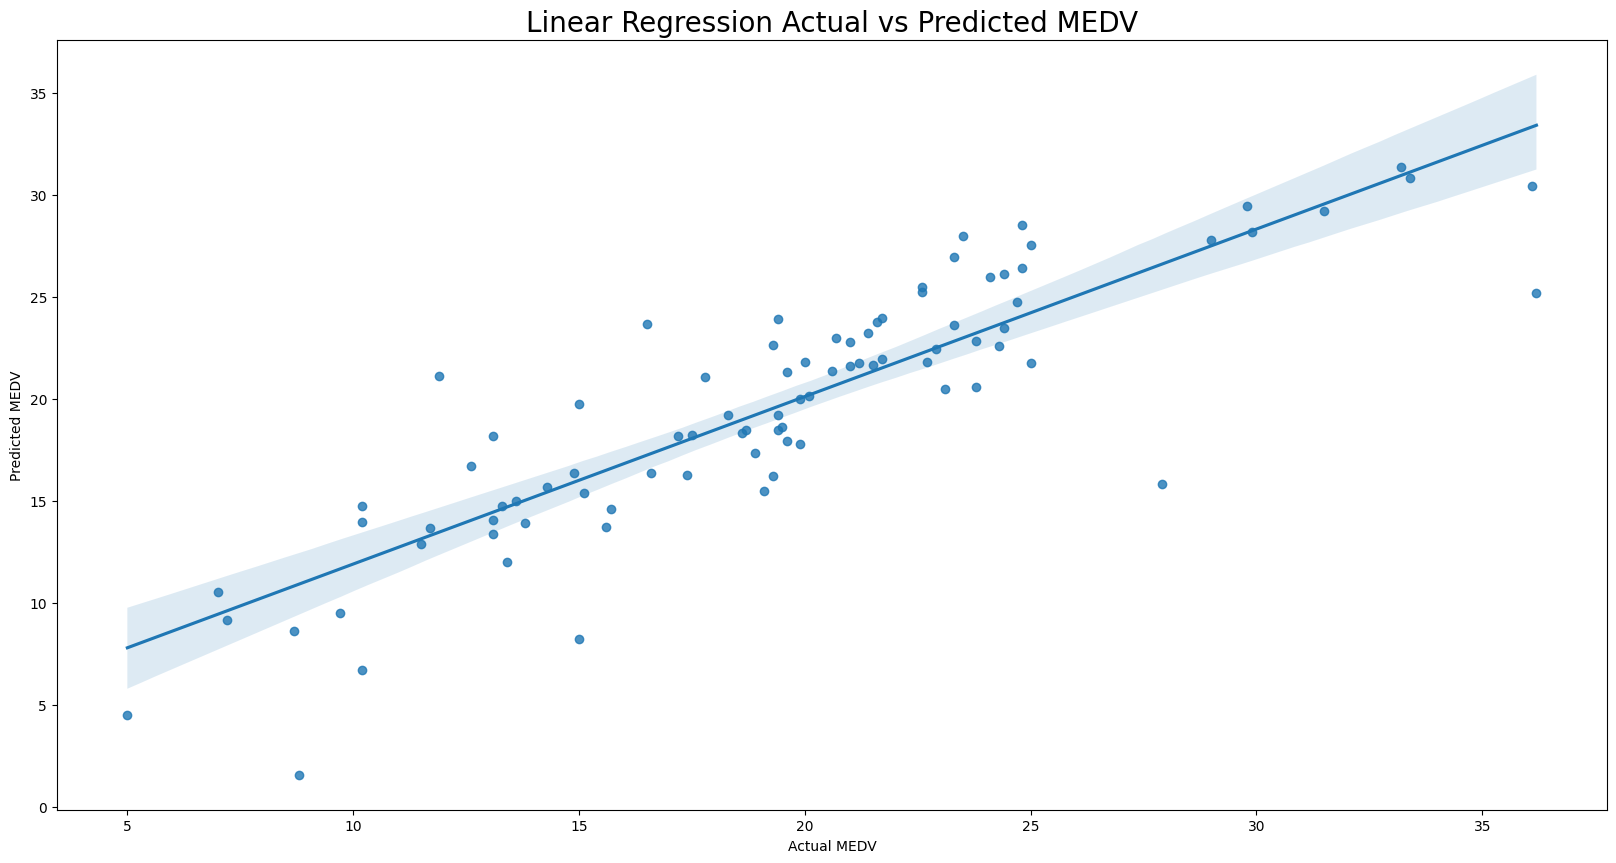

In [105]:
# ploting the prediction
plt.figure(figsize=(20, 10))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Linear Regression Actual vs Predicted MEDV', size=20)

Normality of residuals:
0.9321300203156919


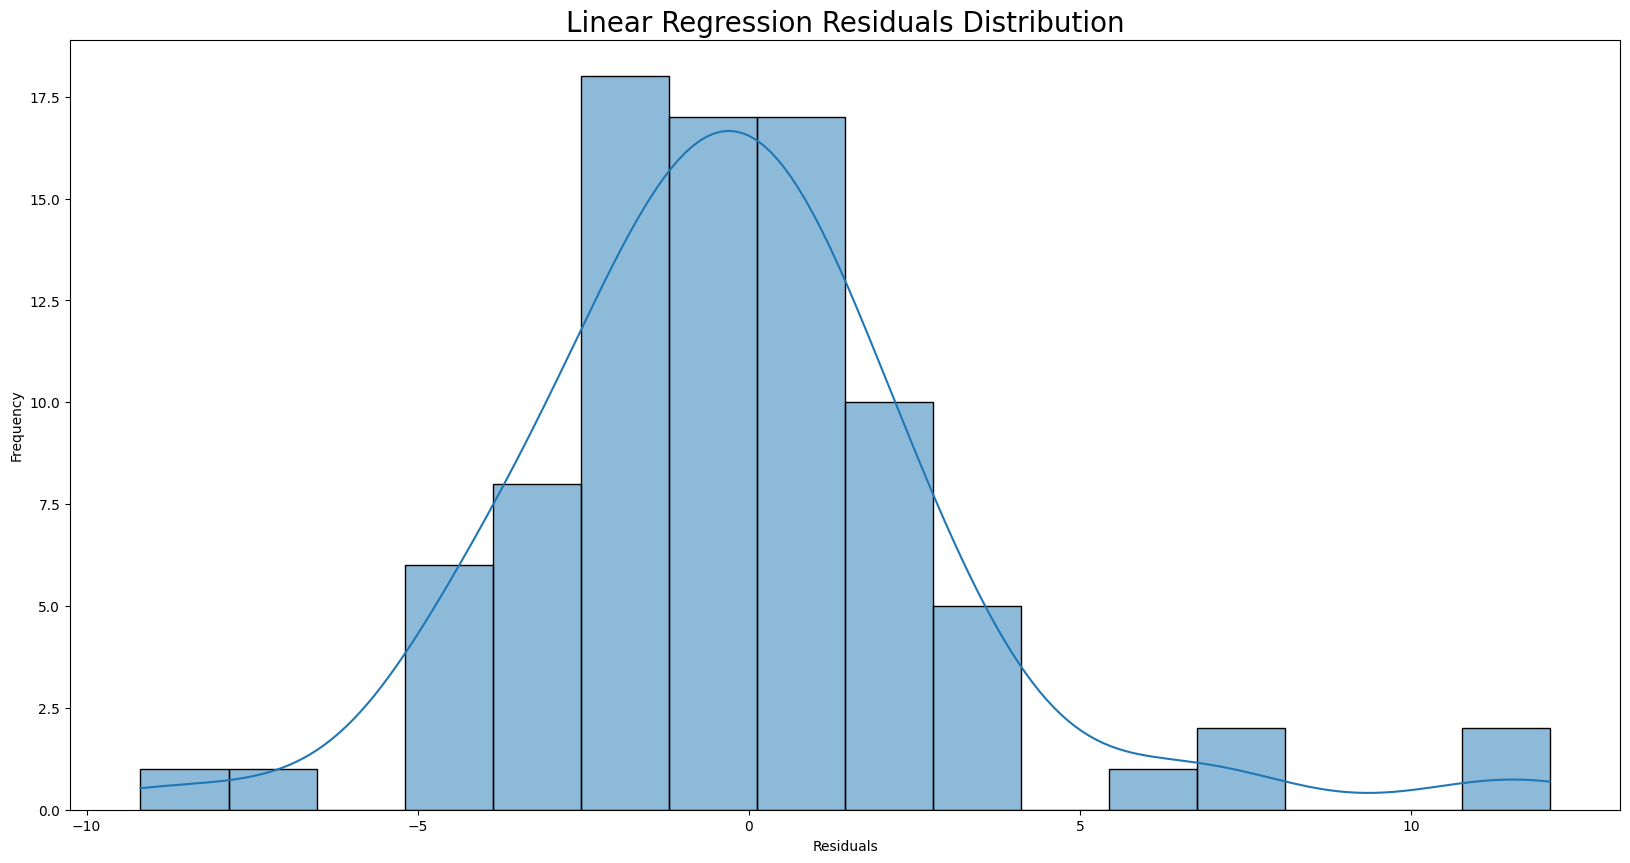

In [106]:
# checking residuals
residuals = y_test - y_pred
plt.figure(figsize=(20, 10))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Linear Regression Residuals Distribution', size=20)
# calculate normality of residuals
print("Normality of residuals:")
print(stats.shapiro(residuals).statistic)


In [108]:
# Calcualting the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculating the rooted mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Rooted Mean Squared Error: {rmse:.2f}')

# Calculating the R-squared value
r2 = model.score(X_test, y_test)
print(f'R-squared value: {r2:.2f}')

# Calculating the adjusted R-squared value
n = len(X_test)
p = len(X_test.columns)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared value: {adj_r2:.2f}')

# Calculating the cross-validated R-squared value
cv_r2 = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10).mean()
print(f'Cross-validated R-squared value: {cv_r2:.2f}')


Mean Squared Error: 10.50
Rooted Mean Squared Error: 3.24
R-squared value: 0.75
Adjusted R-squared value: 0.70
Cross-validated R-squared value: 0.74


In [109]:
# Random forest regression
from sklearn.ensemble import RandomForestRegressor

# Creating and training the model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# making a prediction
y_pred_rf = model_rf.predict(X_test)

Text(0.5, 1.0, 'Random Forest Actual vs Predicted MEDV')

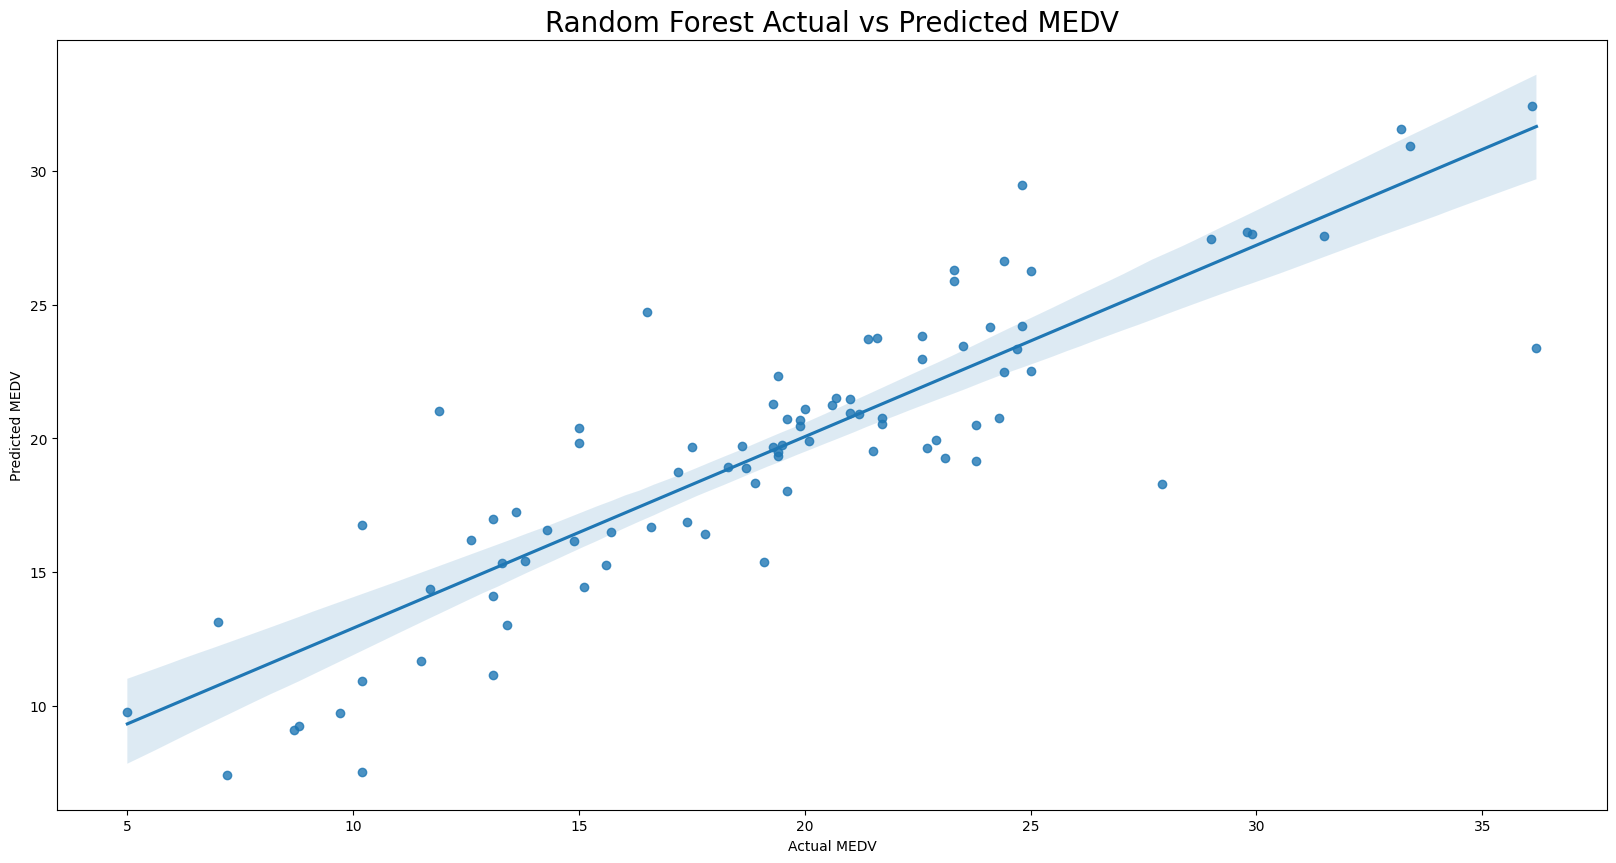

In [110]:
# ploting the prediction
plt.figure(figsize=(20, 10))
sns.regplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Random Forest Actual vs Predicted MEDV', size=20)


Text(0.5, 1.0, 'Random Forest Residuals Distribution')

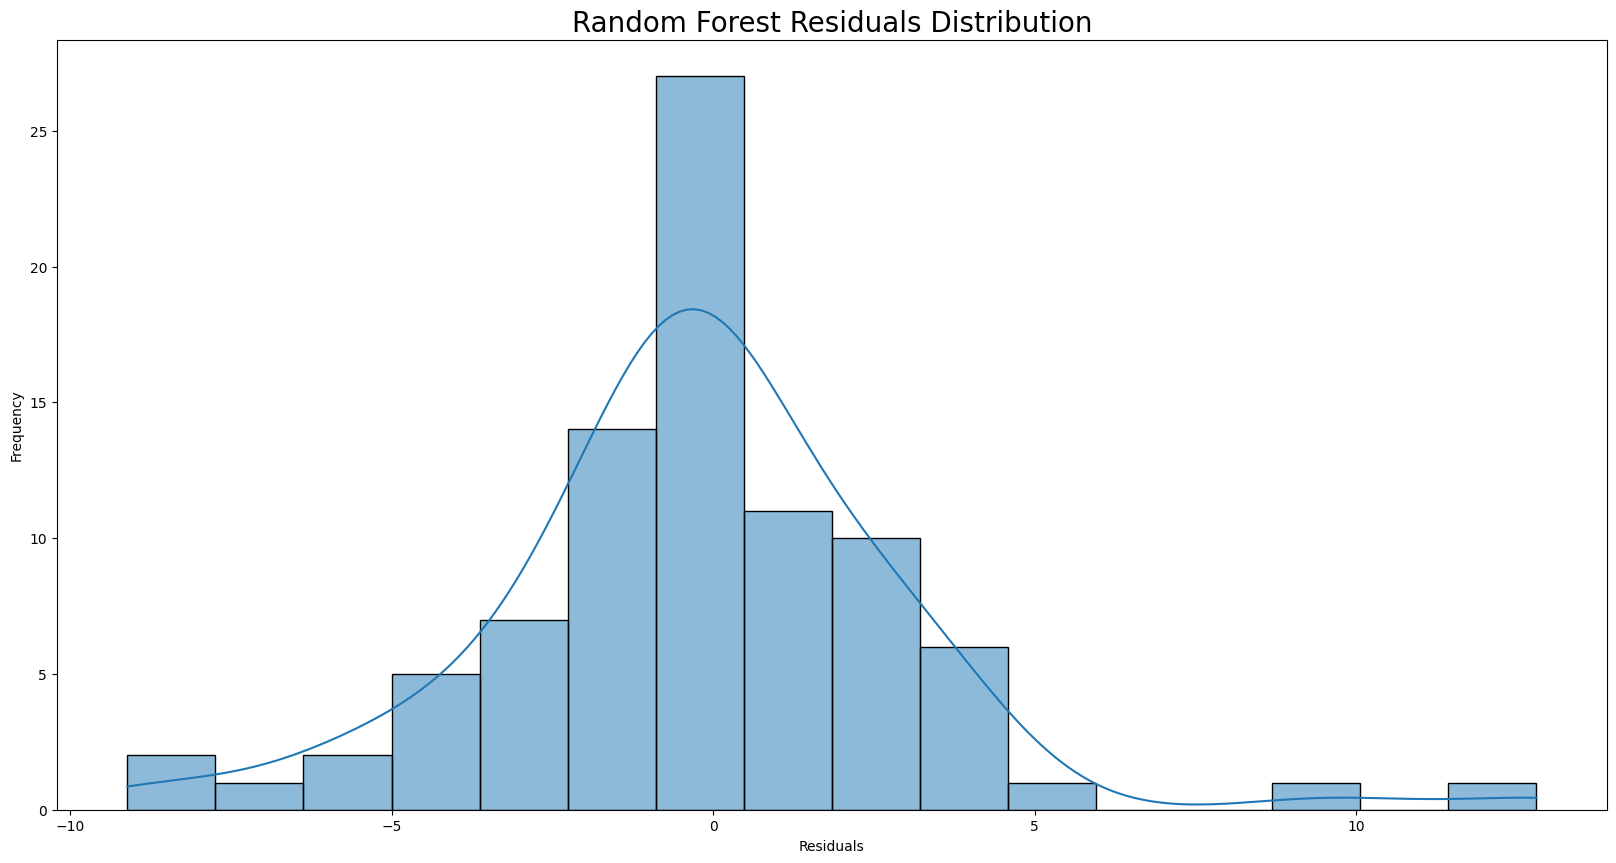

In [111]:
# plotting the rediduals
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(20, 10))
sns.histplot(residuals_rf, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Random Forest Residuals Distribution', size=20)


In [112]:
# calculate normality of residuals
print("Normality of residuals:", f"{stats.shapiro(residuals_rf).statistic:.2f}")

Normality of residuals: 0.93


In [113]:
# Calcualting the mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse_rf:.2f}')

# Calculating the rooted mean squared error
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Rooted Mean Squared Error: {rmse_rf:.2f}')

# Calculating the R-squared value
r2_rf = model_rf.score(X_test, y_test)
print(f'R-squared value: {r2_rf:.2f}')

# Adjusted R-squared value
n = len(X_test)
p = len(X_test.columns)
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared value: {adj_r2_rf:.2f}')

# Calculating the cross-validated R-squared value
cv_r2_rf = cross_val_score(estimator=model_rf, X=X_train, y=y_train, cv=10).mean()
print(f'Cross-validated R-squared value: {cv_r2_rf:.2f}')

Mean Squared Error: 10.06
Rooted Mean Squared Error: 3.17
R-squared value: 0.76
Adjusted R-squared value: 0.71
Cross-validated R-squared value: 0.81


In [114]:
# xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the XGBoost model
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=0)
reg.fit(X_train, y_train)

# Make predictions
y_pred_xgb = reg.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
adj_r2_xgb = 1 - (1 - r2_xgb) * (n - 1) / (n - p - 1)
cv_r2_xgb = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=10).mean()

print(f'Mean Squared Error: {mse_xgb:.2f}')
print(f'Rooted Mean Squared Error: {rmse_xgb:.2f}')
print(f'R-squared value: {r2_xgb:.2f}')
print(f'Adjusted R-squared value: {adj_r2_xgb:.2f}')
print(f'Cross-validated R-squared value: {cv_r2_xgb:.2f}')

Mean Squared Error: 10.08
Rooted Mean Squared Error: 3.17
R-squared value: 0.76
Adjusted R-squared value: 0.71
Cross-validated R-squared value: 0.80


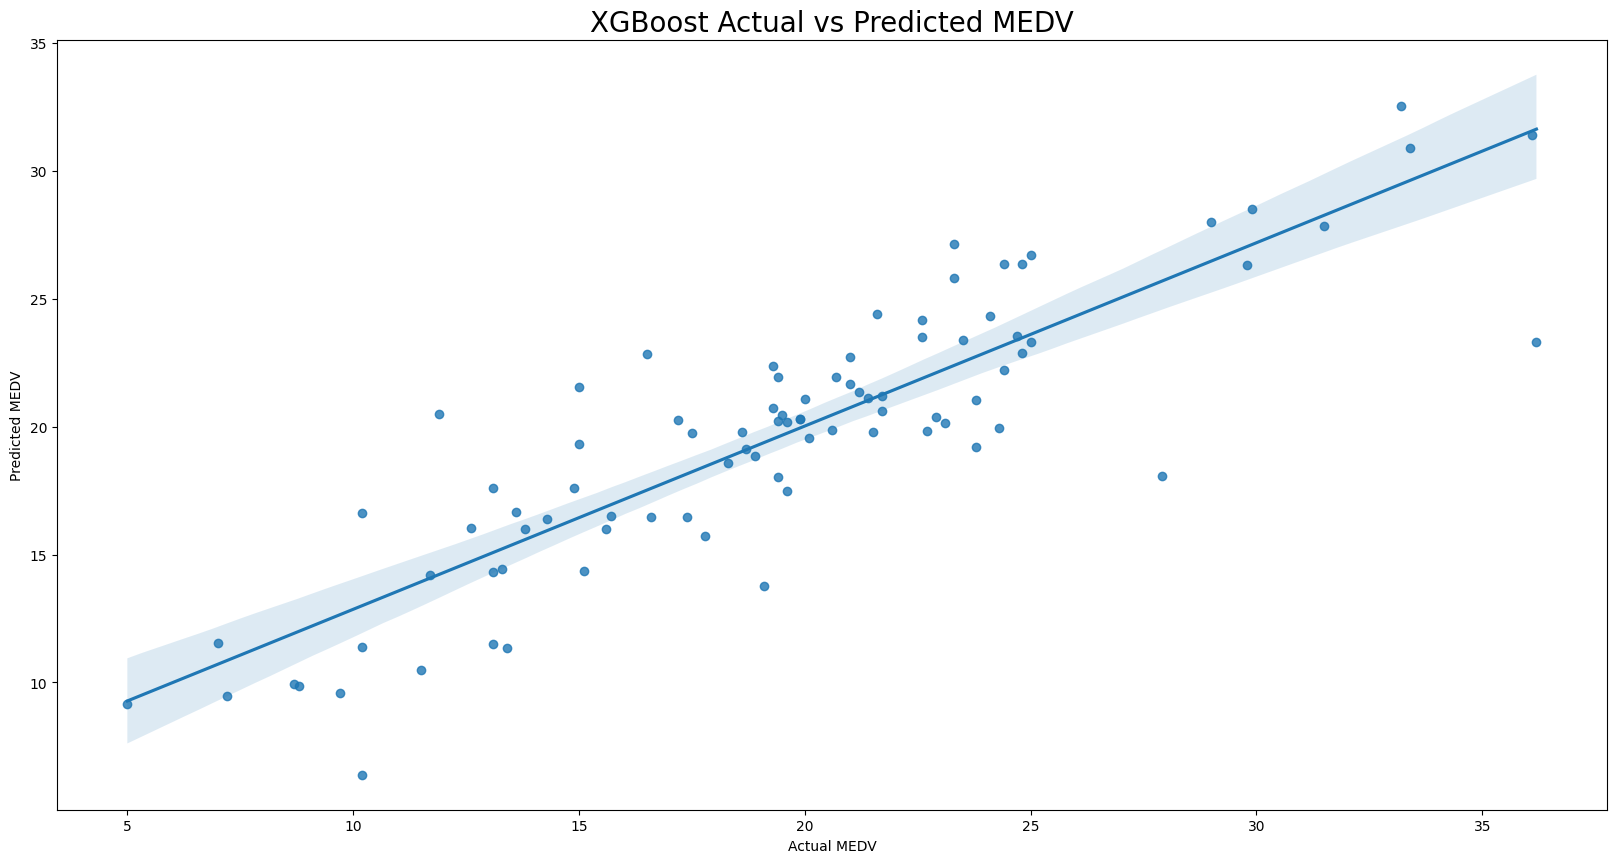

In [115]:
# Draw the xgboost prediction
plt.figure(figsize=(20, 10))
sns.regplot(x=y_test, y=y_pred_xgb)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('XGBoost Actual vs Predicted MEDV', size=20)
plt.show()

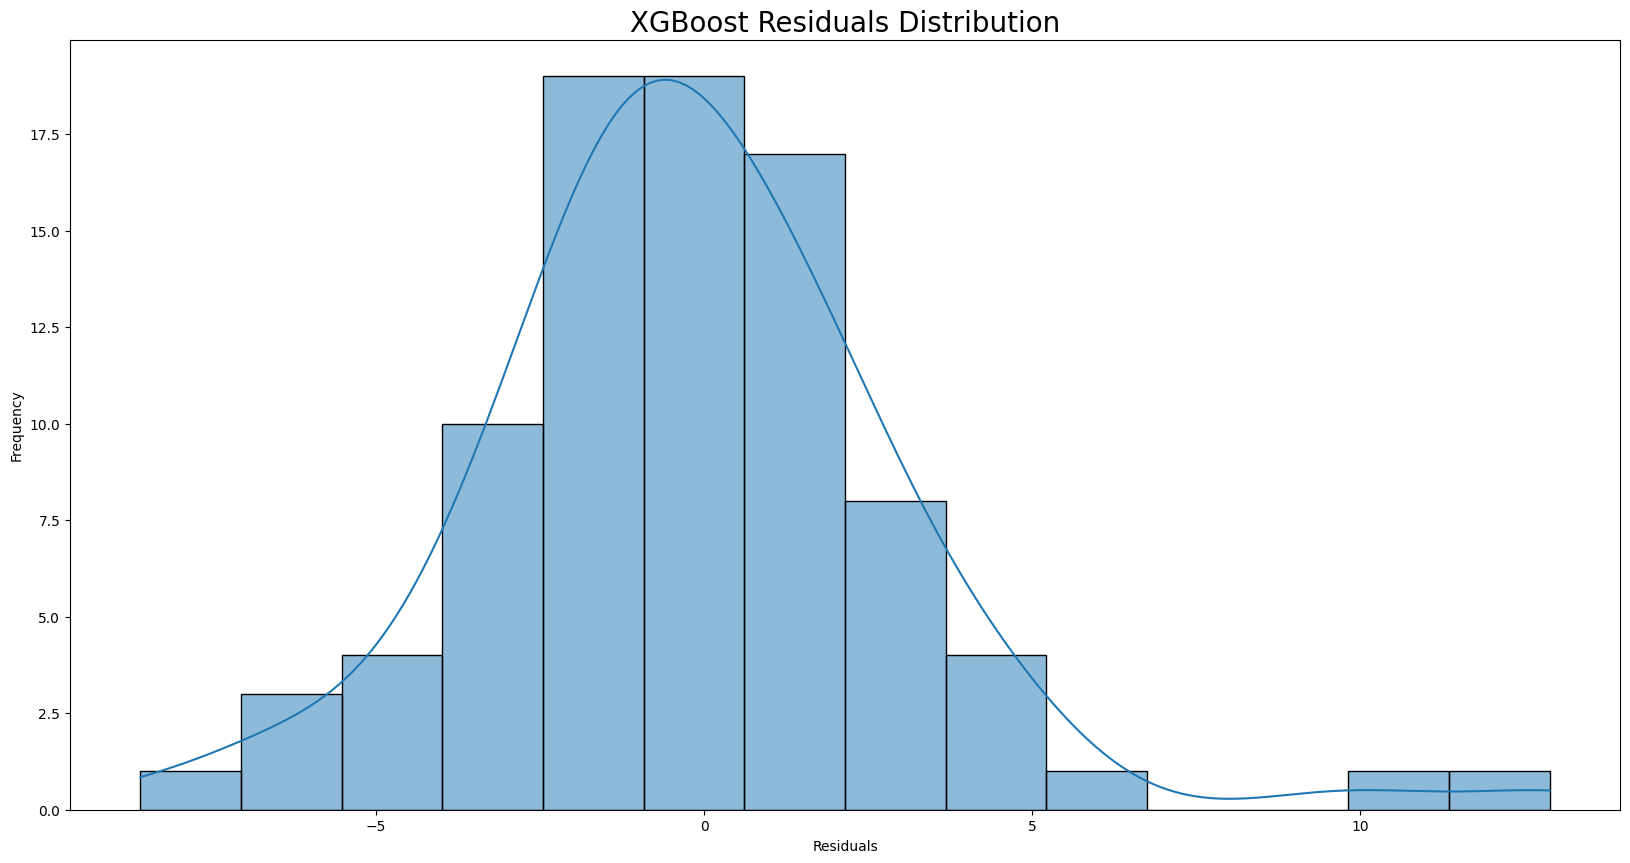

In [116]:
# draw the residual plot
residuals_xgb = y_test - y_pred_xgb
plt.figure(figsize=(20, 10))
sns.histplot(residuals_xgb, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('XGBoost Residuals Distribution', size=20)
plt.show()

In [117]:
# calculate normality of residuals
print("Normality of residuals:", f"{stats.shapiro(residuals_xgb).statistic:.2f}")

Normality of residuals: 0.95


In [118]:
## evaluating and comparing the models
# Comparing the models

models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [rmse, rmse_rf, rmse_xgb],
    'R-squared': [r2* 100, r2_rf * 100, r2_xgb * 100],
    'Adjusted R-squared': [adj_r2 * 100, adj_r2_rf * 100, adj_r2_xgb * 100],
    'CV R-squared': [cv_r2 * 100, cv_r2_rf * 100, cv_r2_xgb * 100],
    })

models.sort_values(by='R-squared', ascending=False)

Model      RMSE  R-squared  Adjusted R-squared  CV R-squared
1      Random Forest  3.171700  75.638992           71.359355     81.209530
2            XGBoost  3.174783  75.591607           71.303646     79.803628
0  Linear Regression  3.240382  74.572513           70.105522     73.991911